## Load CombSAFE and input dataset

In [119]:
from CombSAFE import *

## Create dataset

In [120]:
#dataset = create_dataset("./examples/GEO/samples_list.txt", "hg38", 20, from_GEO=True)

In [121]:
#dataset = create_dataset("./processed_data/fastq_test/fastq_list.txt/", "hg38", 4, from_GEO=False)

## Load dataset

In [122]:
dataset = load_dataset(path = "./dataset/", assembly="hg38")

## Generation of semantic annotations

In [5]:
ontology_1 = "https://raw.githubusercontent.com/obophenotype/cell-ontology/master/cl-basic.obo"

In [6]:
ontology_2 = "https://raw.githubusercontent.com/DiseaseOntology/HumanDiseaseOntology/main/src/ontology/doid.obo"

In [7]:
#semantic_df = generate_semantic_annotations(dataset, ontology_1, ontology_2, disease = True, encode_convert=False) #ok

In [ ]:
semantic_df = pd.read_csv("./CombSAFE_output/annotations/annotation_matrix.txt", "\t")

## Data analysis 

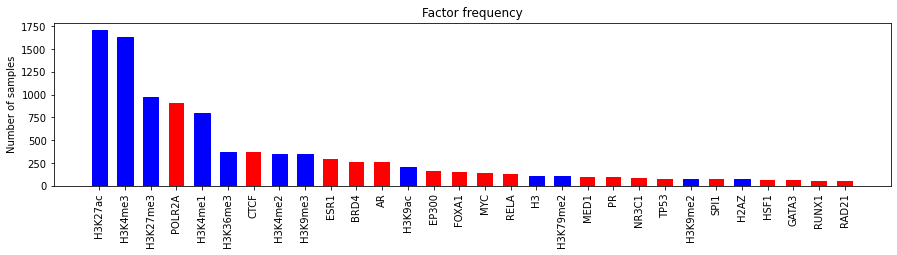

In [9]:
plot_factor_freq(semantic_df, 30)

In [10]:
generate_fixed_factor_pool(semantic_df, ["CTCF", "POLR2A", "MYC"], 5)

+----+--------------------------------------+--------------------------+
|    | factor_list                          |   n_semantic_annotations |
|----+--------------------------------------+--------------------------|
|  1 | CTCF, POLR2A, MYC, H3K4me3, H3K27me3 |                       16 |
|  2 | CTCF, POLR2A, MYC, H3K27ac, H3K27me3 |                       15 |
|  3 | CTCF, POLR2A, MYC, H3K27ac, H3K4me3  |                       15 |
|  4 | CTCF, POLR2A, MYC, H3K27me3, H3K4me1 |                       12 |
|  5 | CTCF, POLR2A, MYC, H3K4me3, H3K4me1  |                       12 |
|  6 | CTCF, POLR2A, MYC, H3K27ac, H3K4me1  |                       11 |
|  7 | CTCF, POLR2A, MYC, H3K27ac, EP300    |                       11 |
|  8 | CTCF, POLR2A, MYC, H3K4me3, H3K36me3 |                       11 |
|  9 | CTCF, POLR2A, MYC, EP300, H3K4me3    |                       11 |
| 10 | CTCF, POLR2A, MYC, EP300, H3K27me3   |                       11 |
+----+--------------------------------------+------

In [11]:
get_semantic_annotation_list(semantic_df, ["H3K4me3", "H3K27me3", "POLR2A", "CTCF", "MYC"])

1 - cultured cell_lining cell_fibroblast_000_na
2 - ectodermal cell_keratinocyte_000_cancer_cancer
3 - embryonic stem cell_lining cell_stem cell_000_na
4 - endothelial cell_vein endothelial cell_lining cell_000_na
5 - epithelial cell_lining cell_mammary gland epithelial cell_000_na
6 - epithelial cell_mammary gland epithelial cell_ectodermal cell_000_na
7 - fibroblast_lining cell_skin fibroblast_000_healthy
8 - lining cell_mesodermal cell_myotube_000_cancer_chronic myeloid leukemia
9 - lining cell_secretory cell_000_breast cancer
10 - lining cell_secretory cell_000_cancer
11 - lining cell_secretory cell_000_chronic myeloid leukemia
12 - lining cell_secretory cell_000_colon cancer
13 - lining cell_secretory cell_000_liver cancer
14 - lining cell_secretory cell_000_na
15 - lymphocyte_b cell_t cell_000_na
16 - progenitor cell_erythroid progenitor cell_000_na


## Select features and combine samples

In [12]:
#extract_data(dataset, ["H3K4me3", "H3K27me3", "POLR2A", "CTCF", "MYC"])

In [13]:
load_extracted_data(["H3K4me3", "H3K27me3", "POLR2A", "CTCF", "MYC"])

In [14]:
generate_bed_dir()

## [Optional] Add custom tracks

In [16]:
add_custom_tracks("CpG_Islands", "./test/cpgIslandExt_test.txt") #ok

## Identify functional states

In [17]:
functional_states_df = identify_functional_states(chromHMM_path ="./ChromHMM/", number_of_states = 15, n_core = 30)

In [18]:
#functional_states_df = load_custom_segments(input_segment_dir ="./test/test_segmentated/", num_states=15)

In [10]:
palette=['#c9f9ff','#e6beff', '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#bcf60c', '#f032e6', '#fffac8', '#fabebe', '#9a6324', '#46f0f0', '#008080', '#ffd8b1', '#000075', '#fffac8', '#808000', '#800000']

In [18]:
functional_states_df = load_functional_states_dataframe()

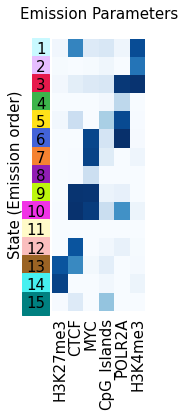

In [20]:
show_emission_graph(custom_palette=palette)

## Show Distance Metric

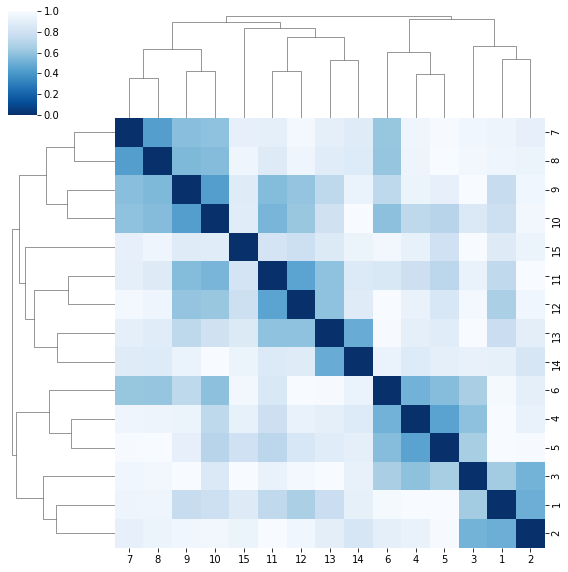

In [21]:
show_distance_matrix()

## Single-gene analysis 

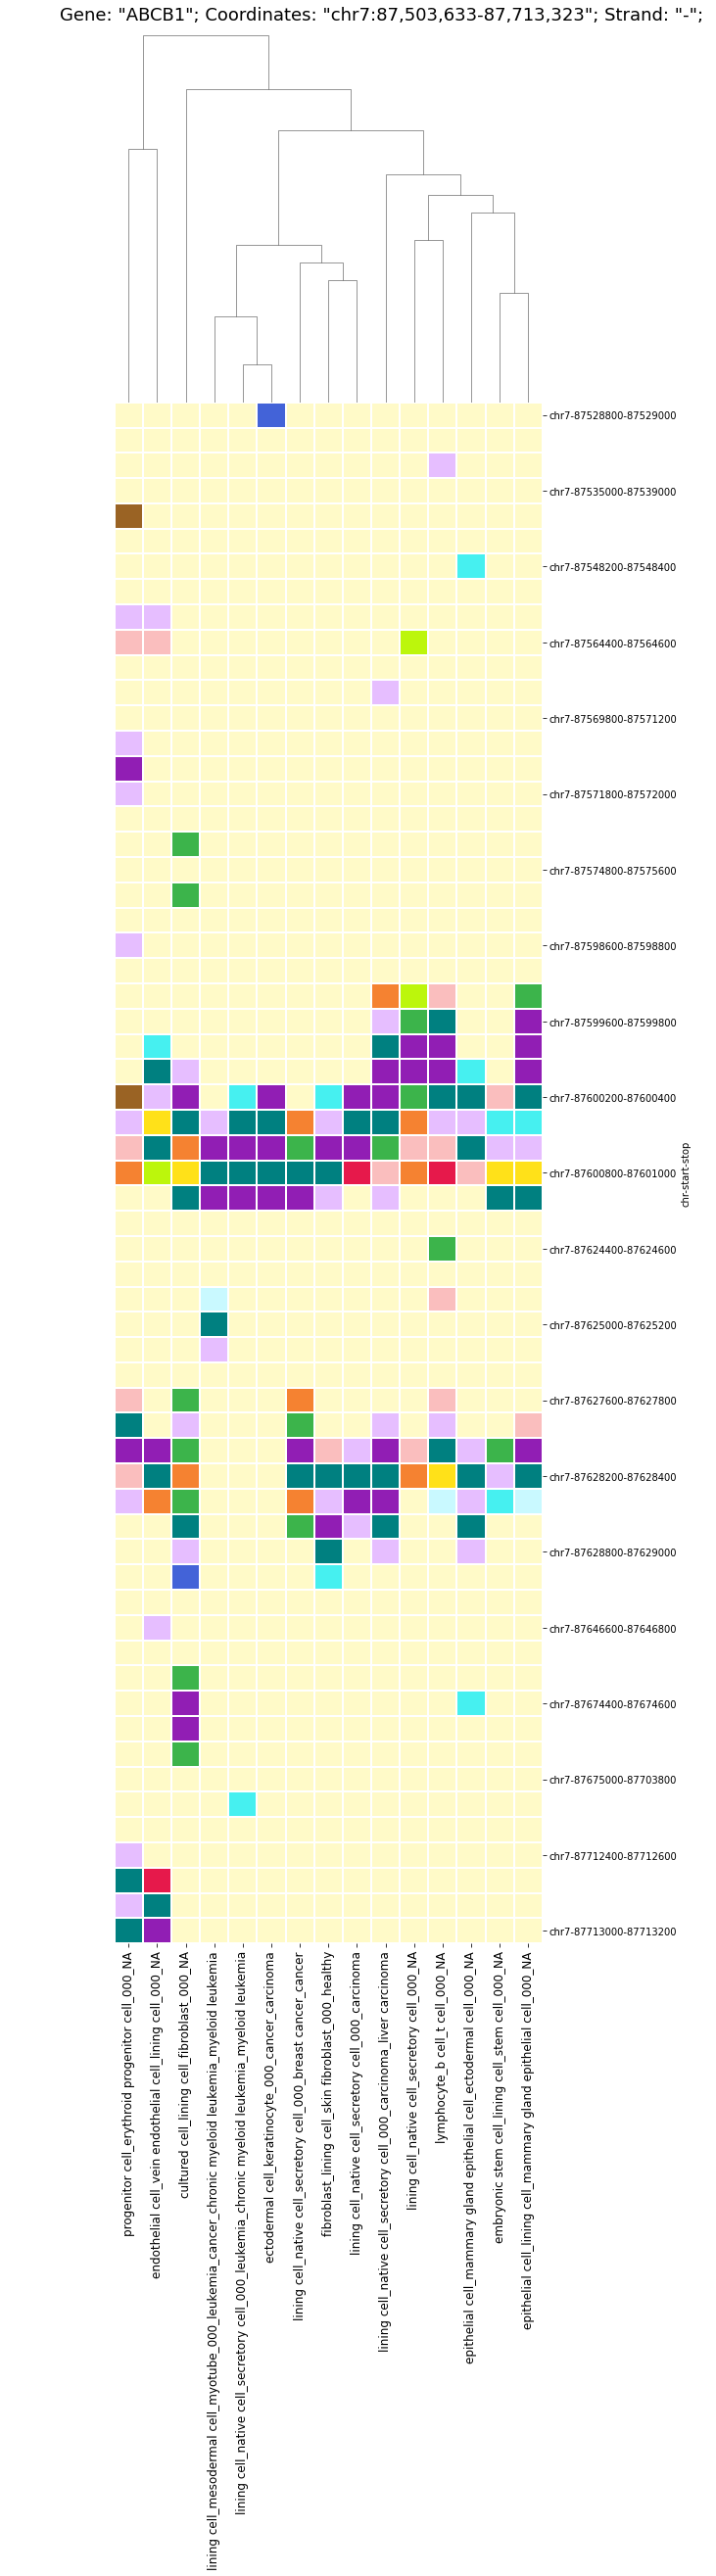

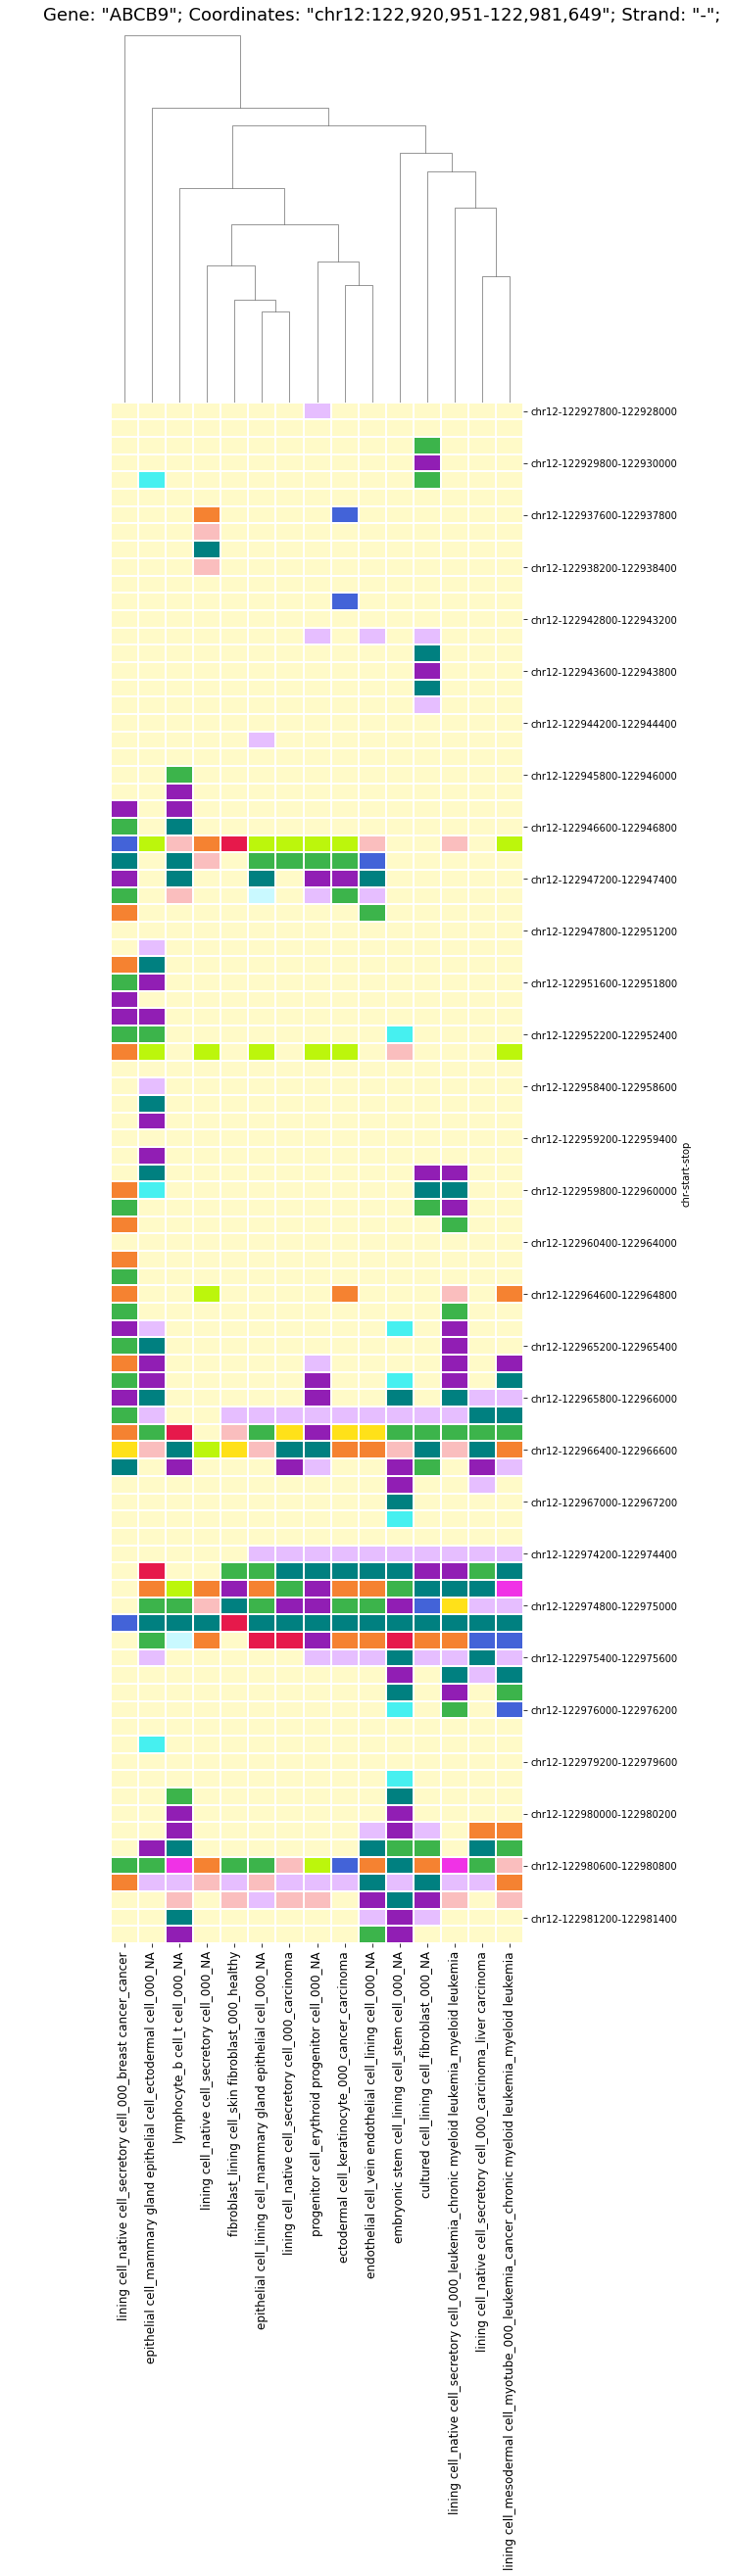

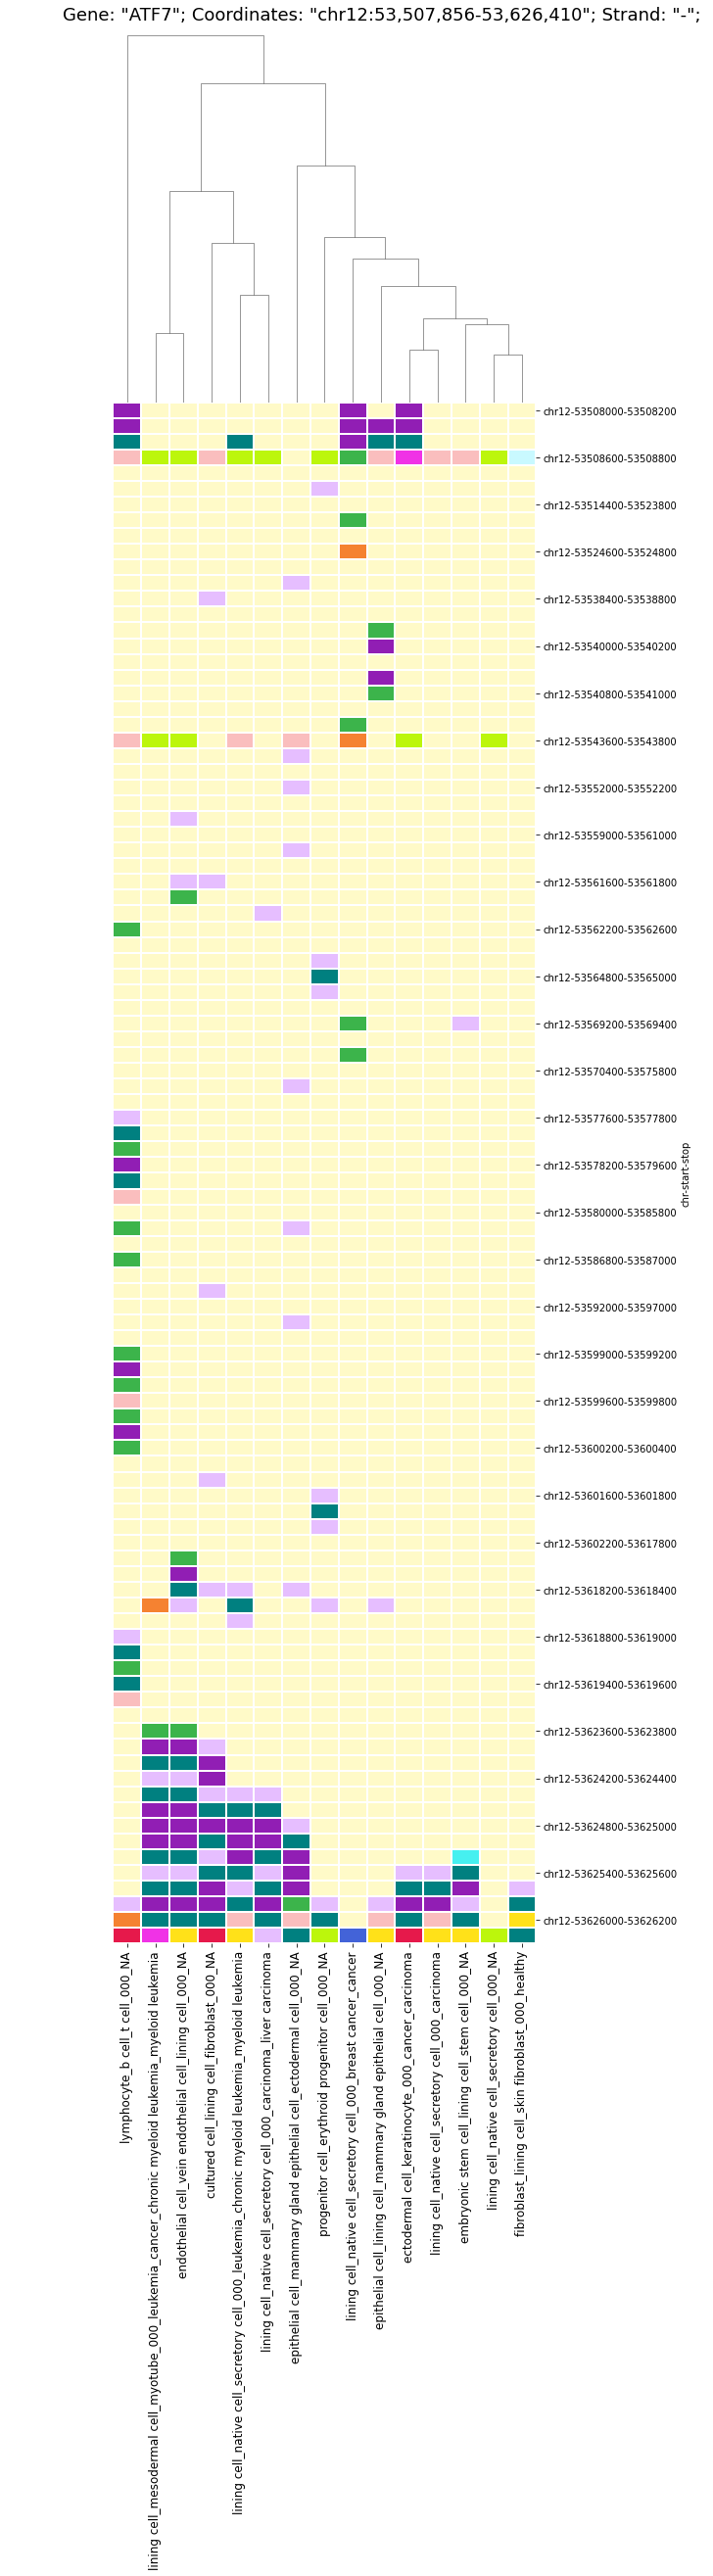

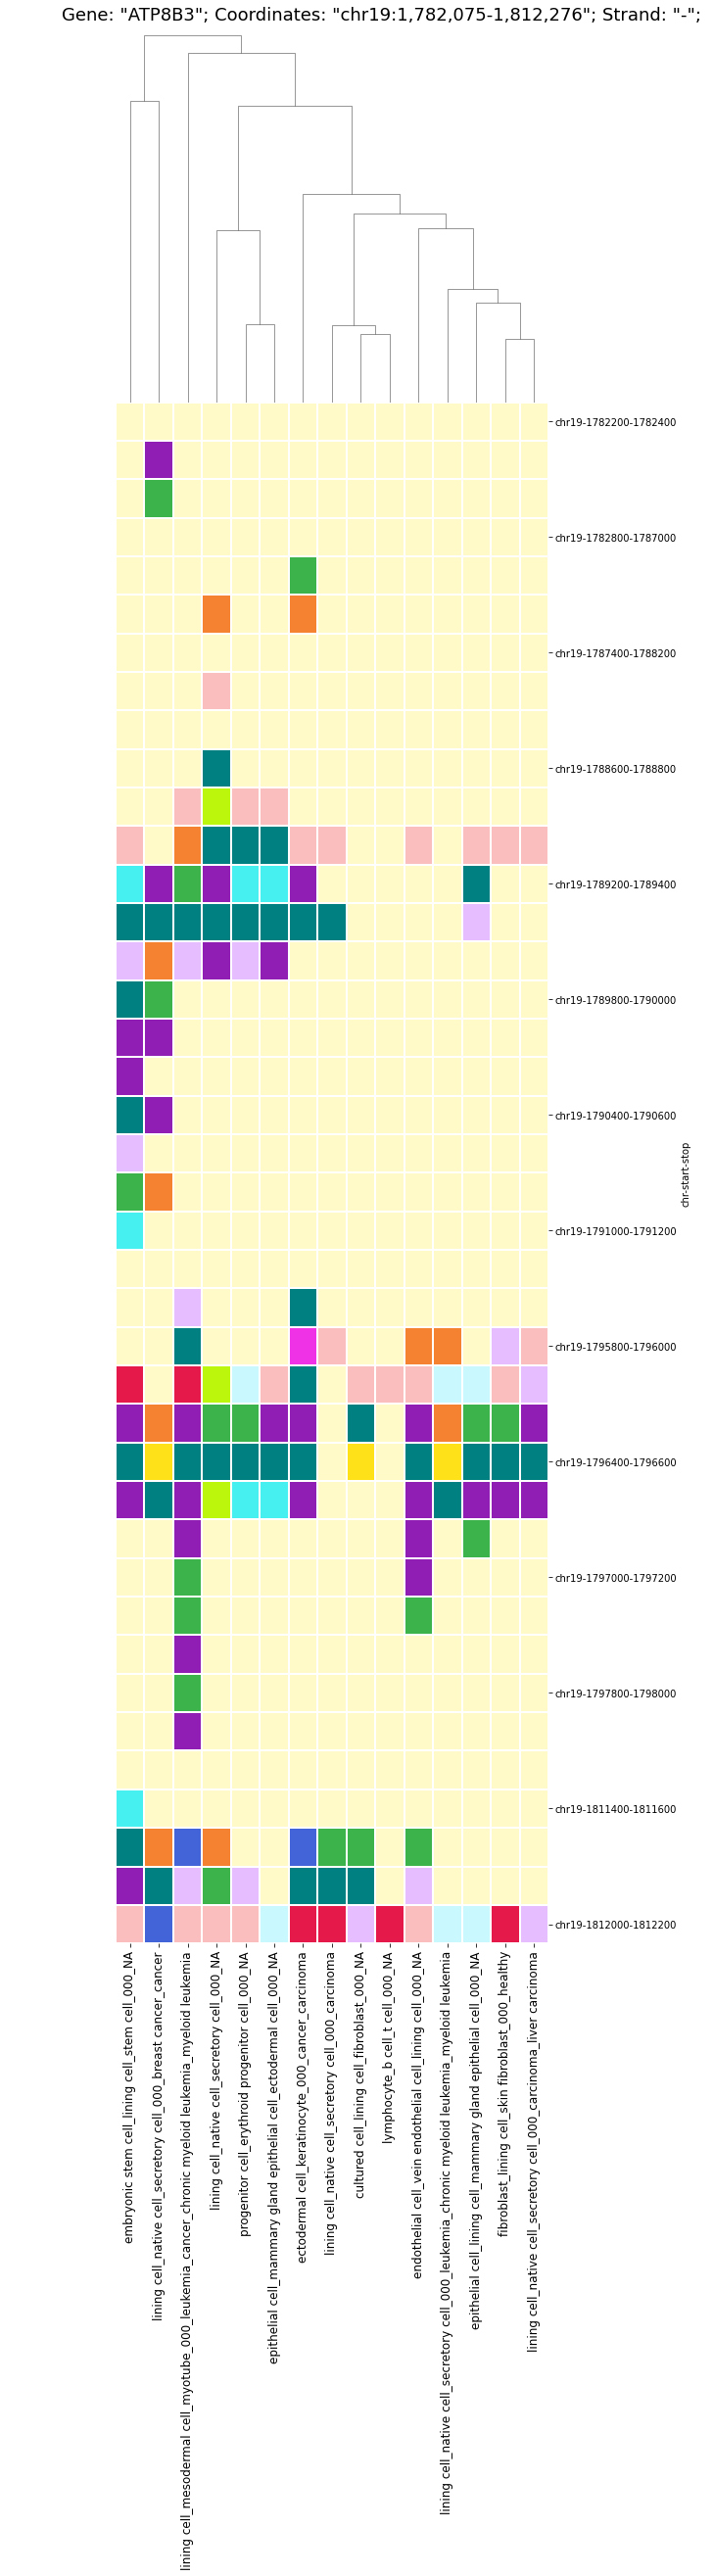

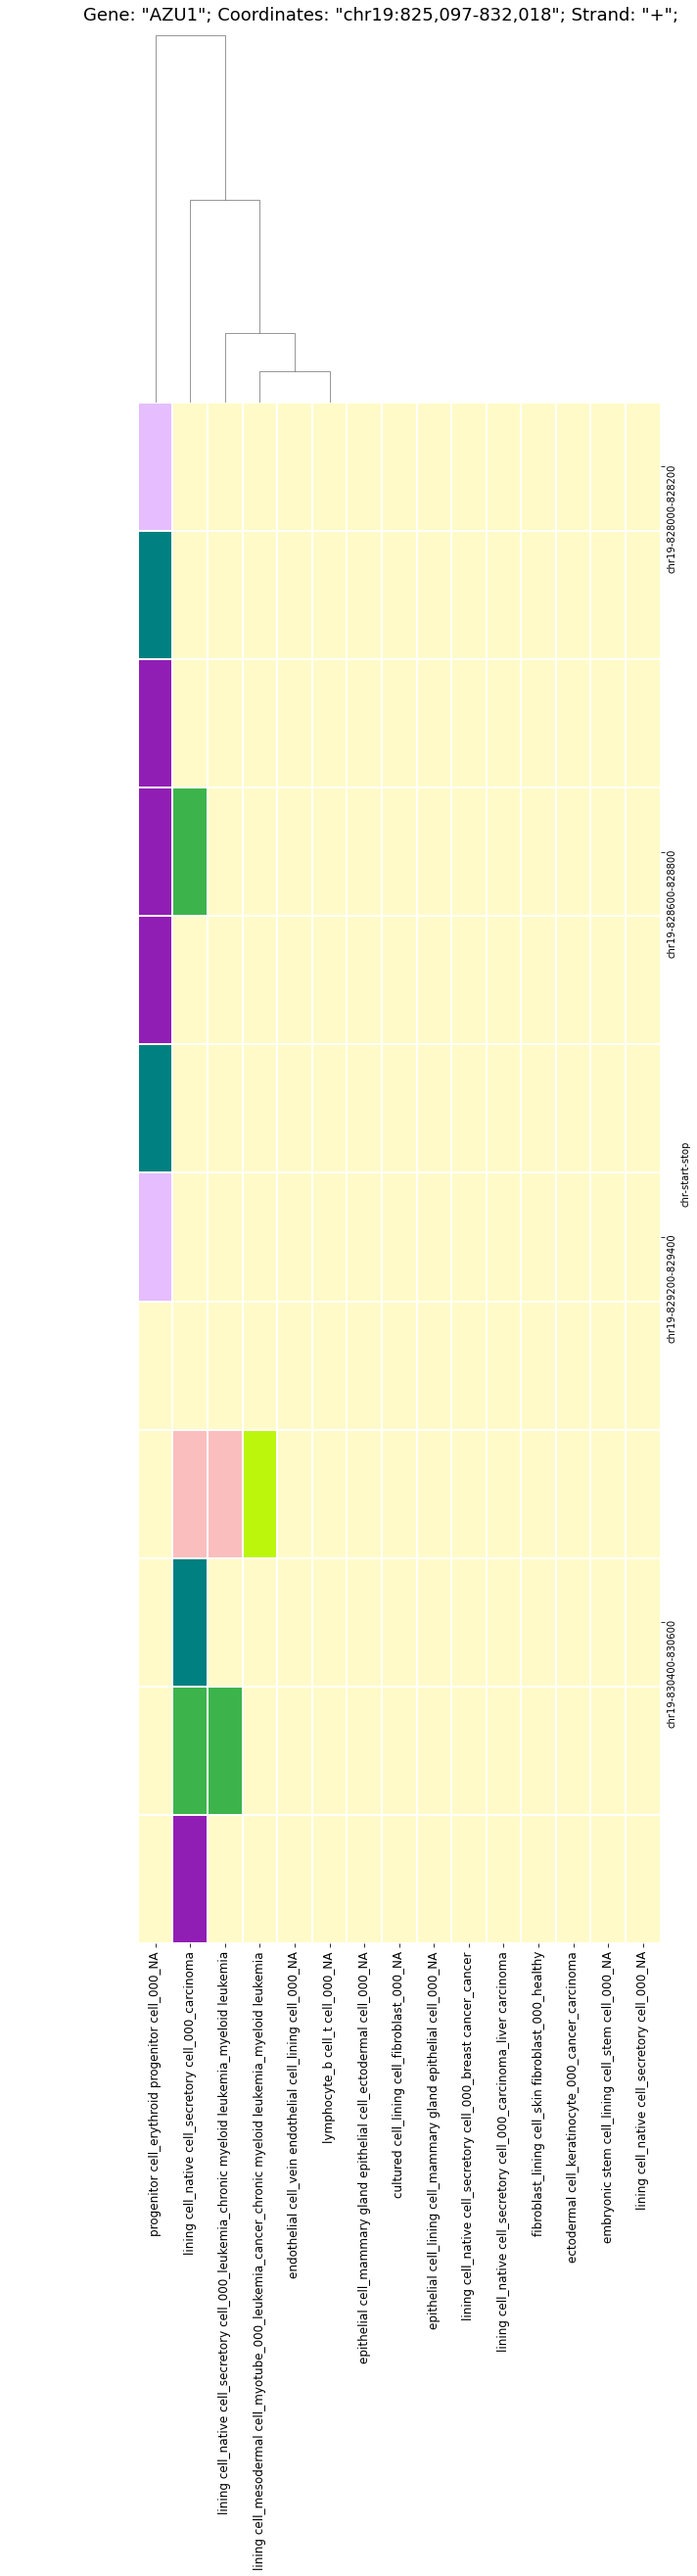

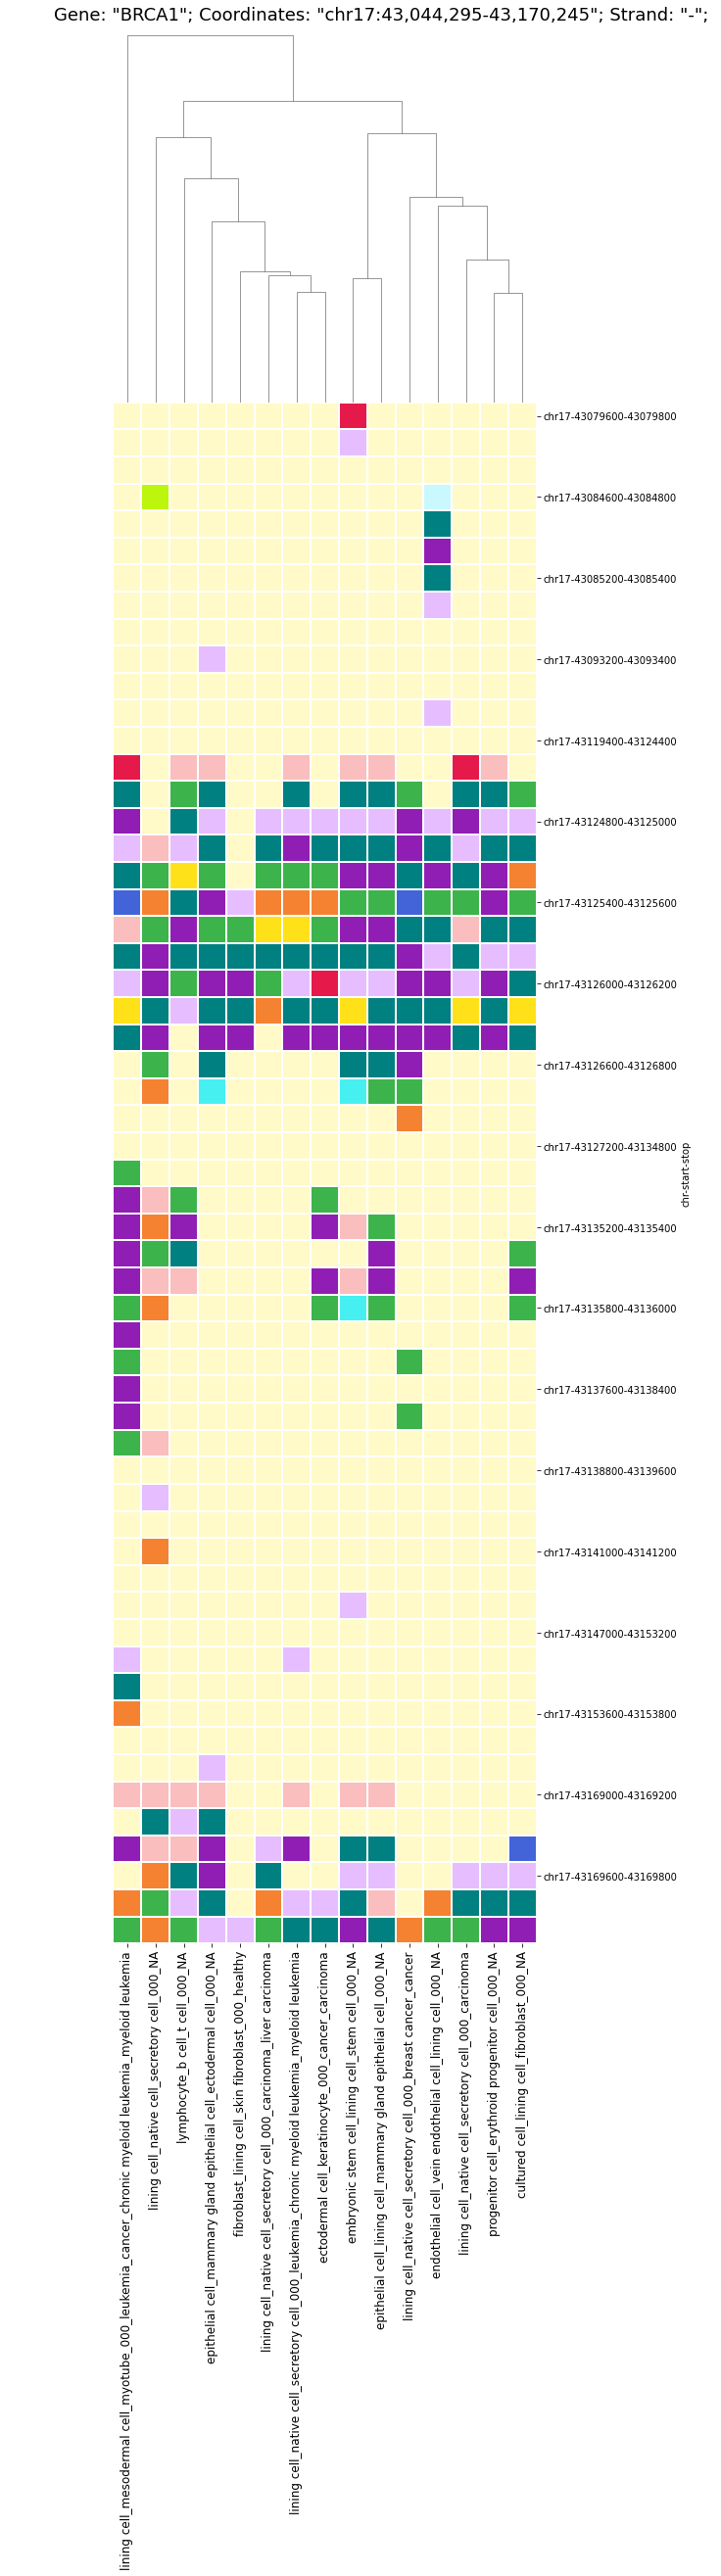

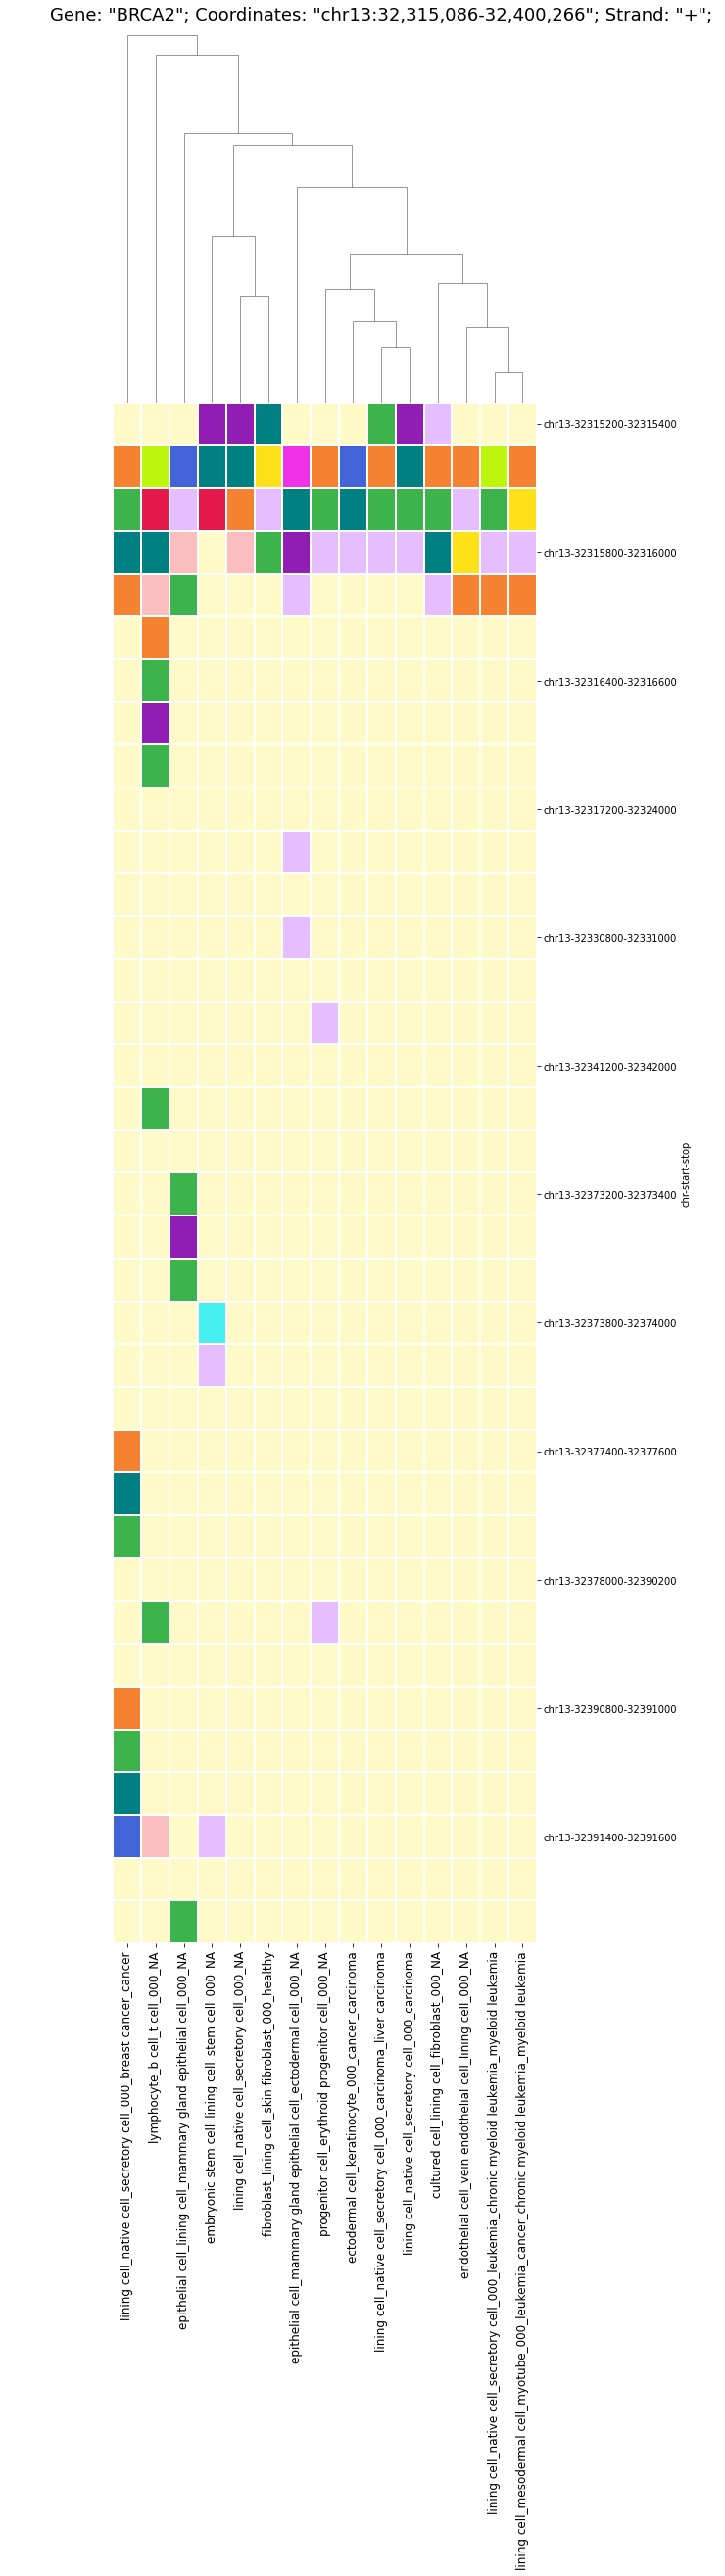

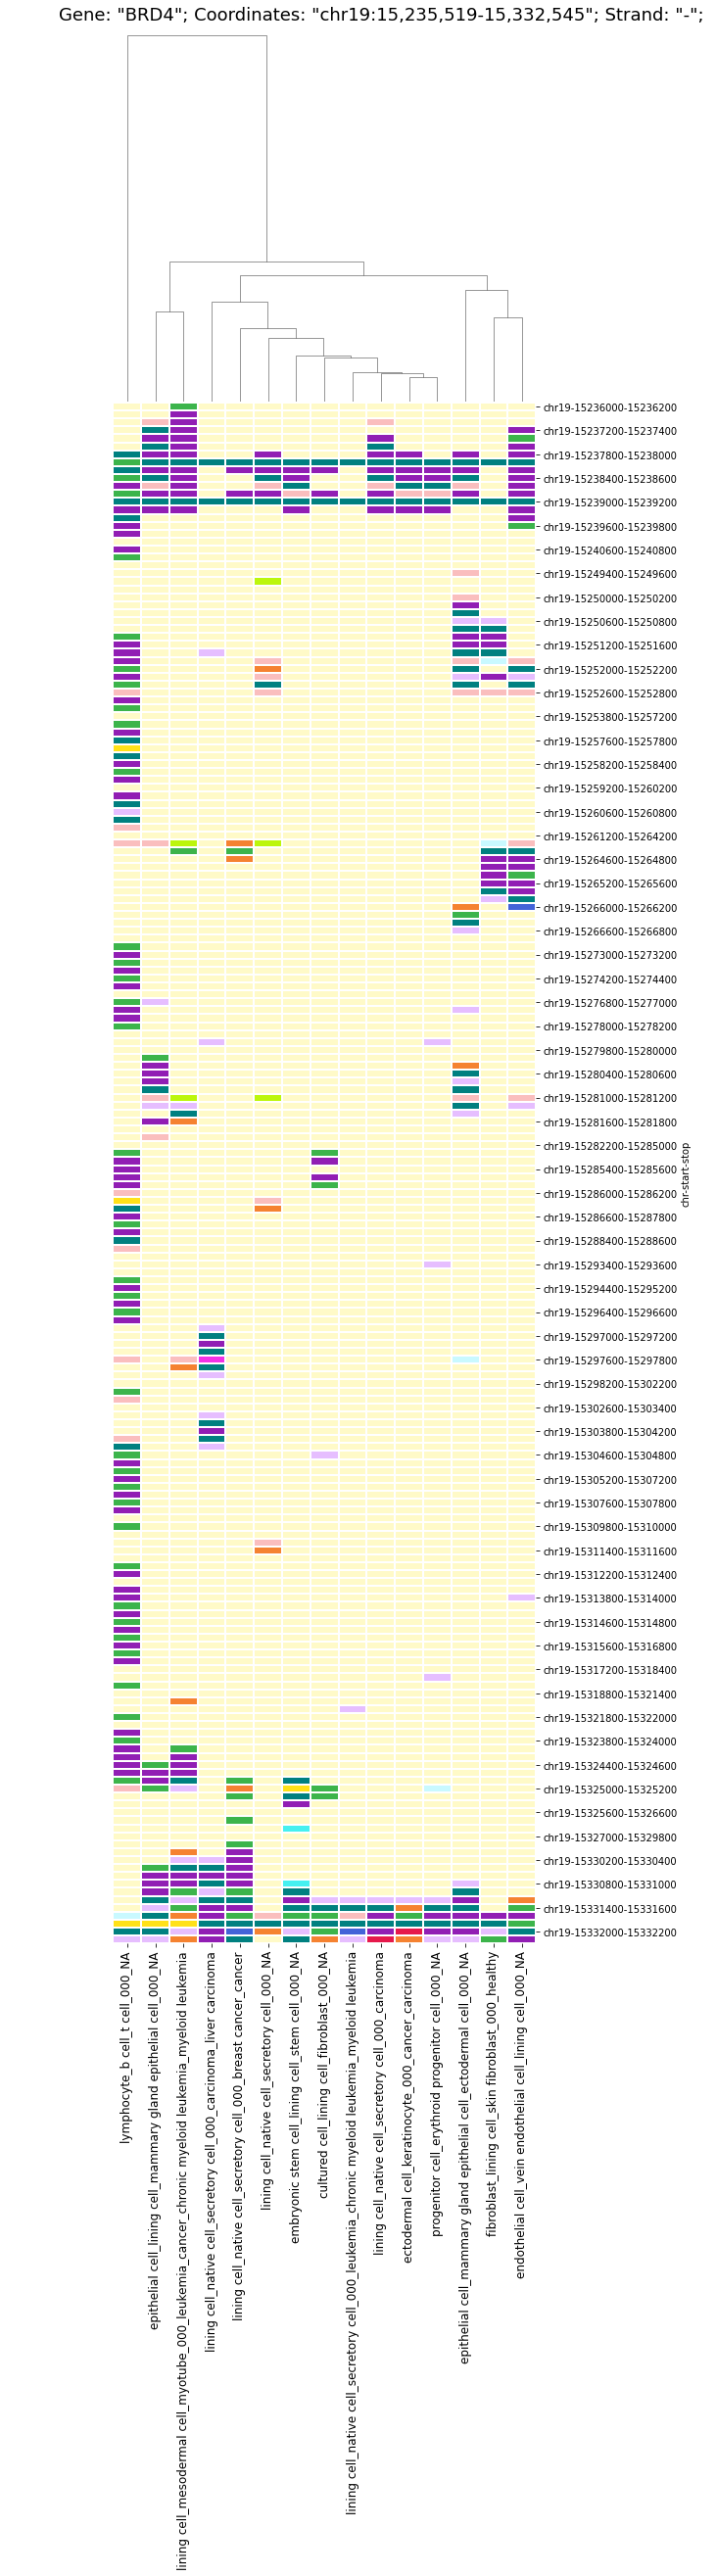

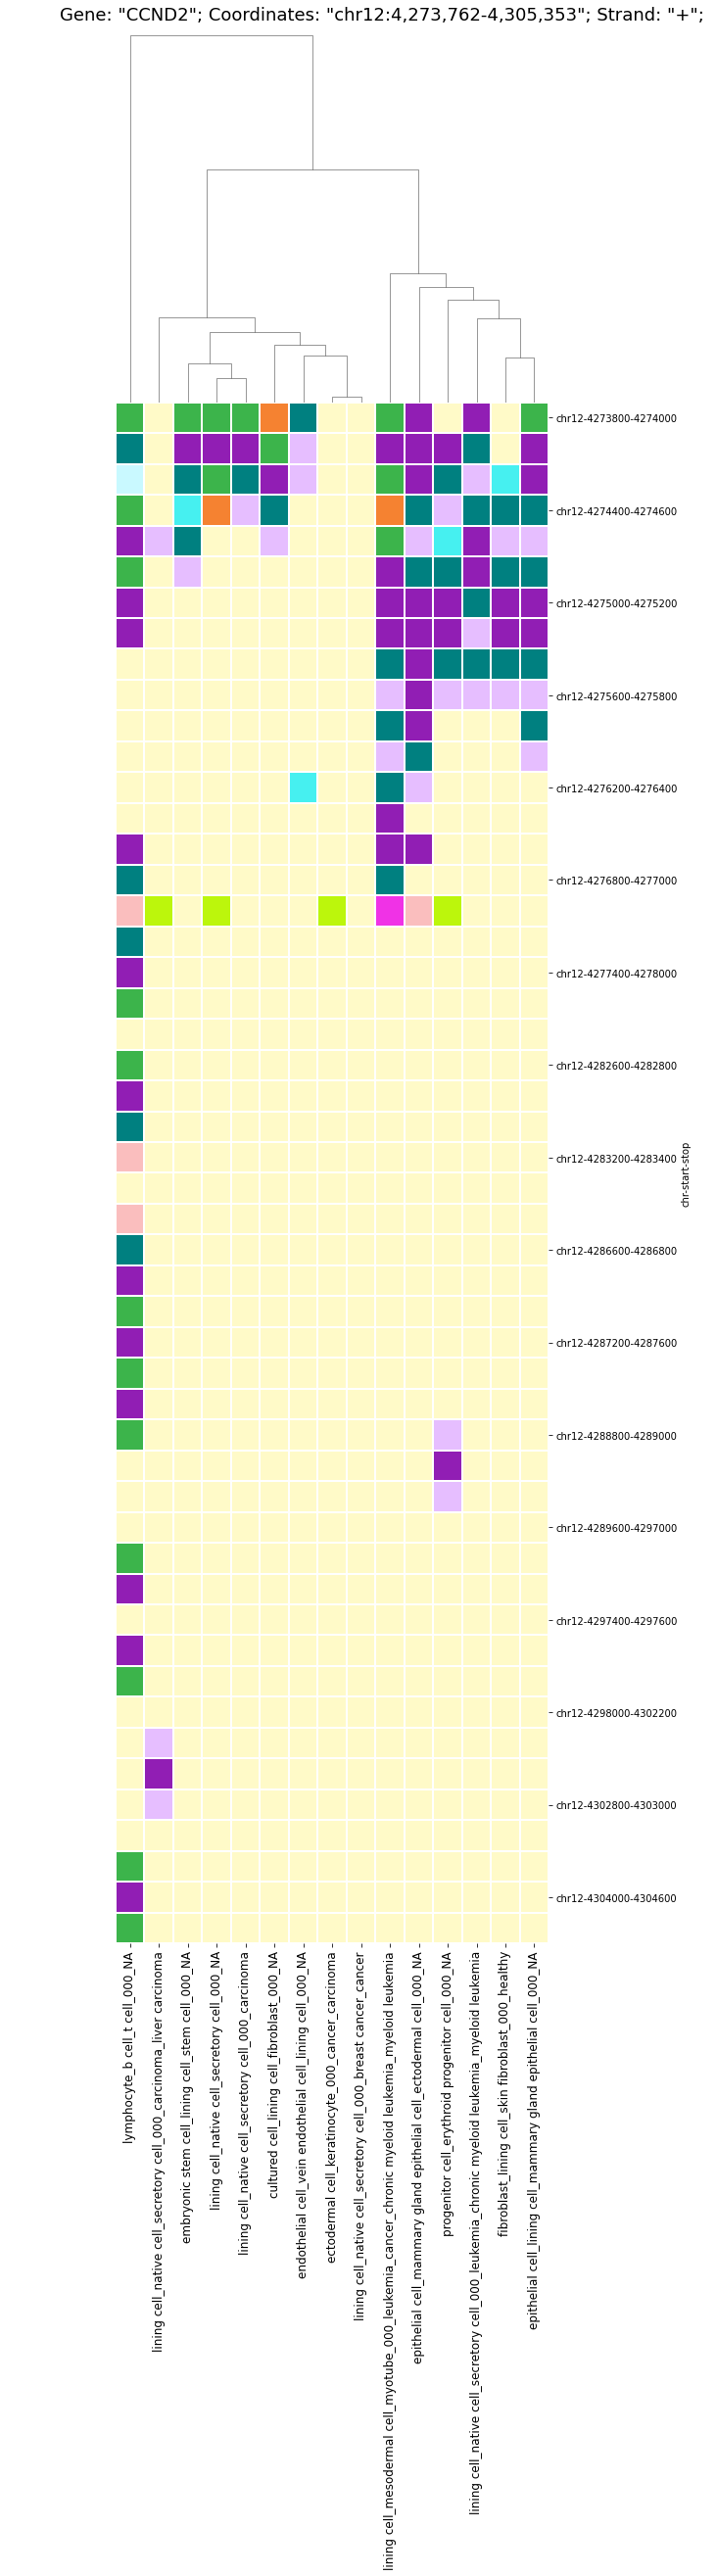

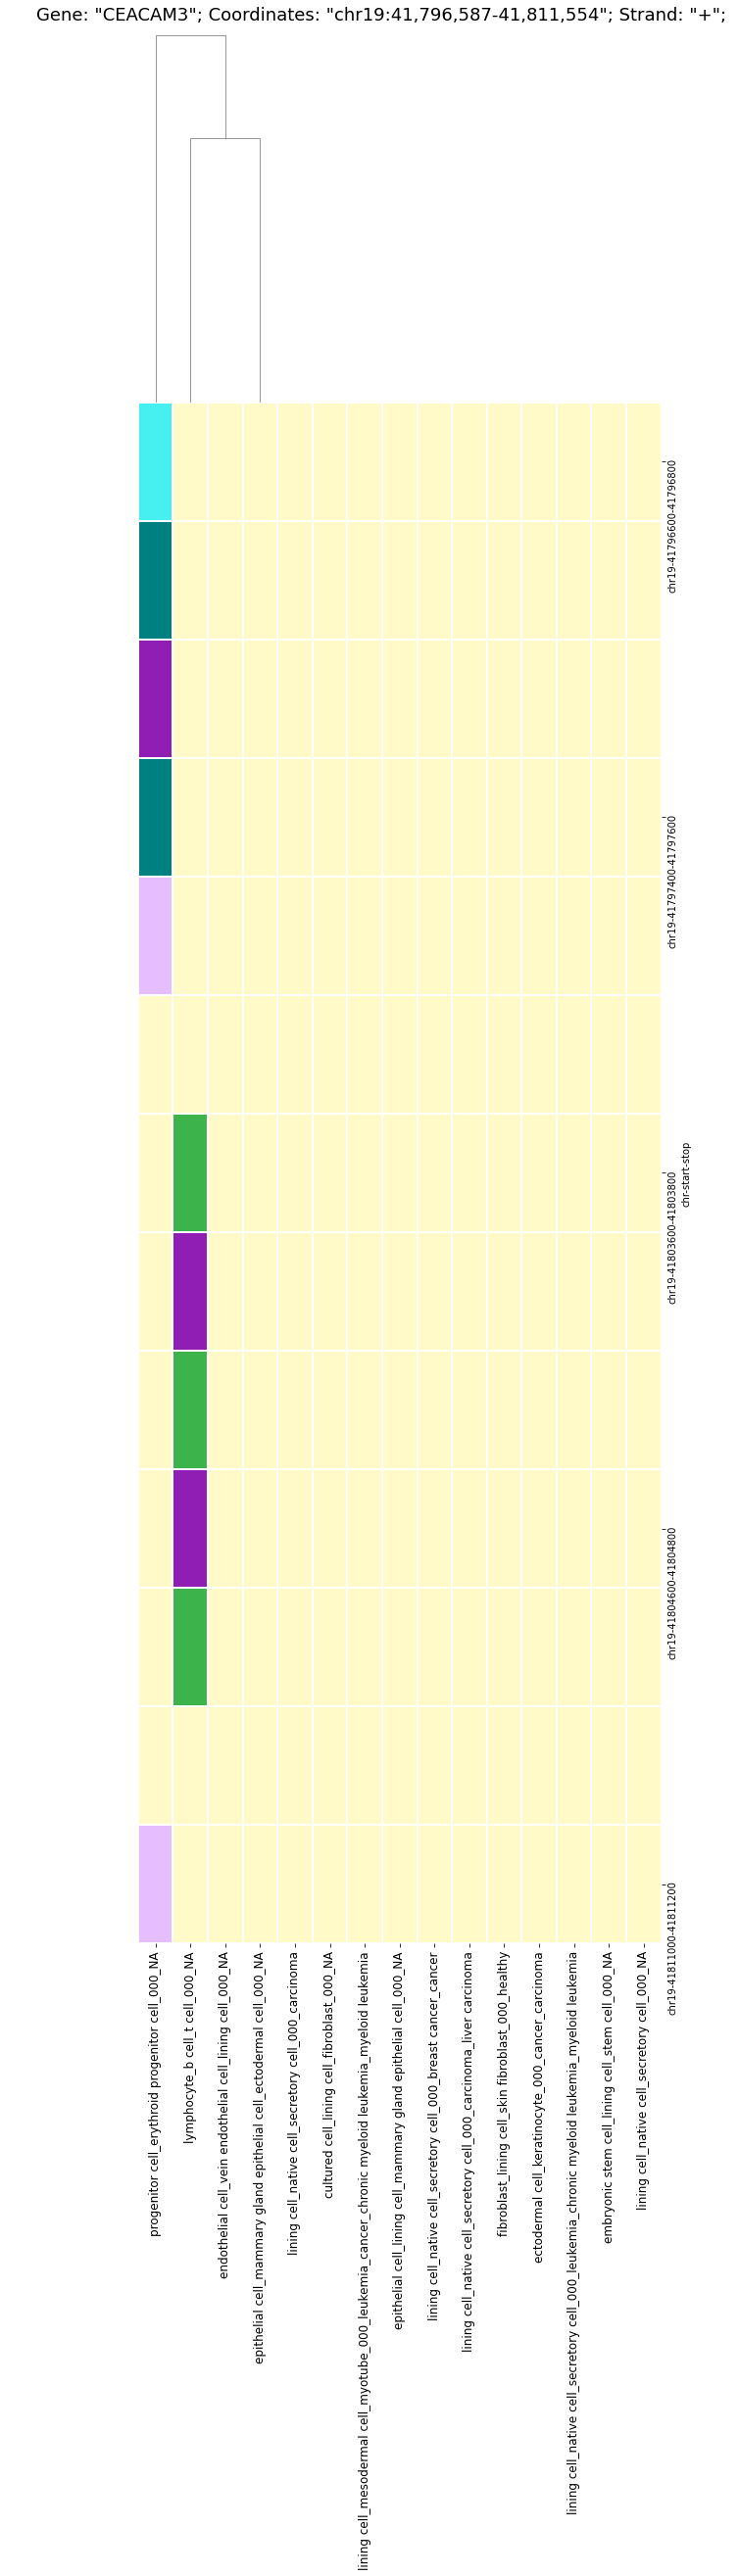

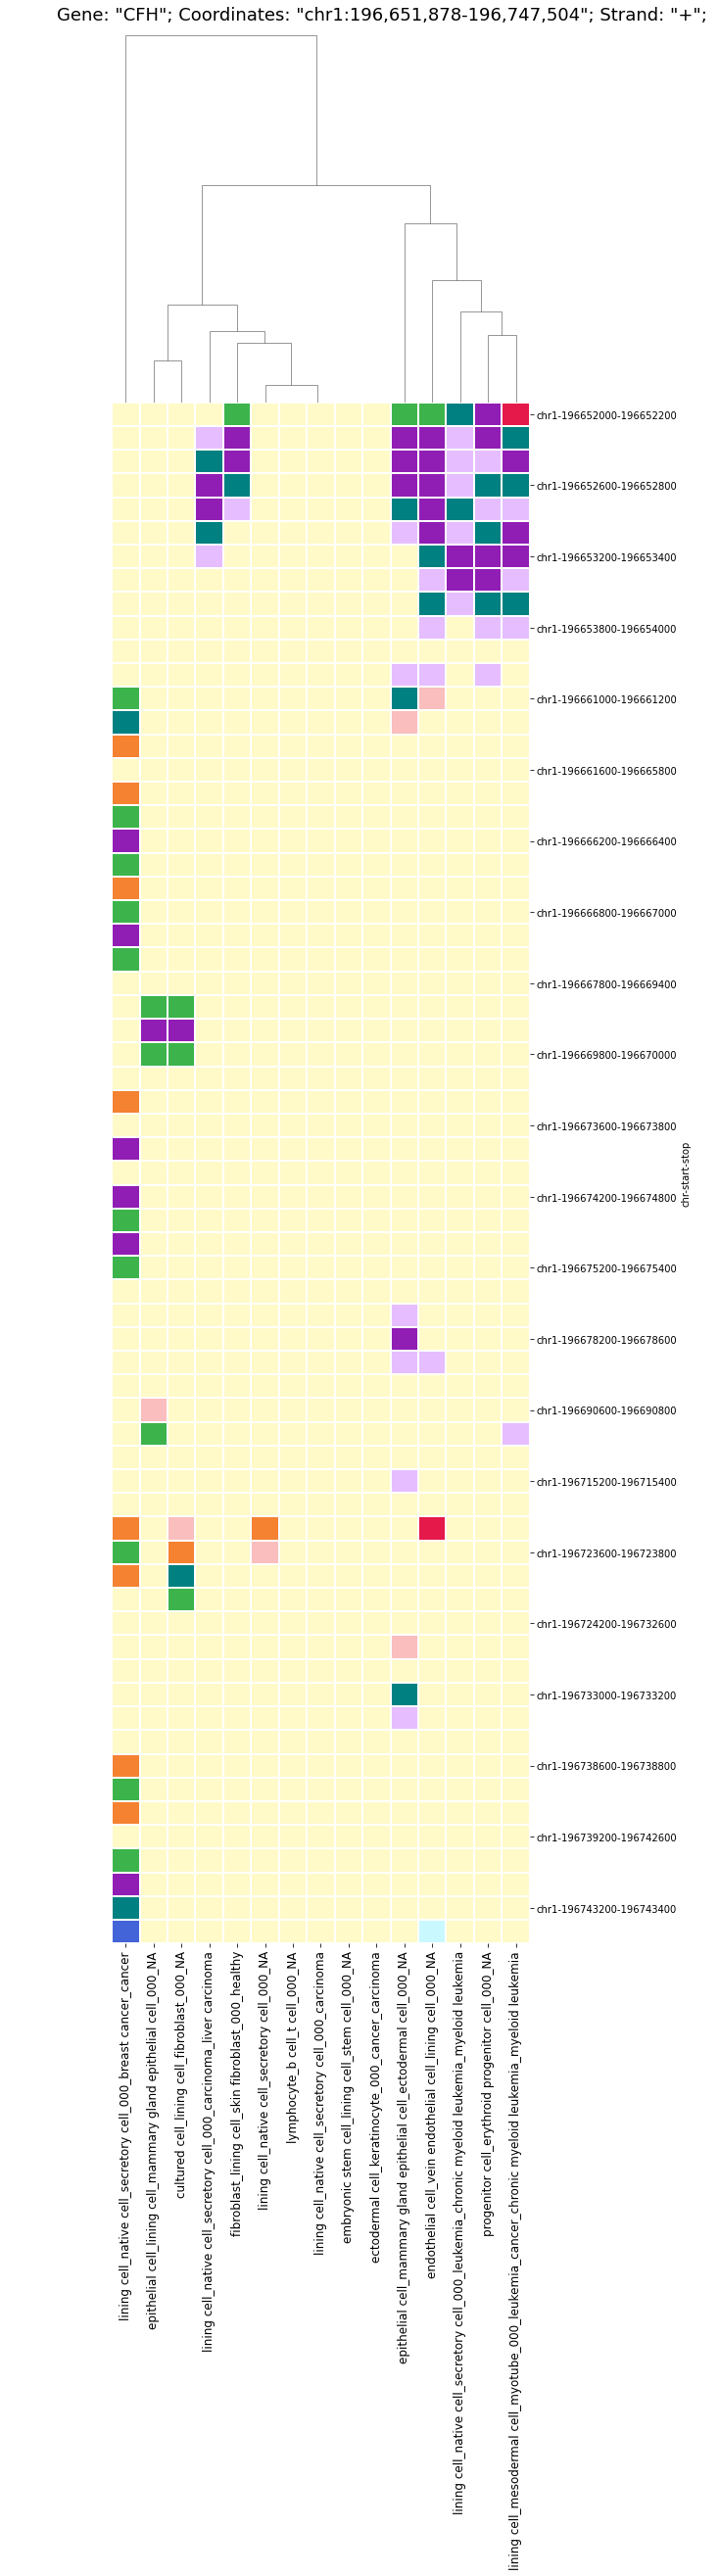

In [22]:
single_gene_analysis(functional_states_df, "./test/gene_list_test/gene_list_test.txt", functional_states_distance)

## PCA - analysis

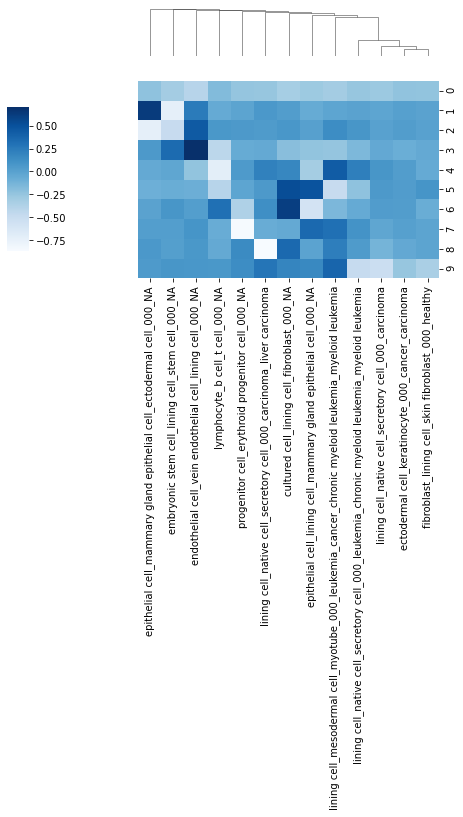

In [184]:
pca_analysis(functional_states_df, 10)

# Genome-wide analysis 

In [33]:
#reducted_df = genome_reduction(functional_states_df, treshold=90)

 chrY  

In [23]:
reducted_df = load_reducted_df()

In [24]:
reducted_df =  reducted_df.rename(columns=lambda x: x.replace('unknown', 'NA'))

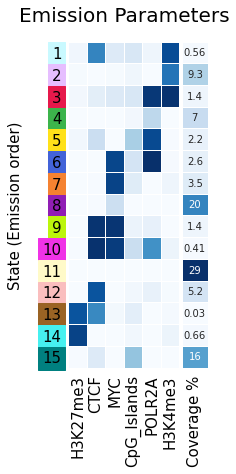

In [25]:
show_emission_graph_with_coverage(reducted_df, custom_palette=palette)

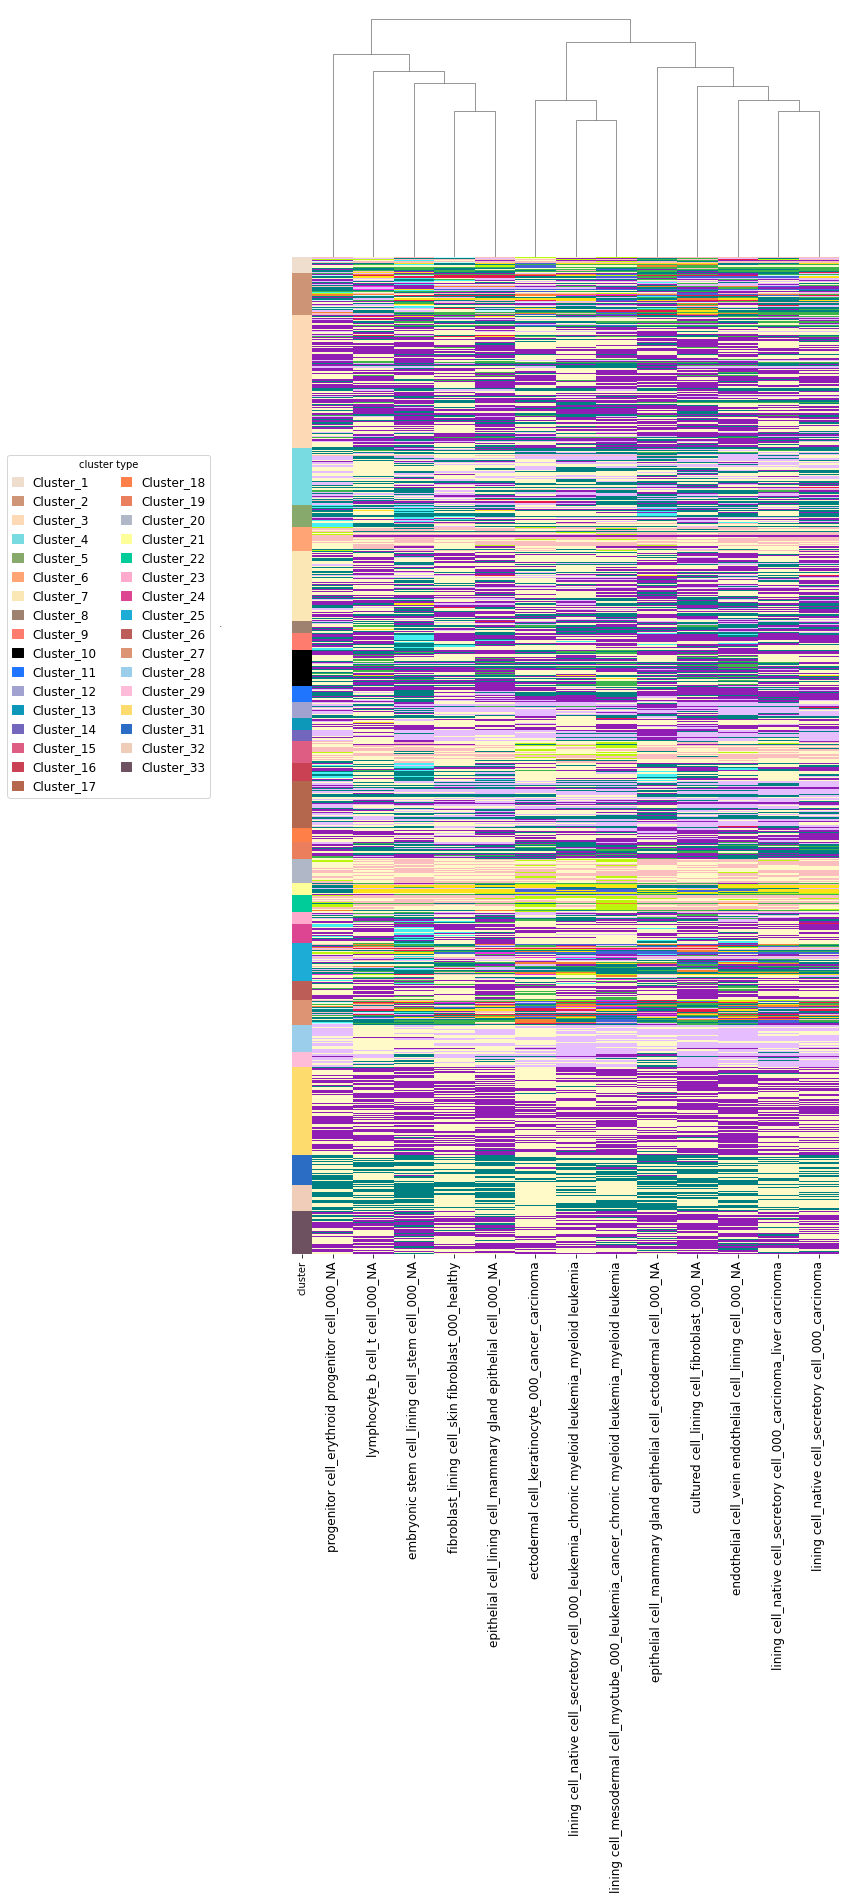

In [110]:
clustered_heatmap = data_driven_heatmap(reducted_df, functional_states_distance, min_clust_size=10, min_sampl=2) 

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |=====================================

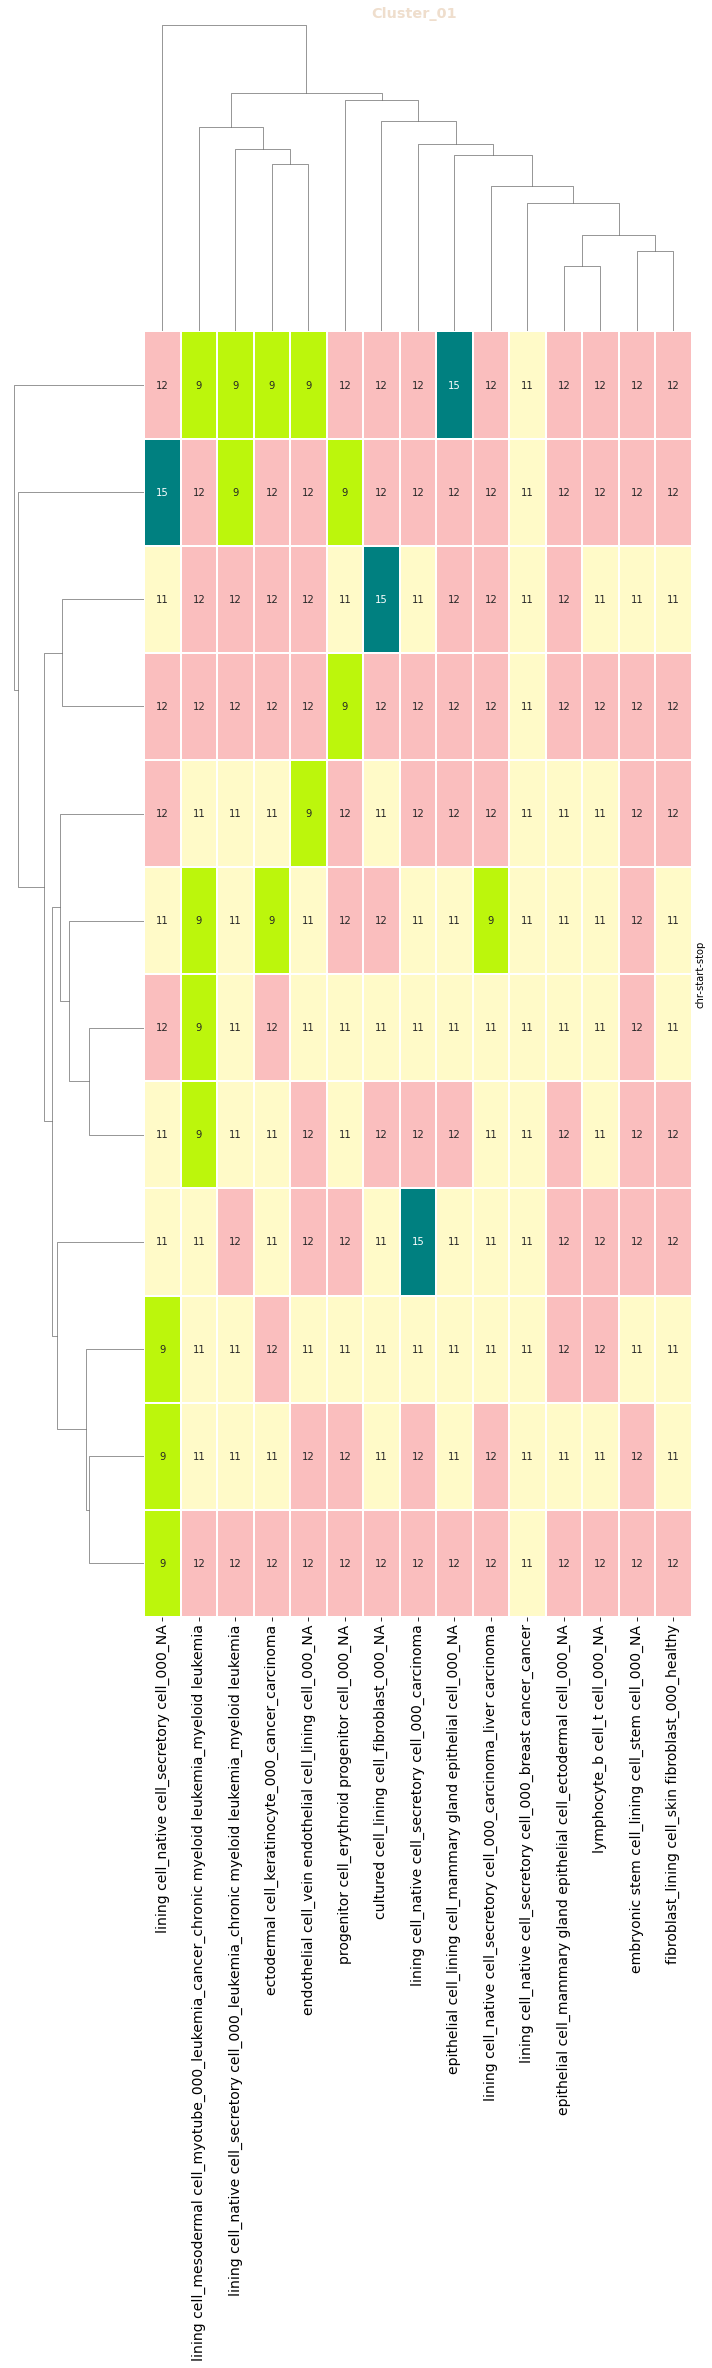

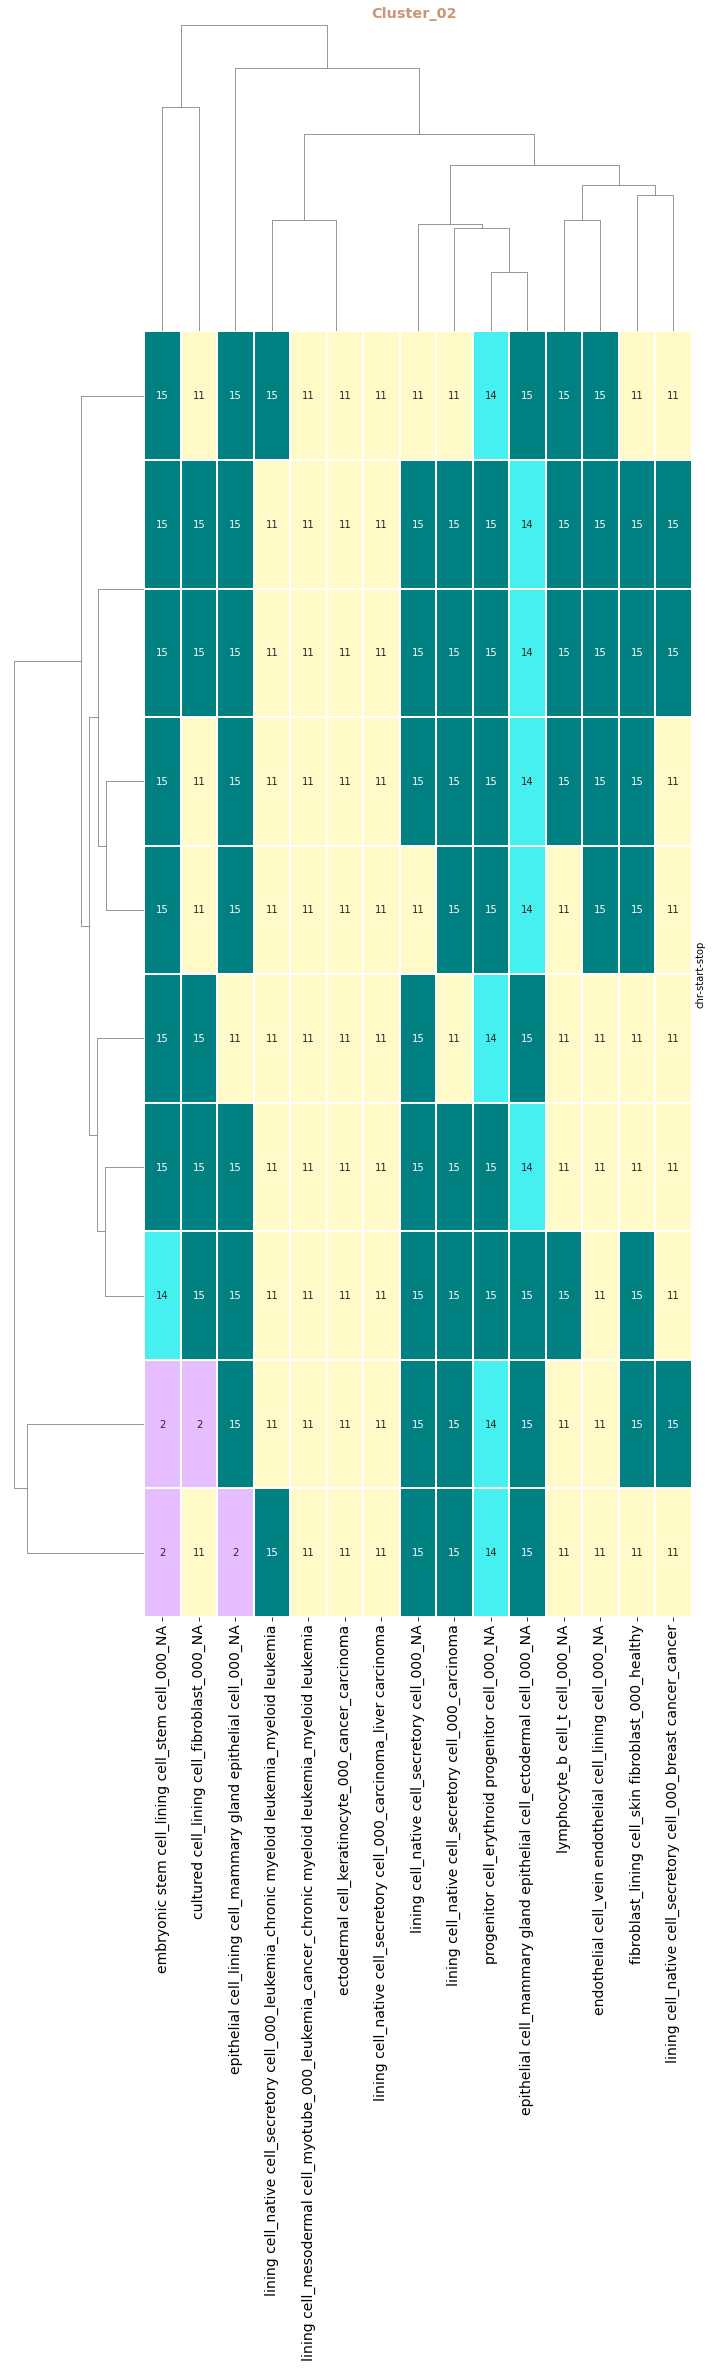

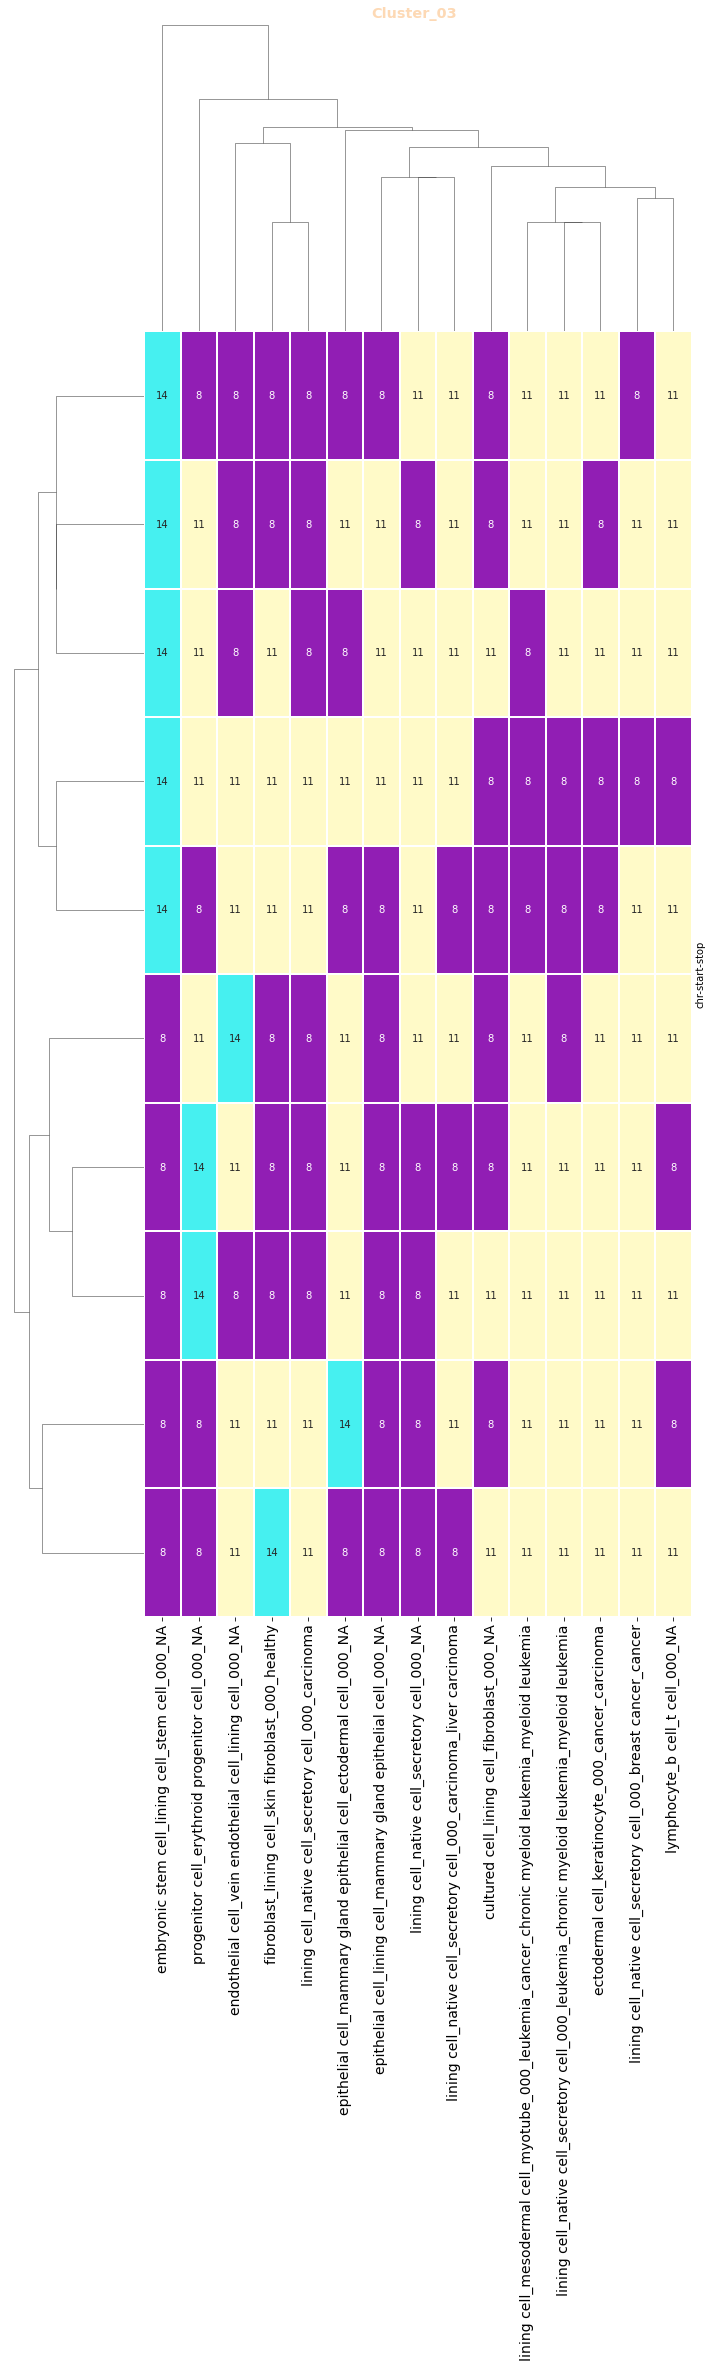

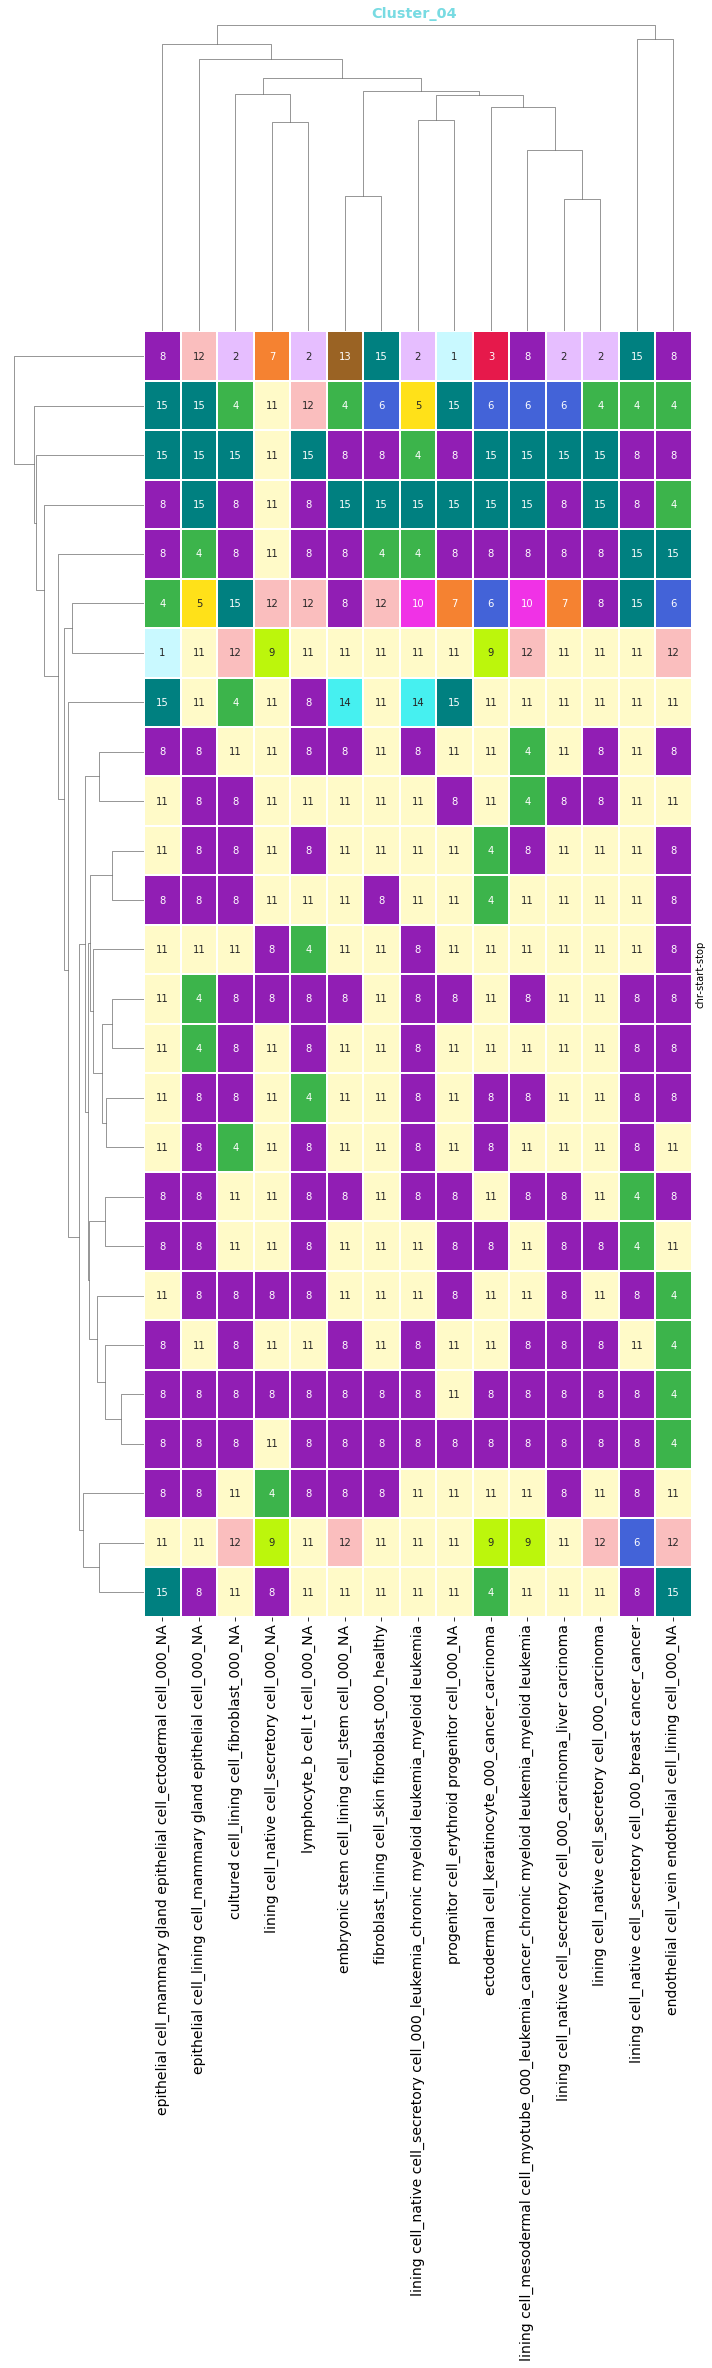

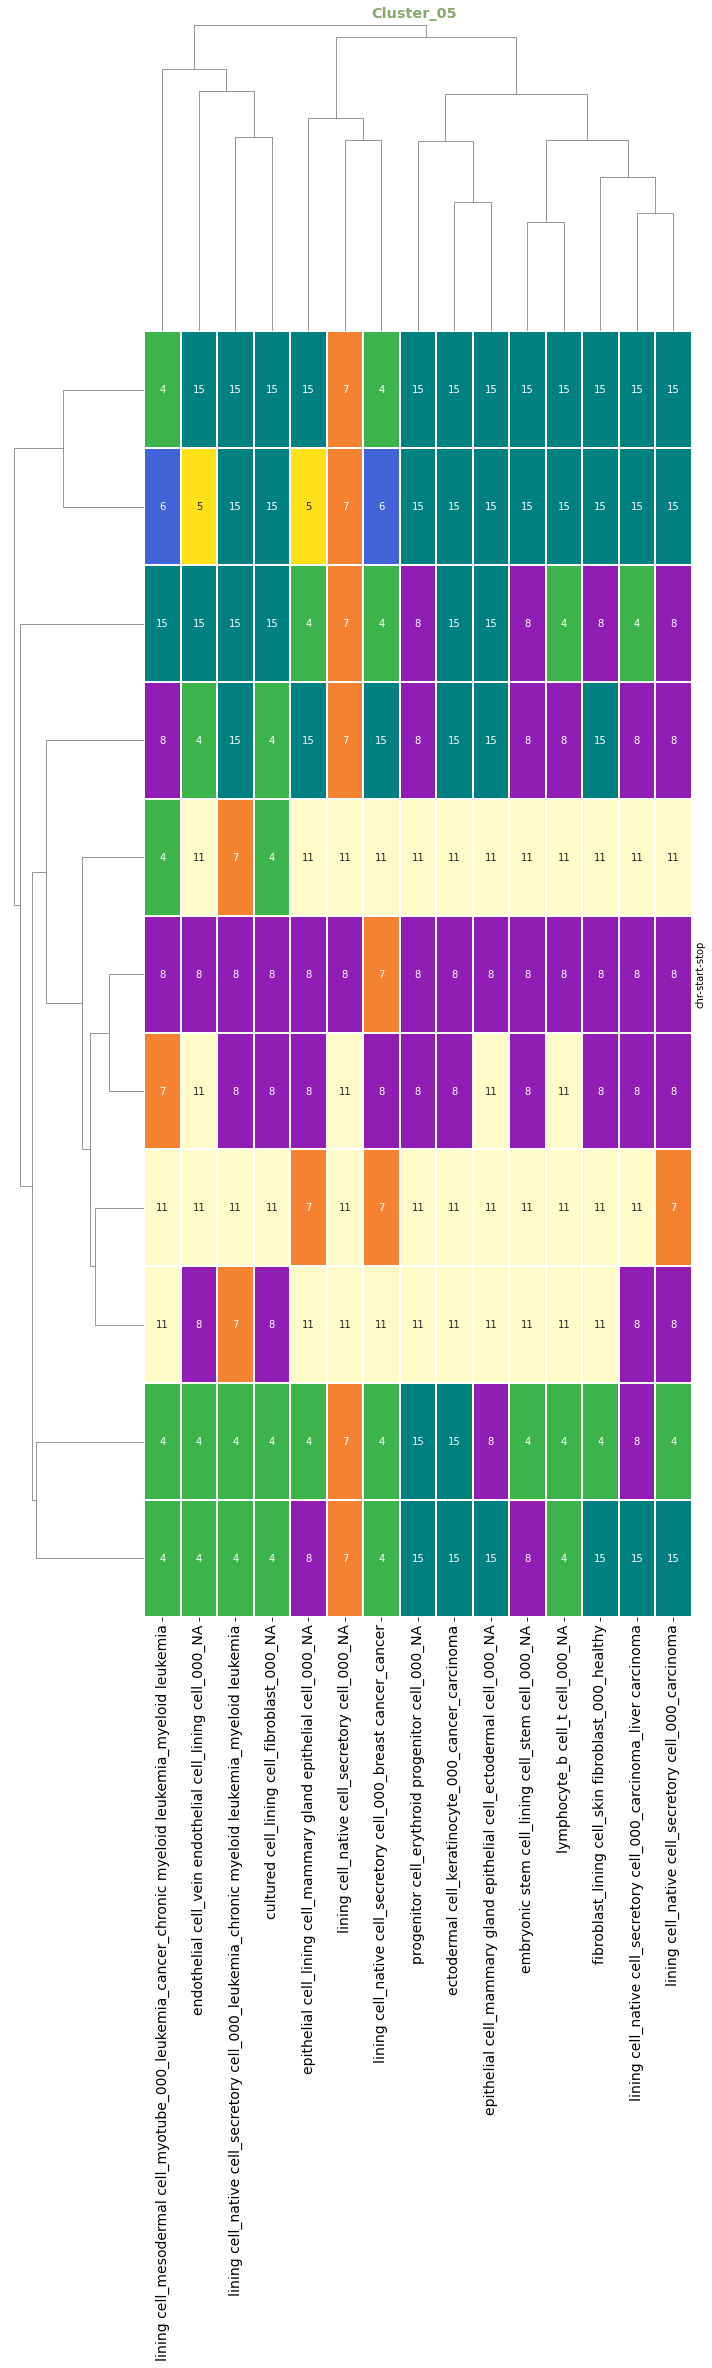

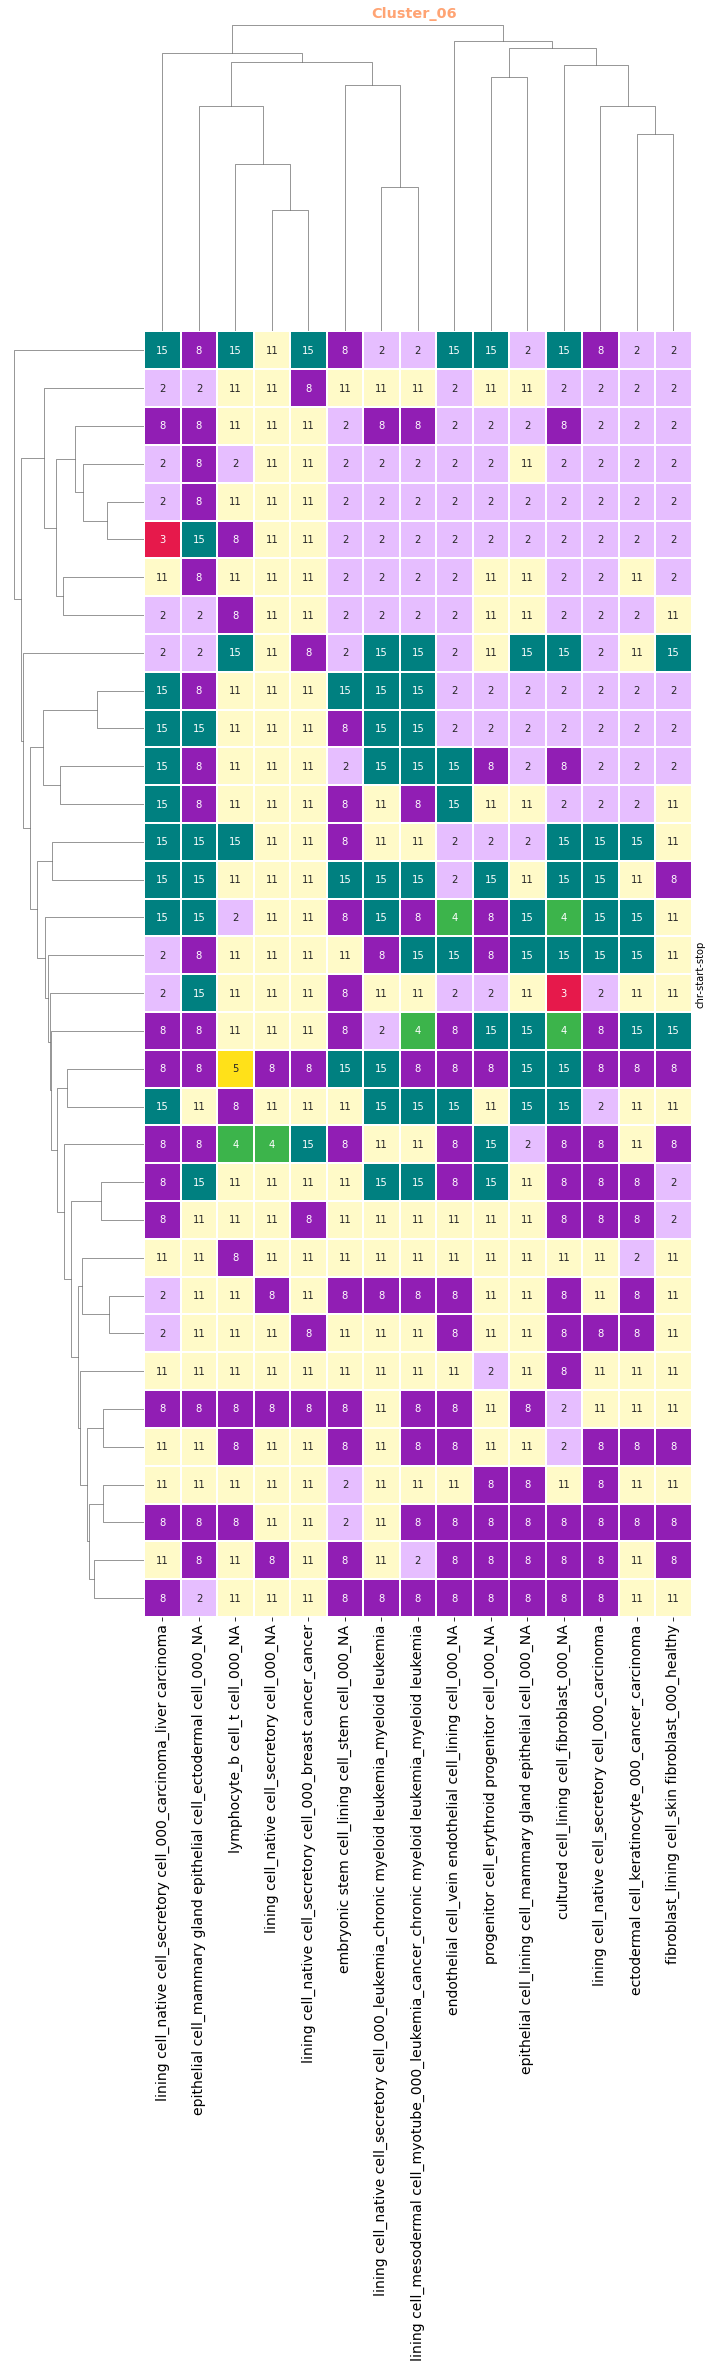

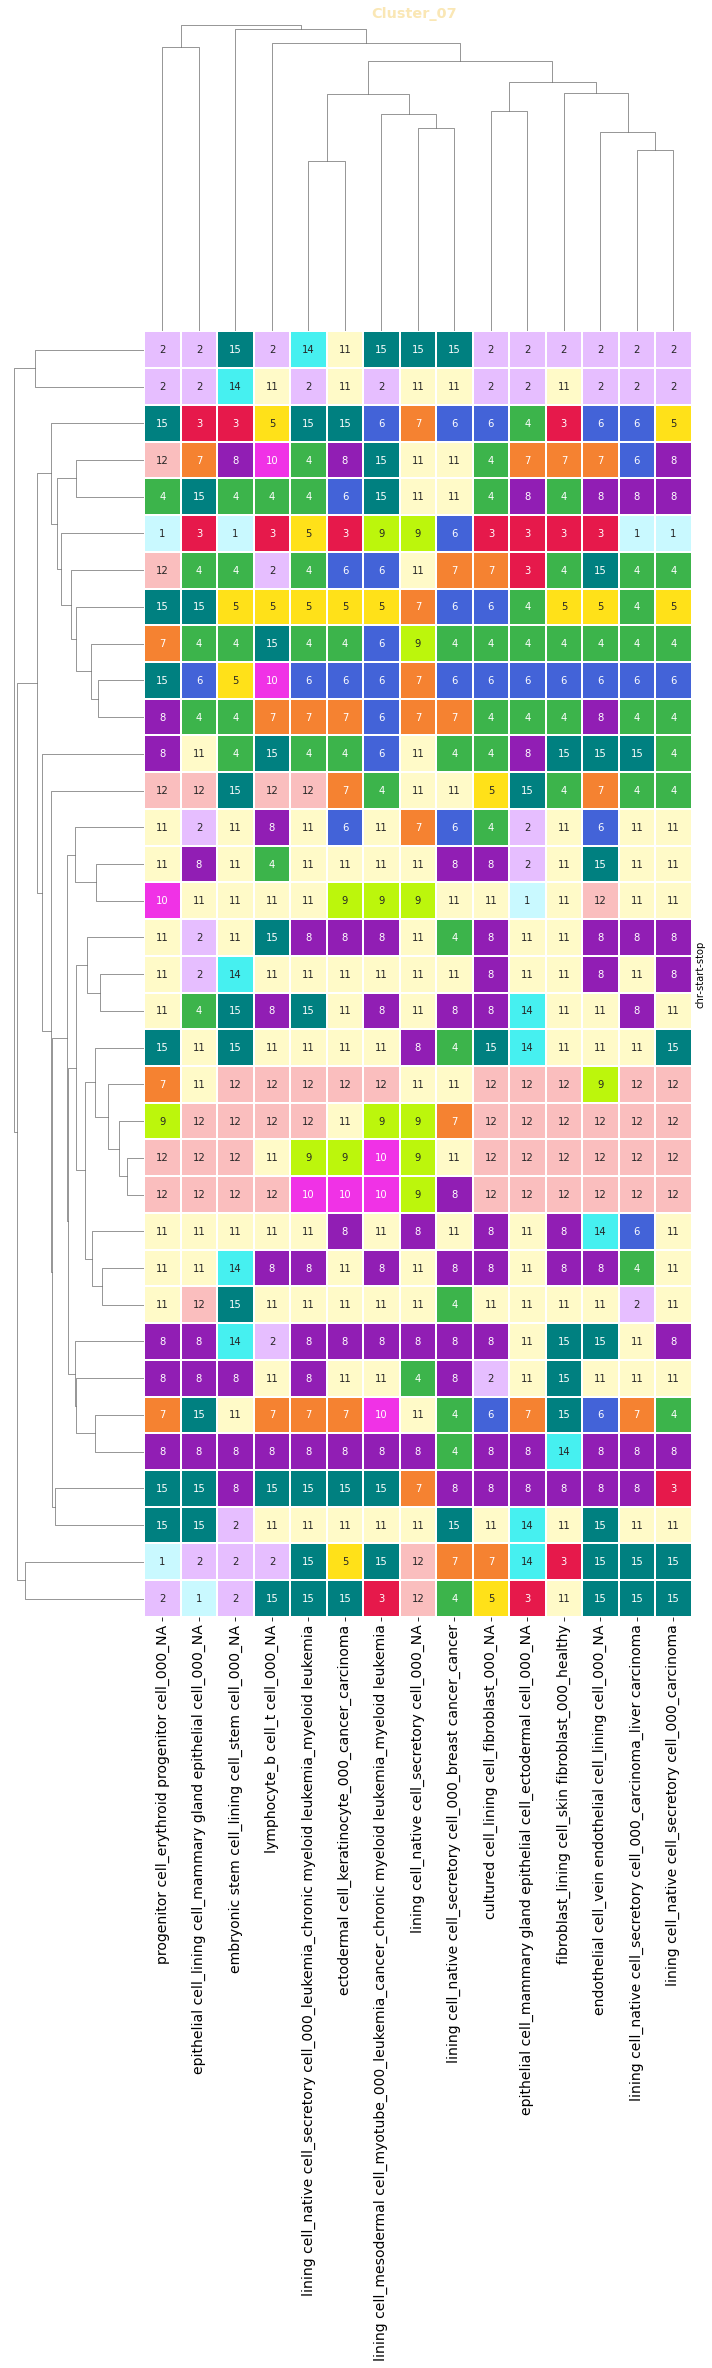

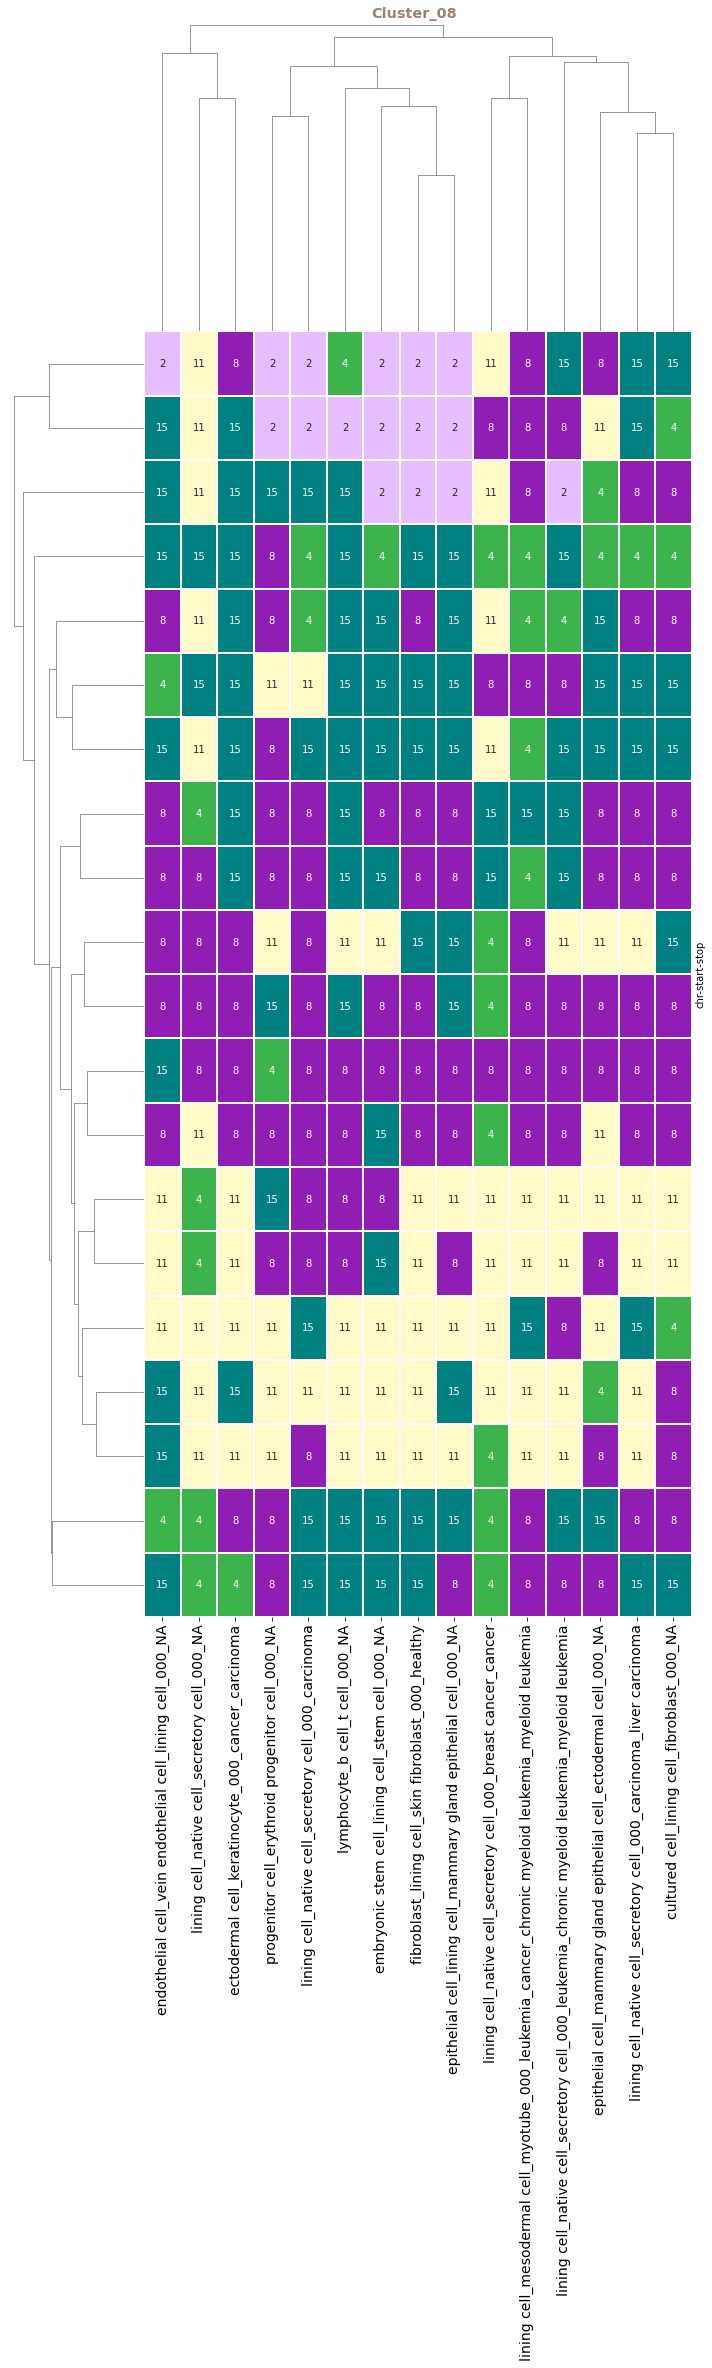

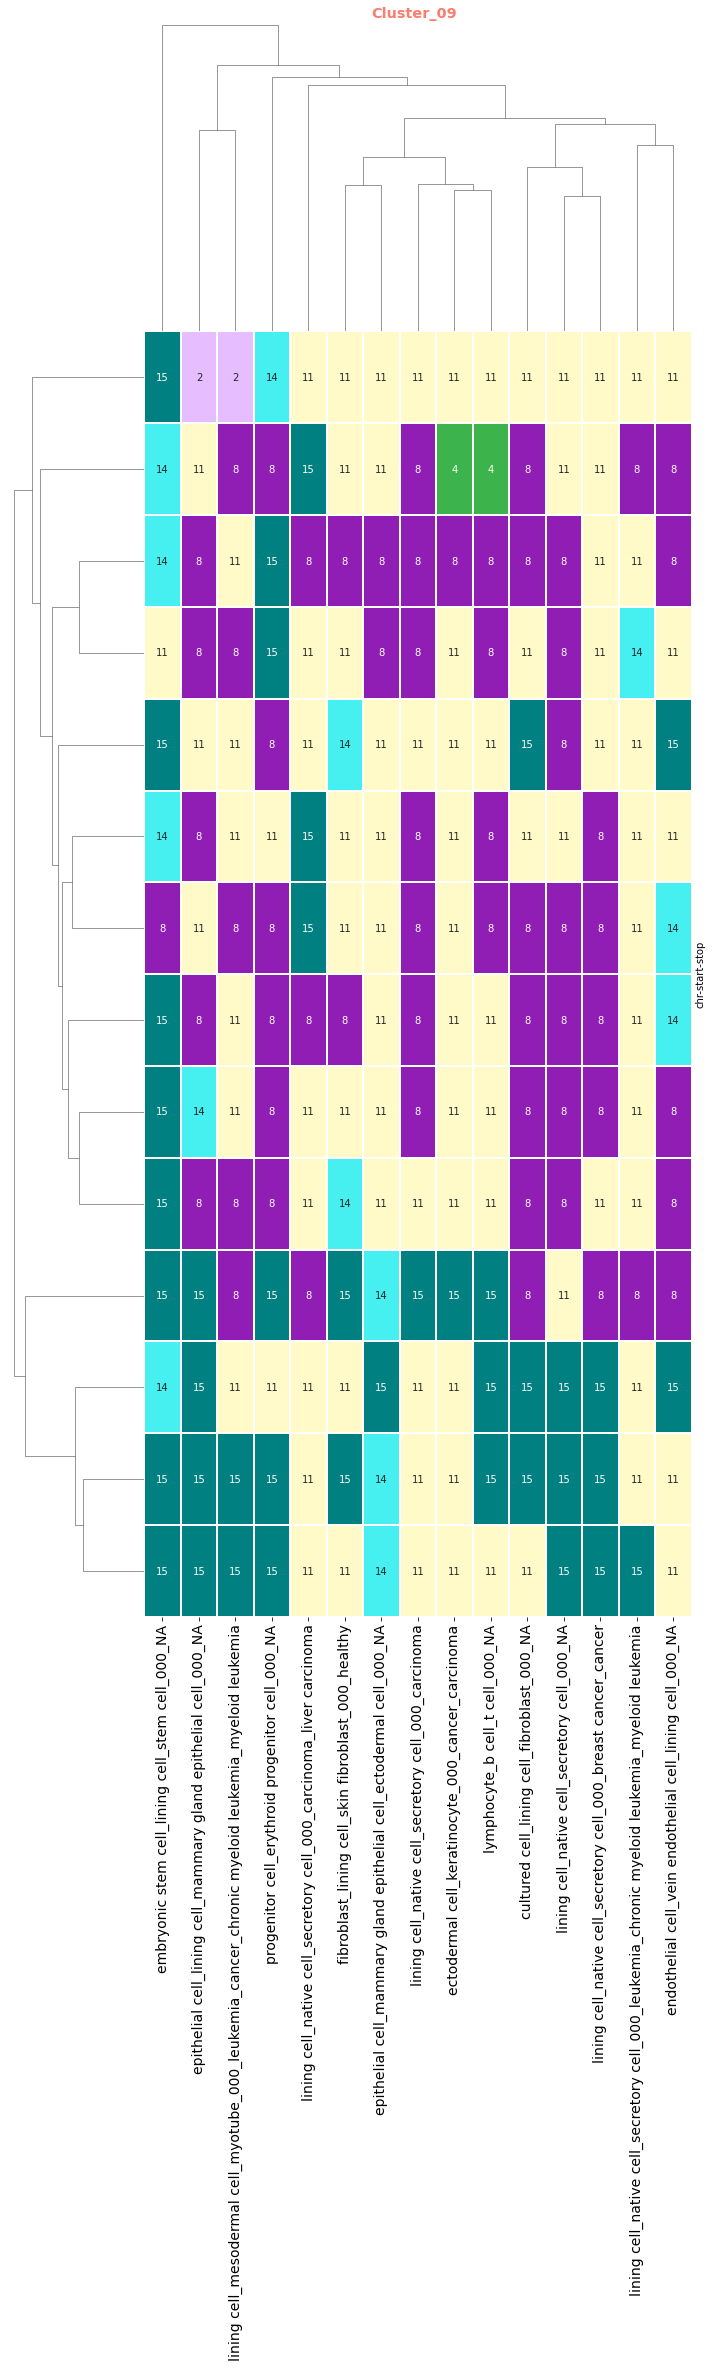

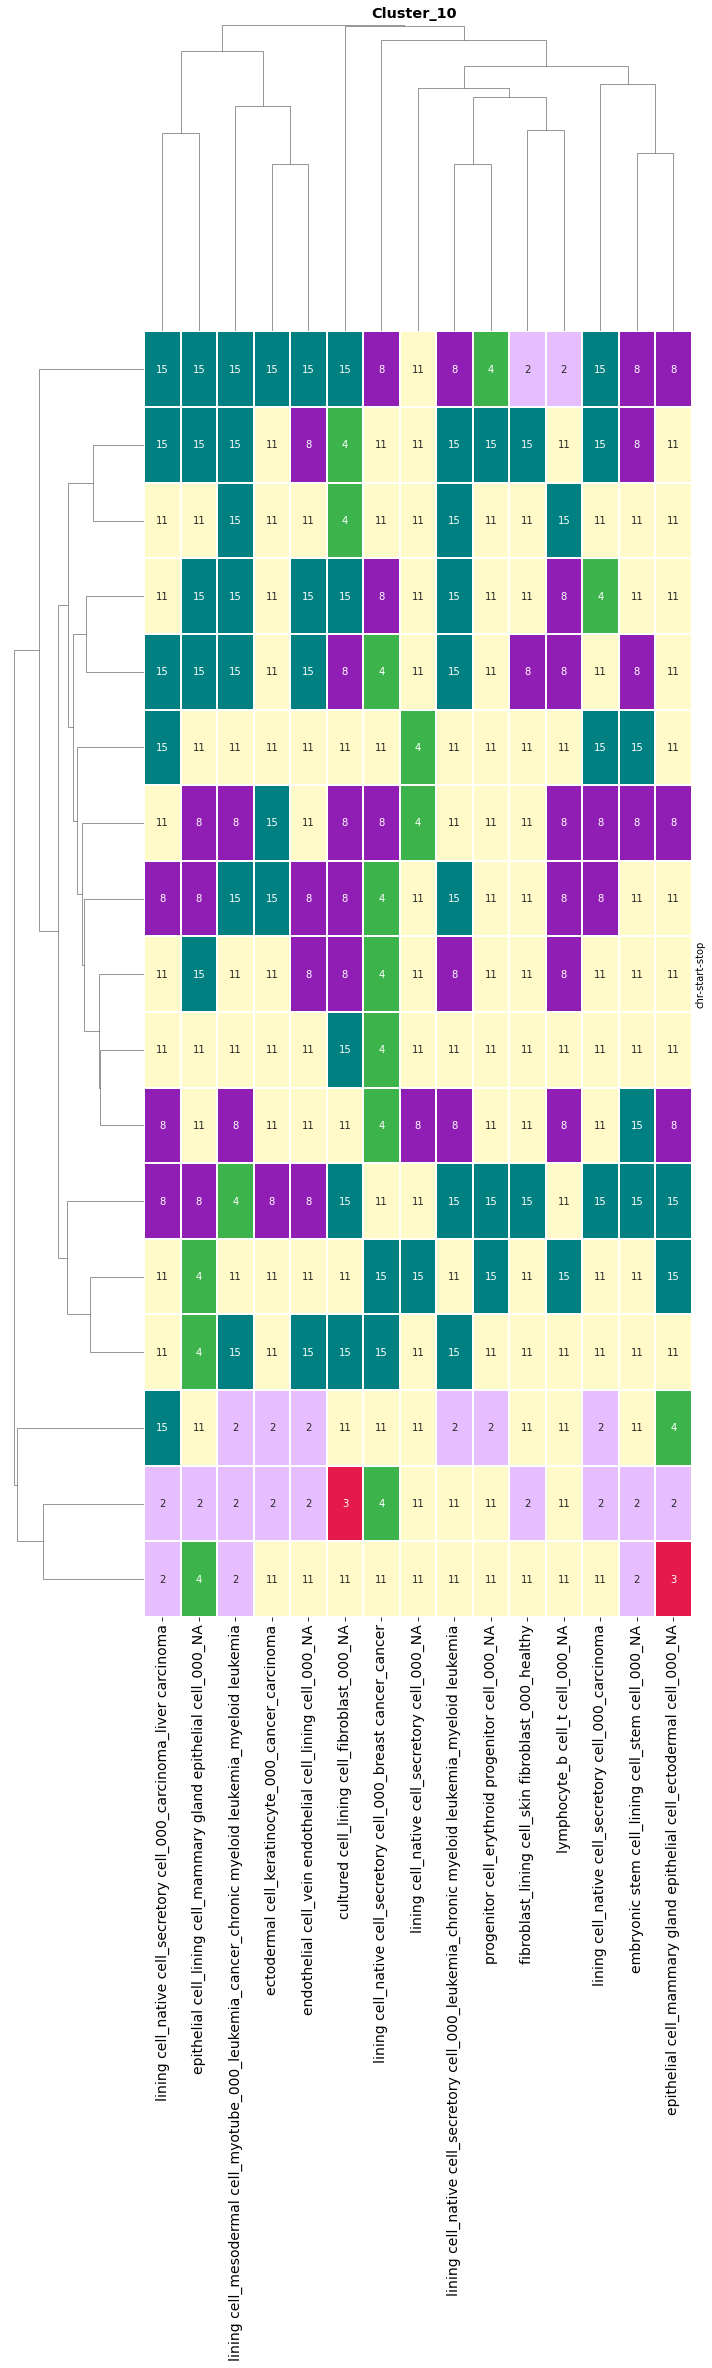

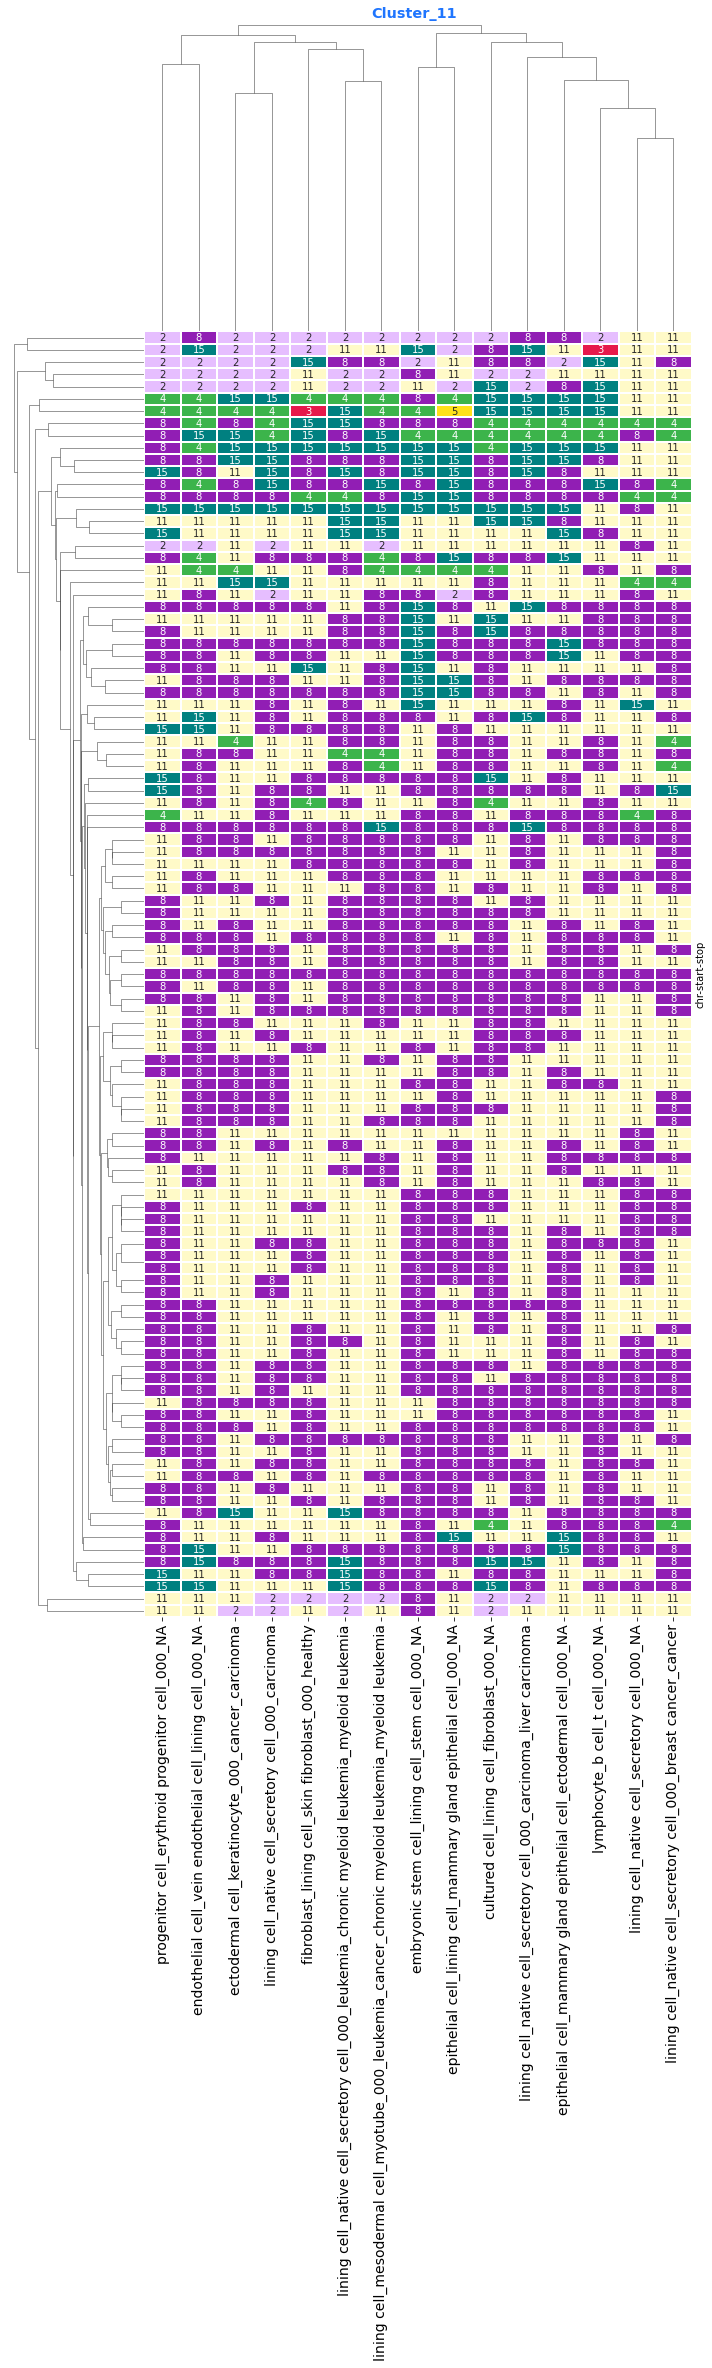

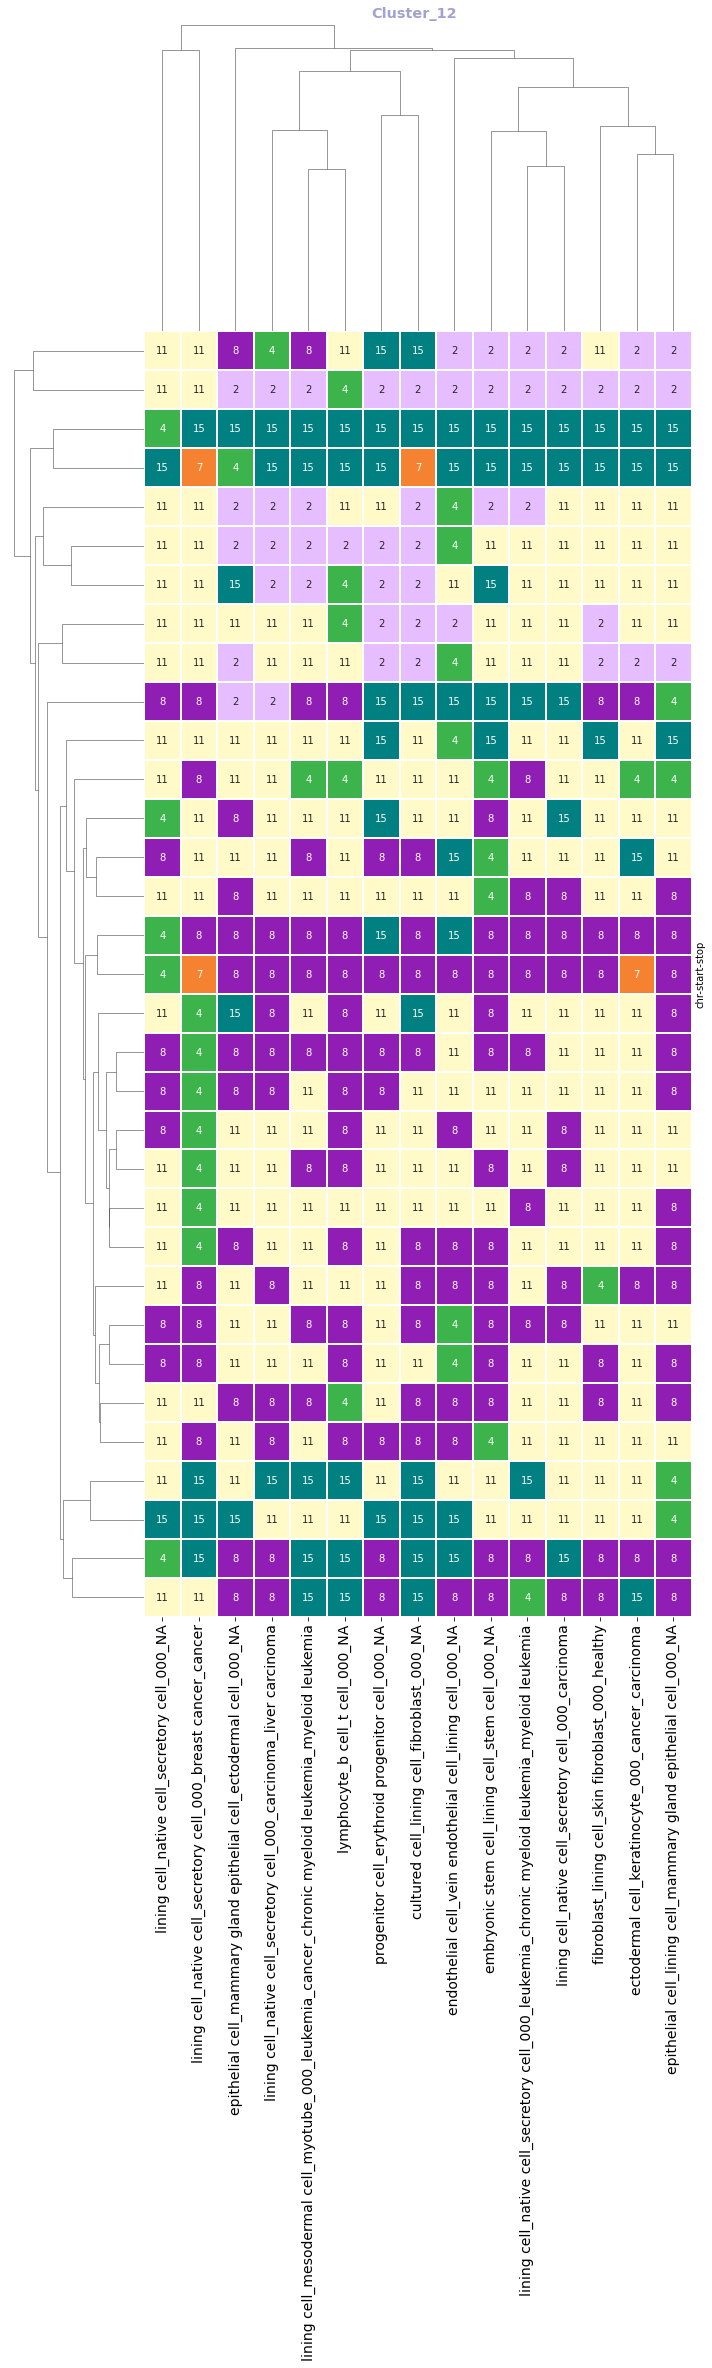

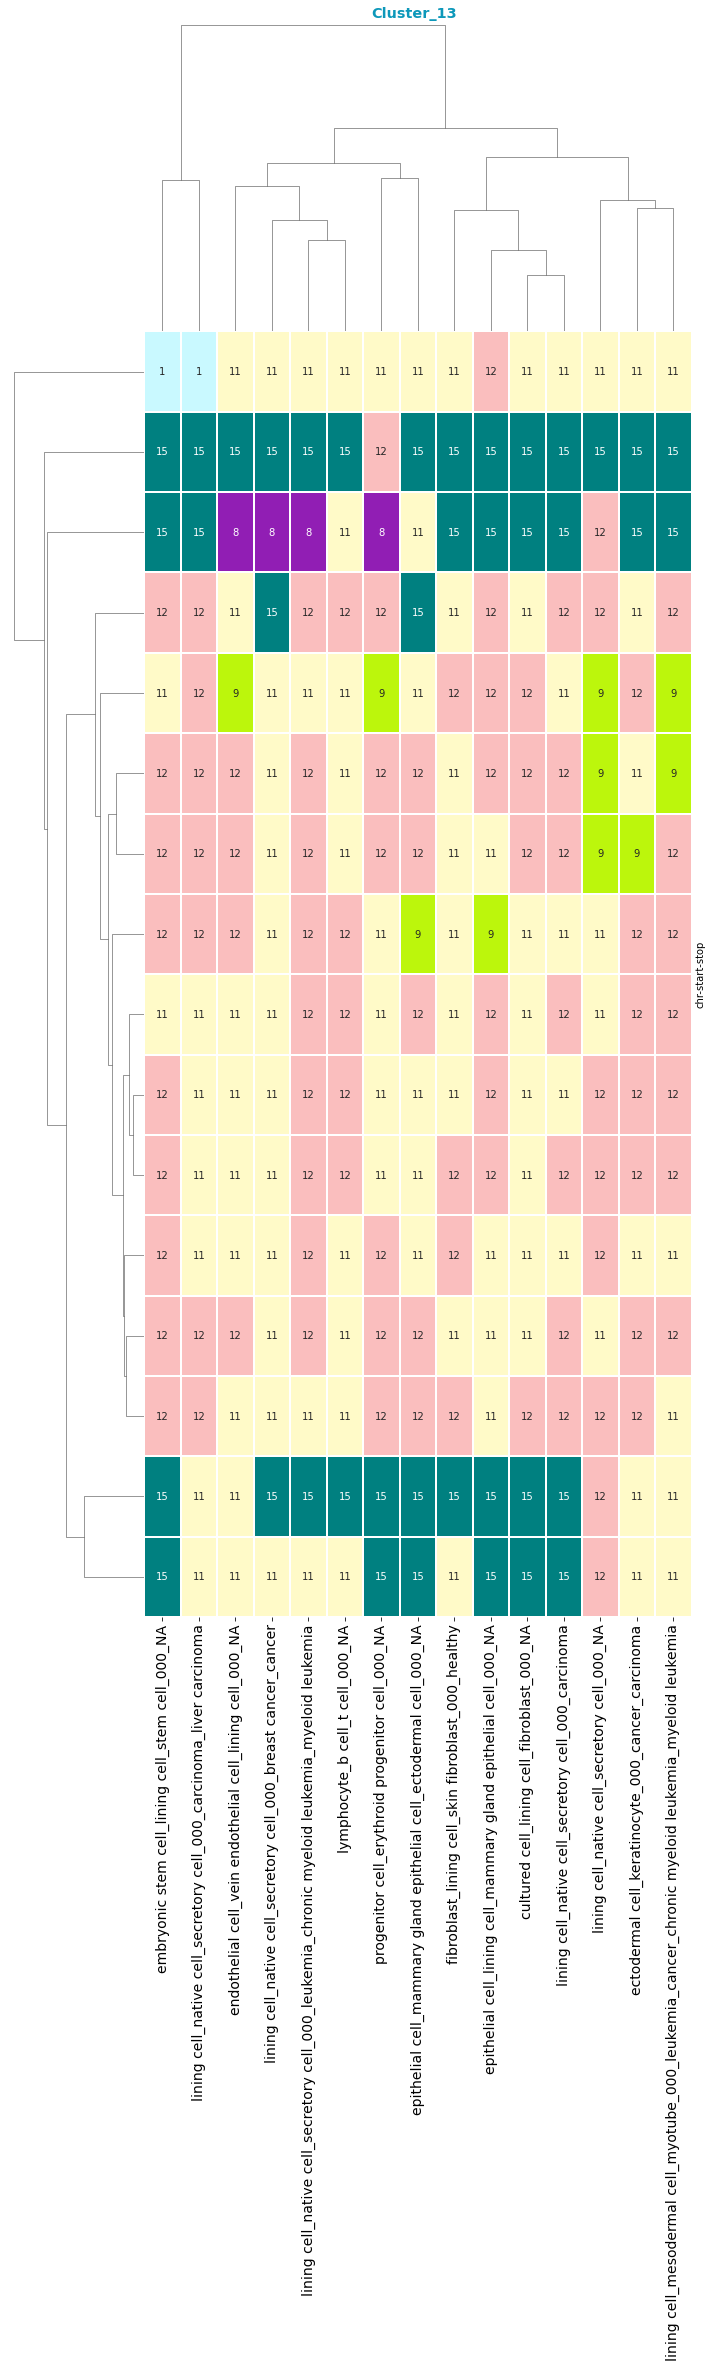

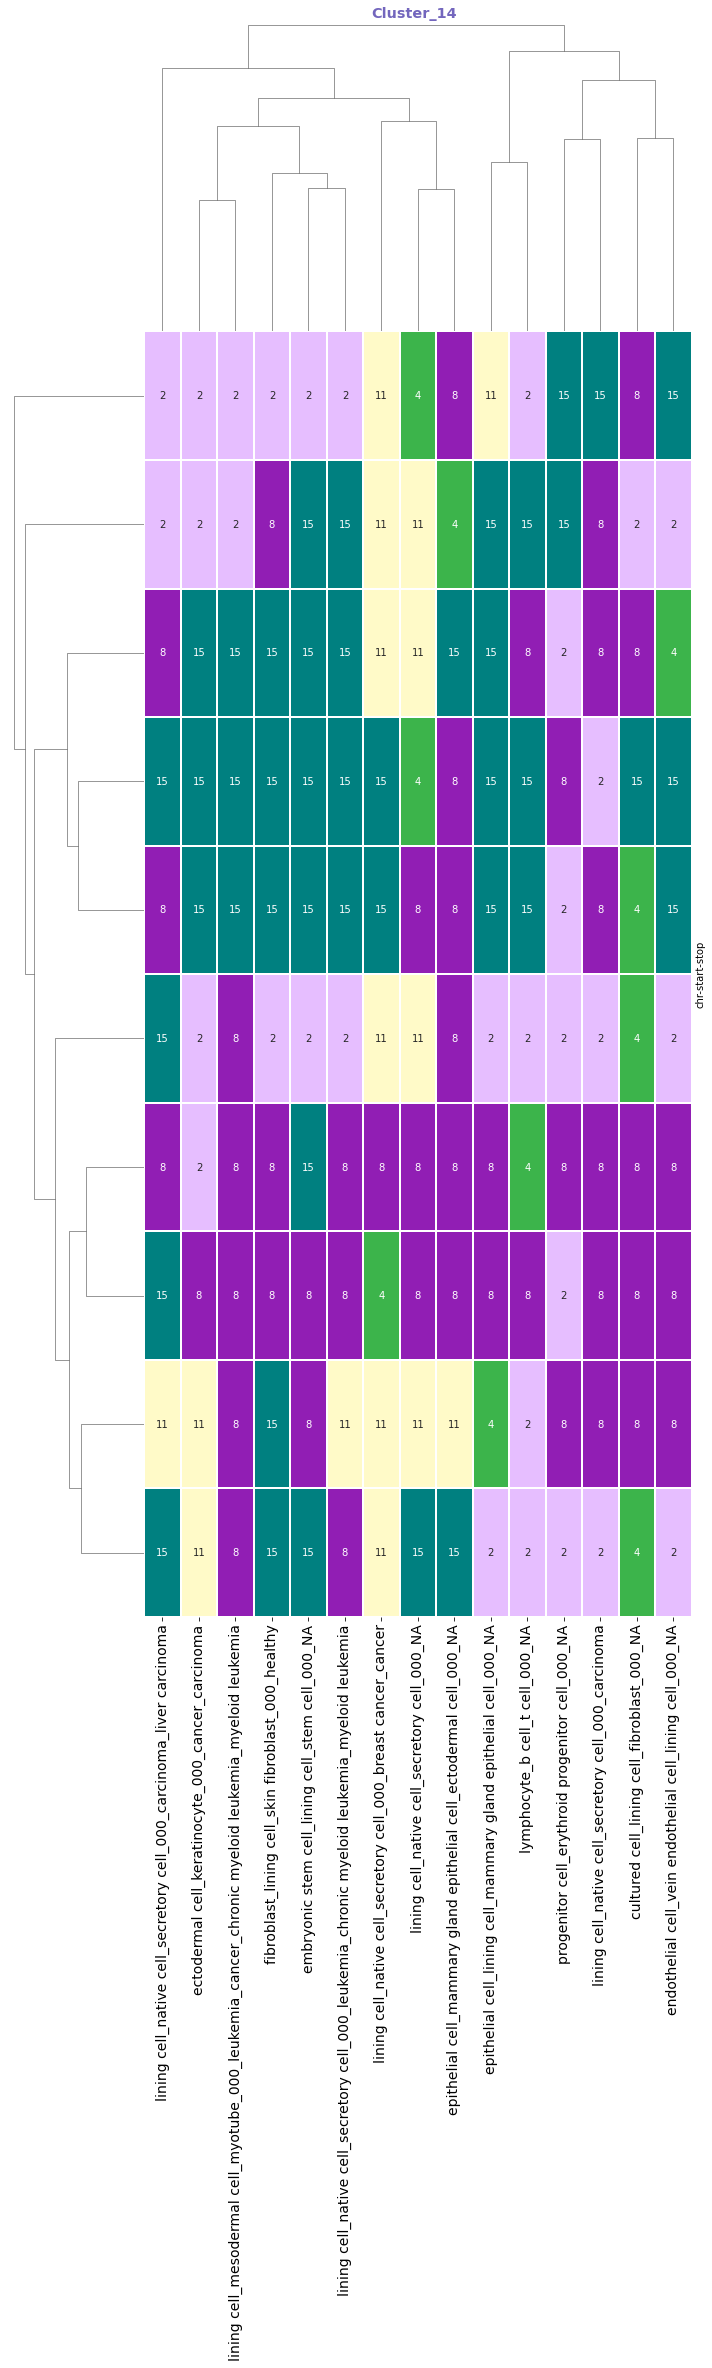

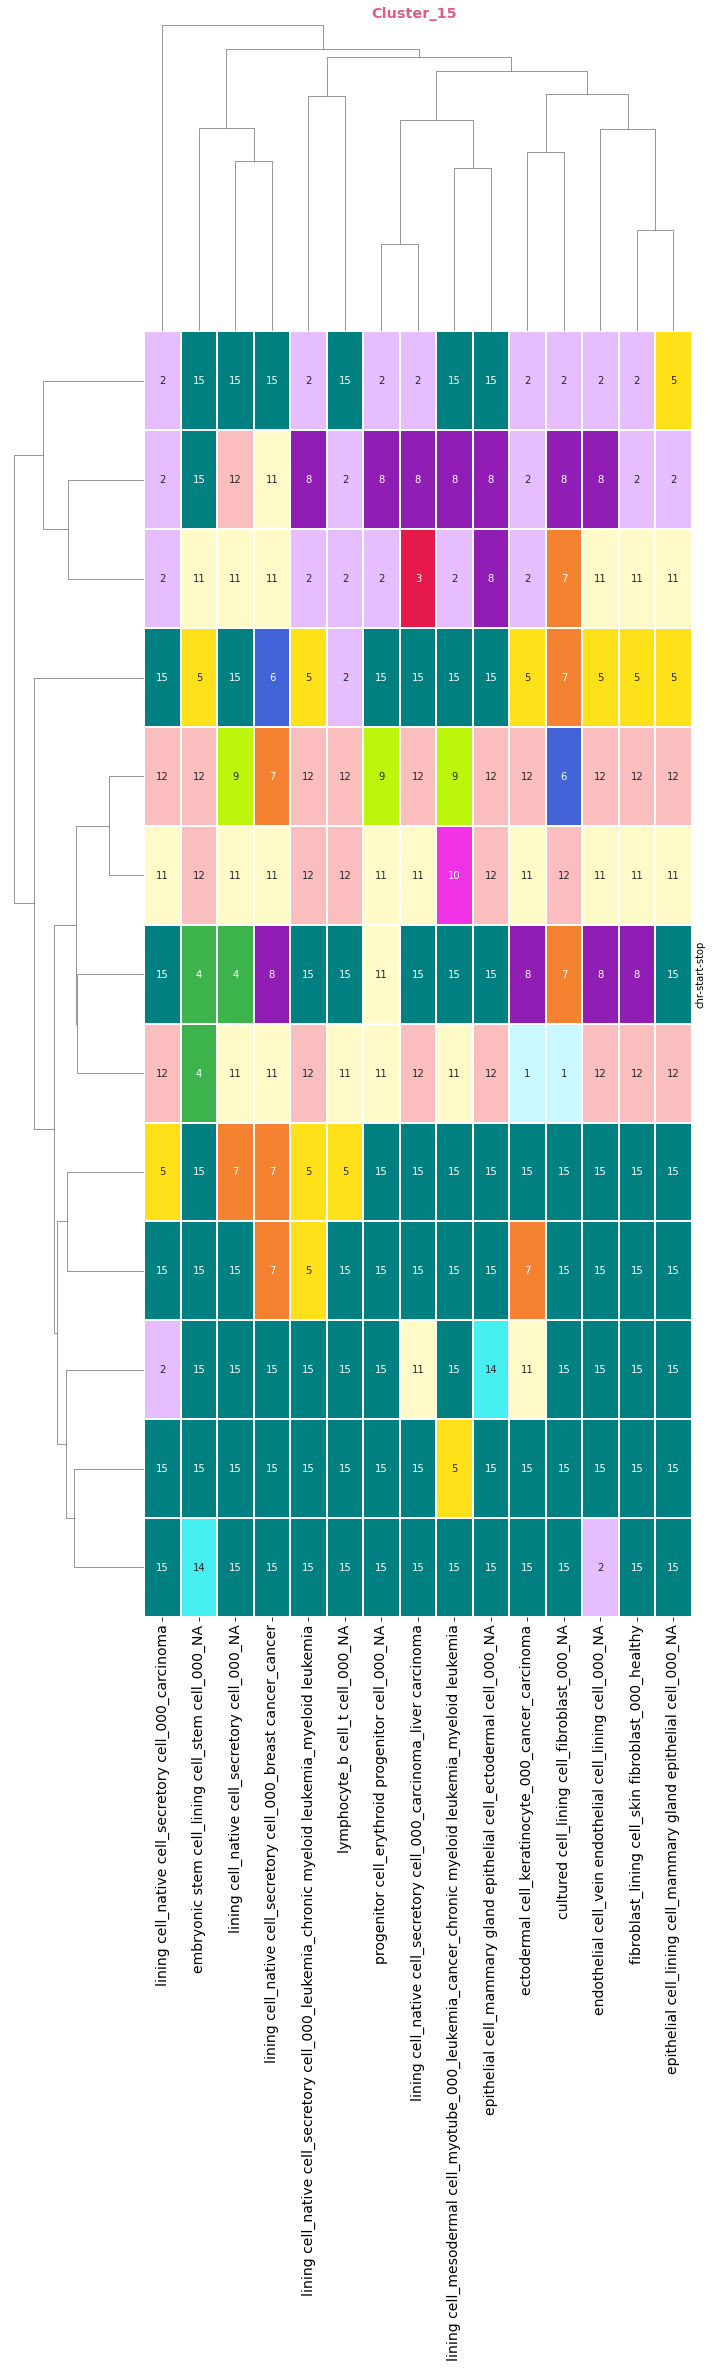

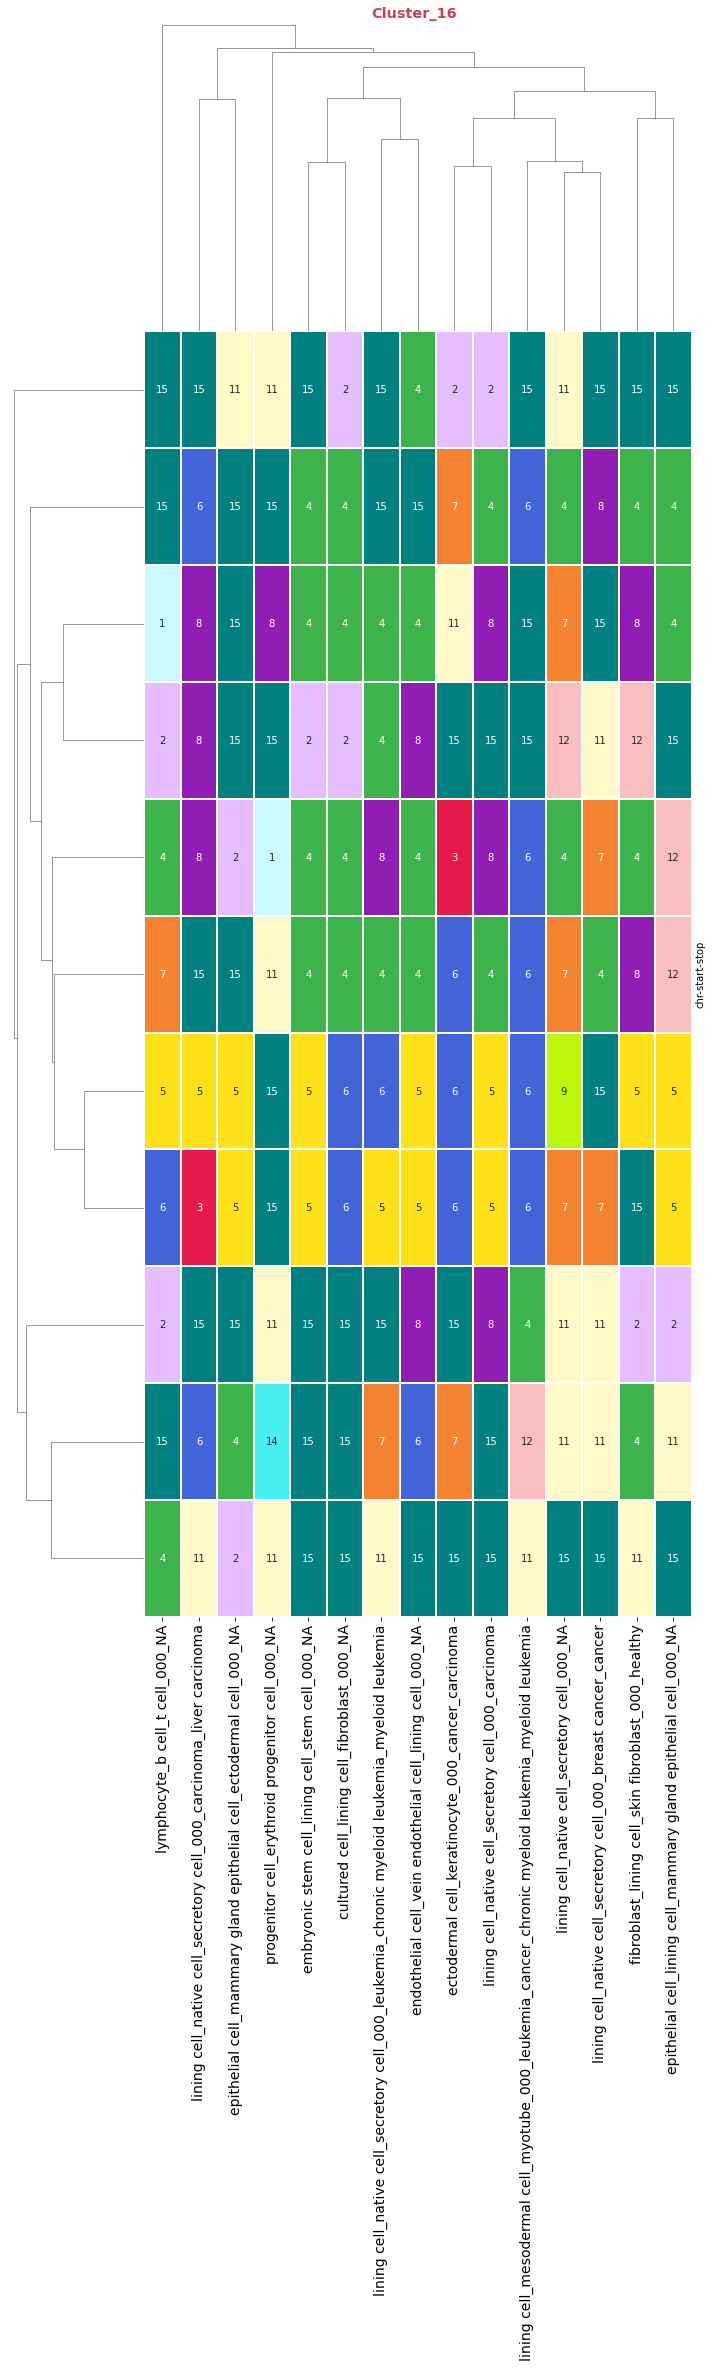

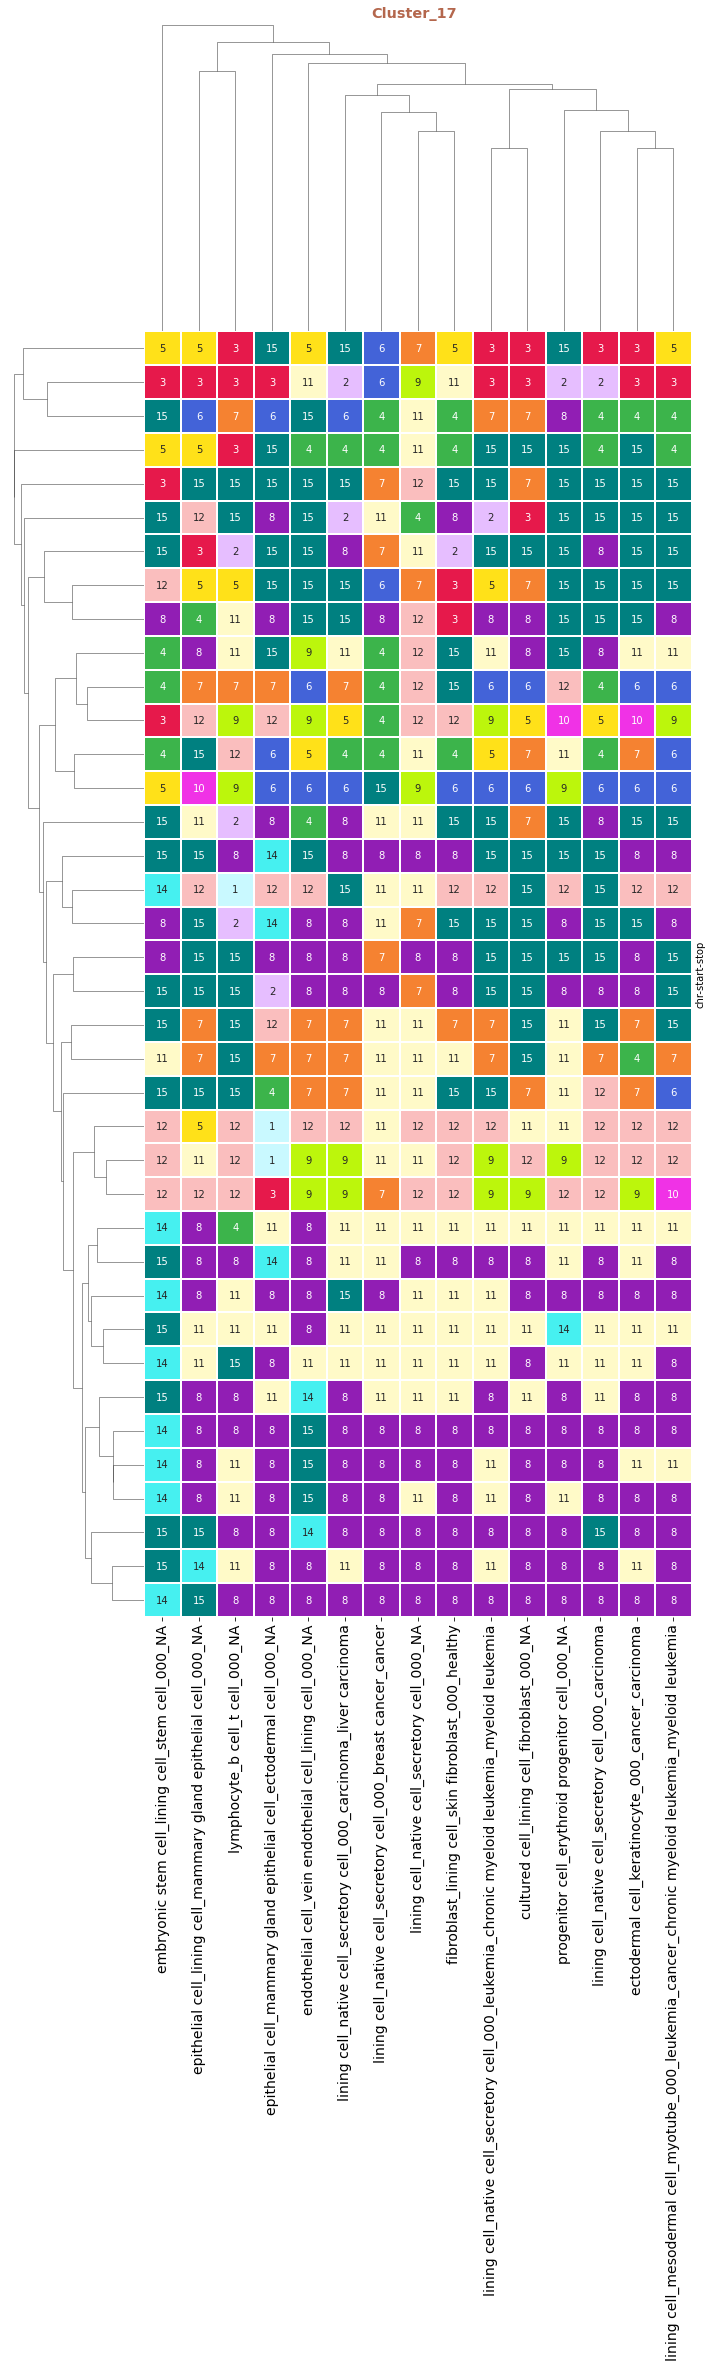

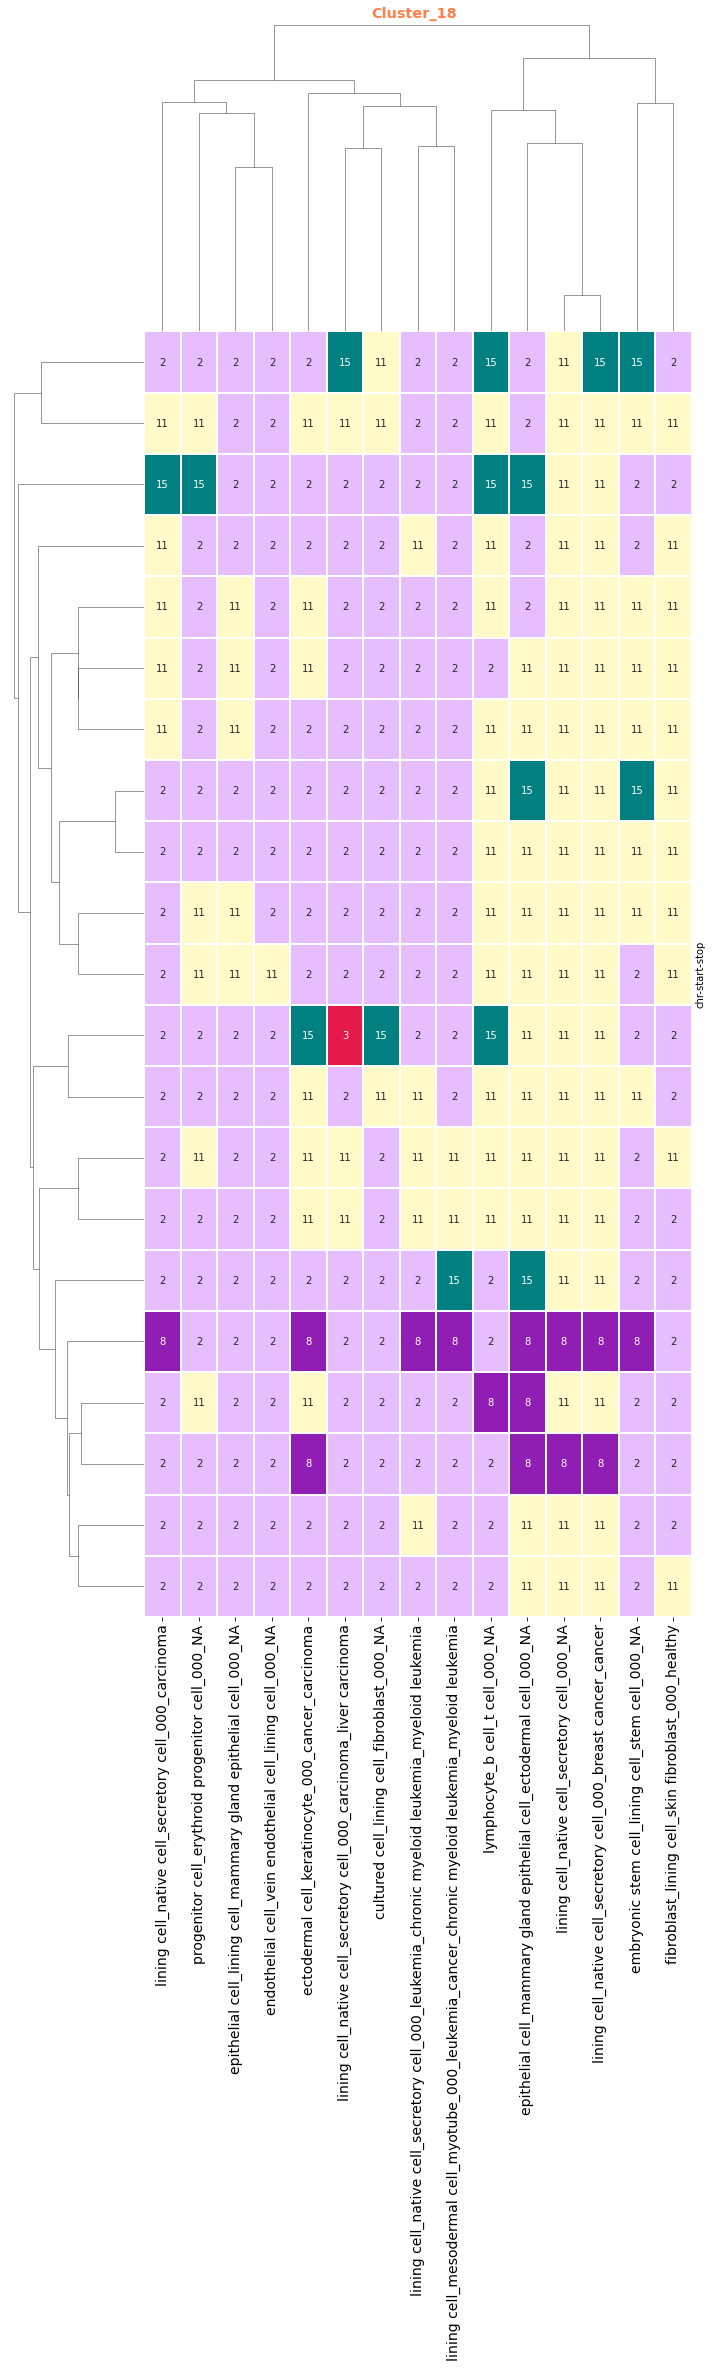

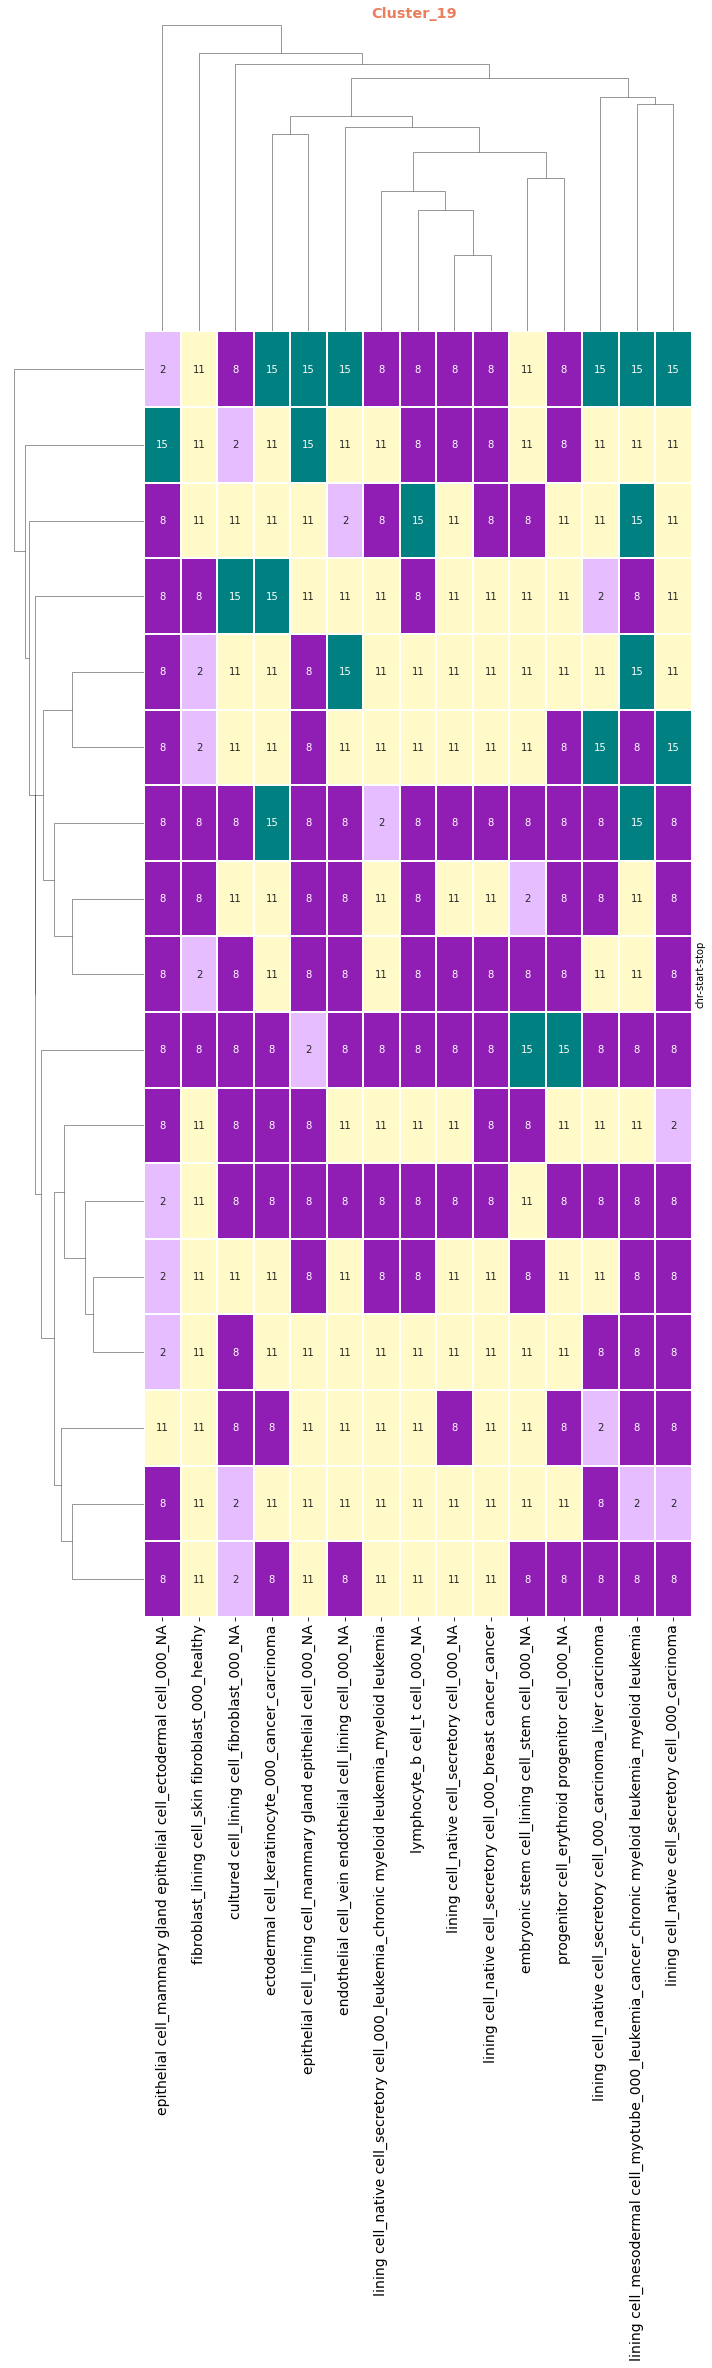

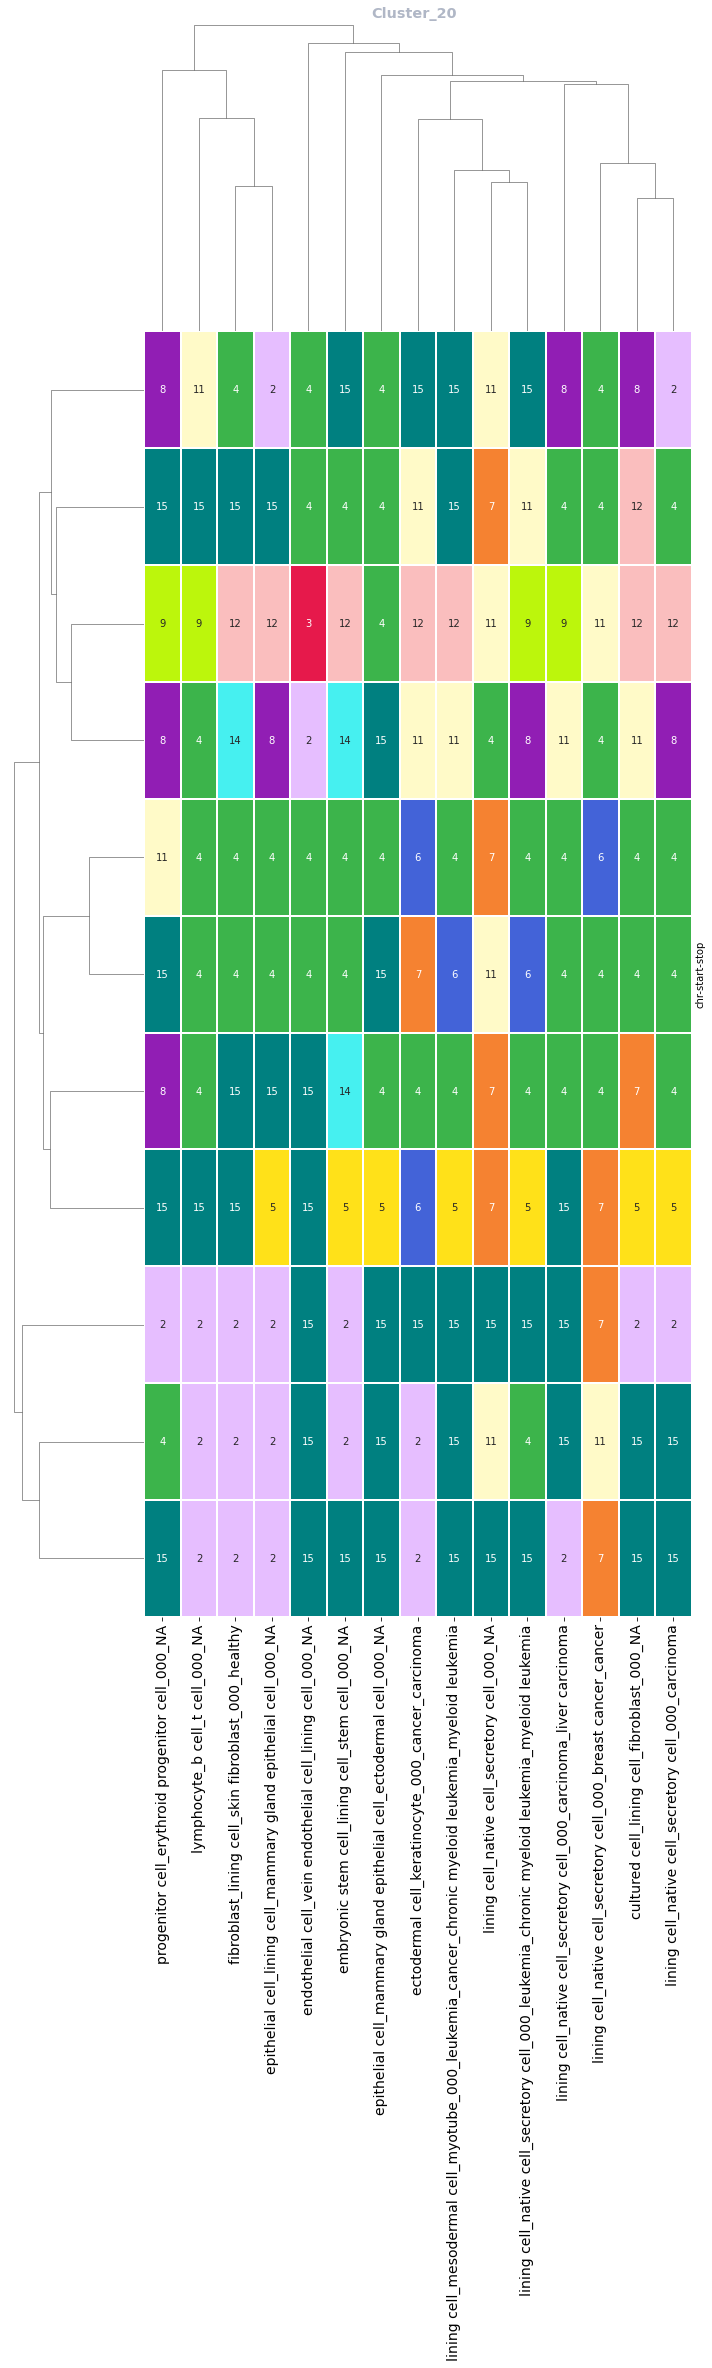

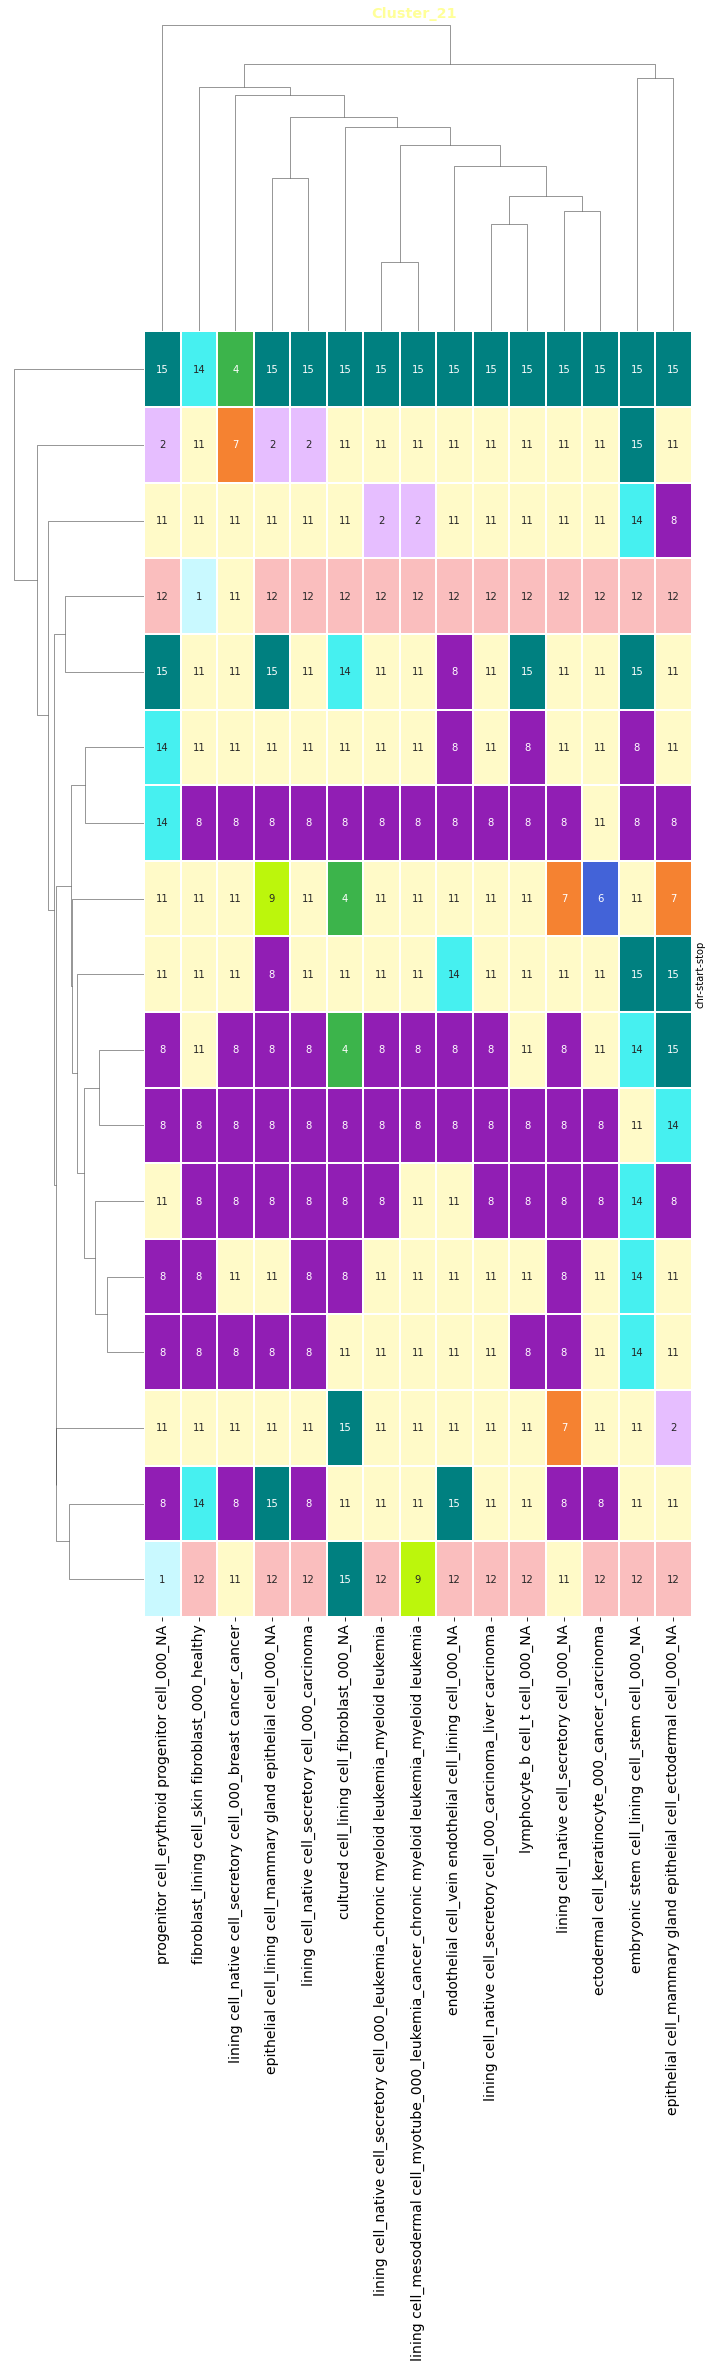

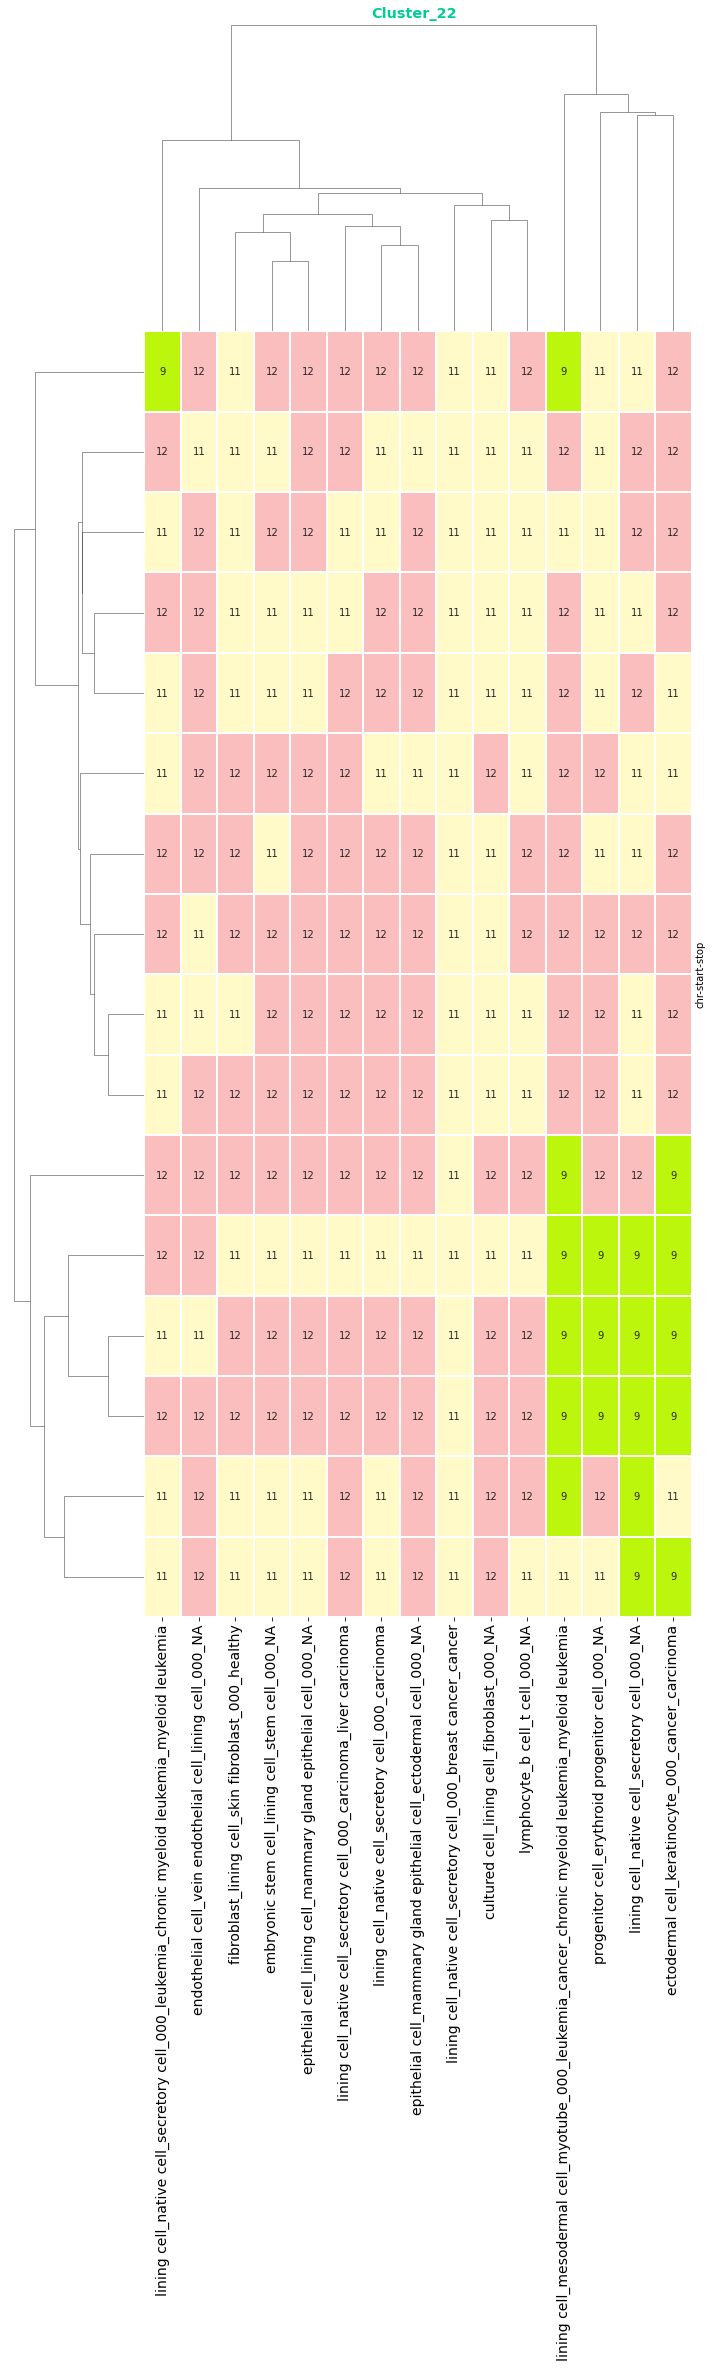

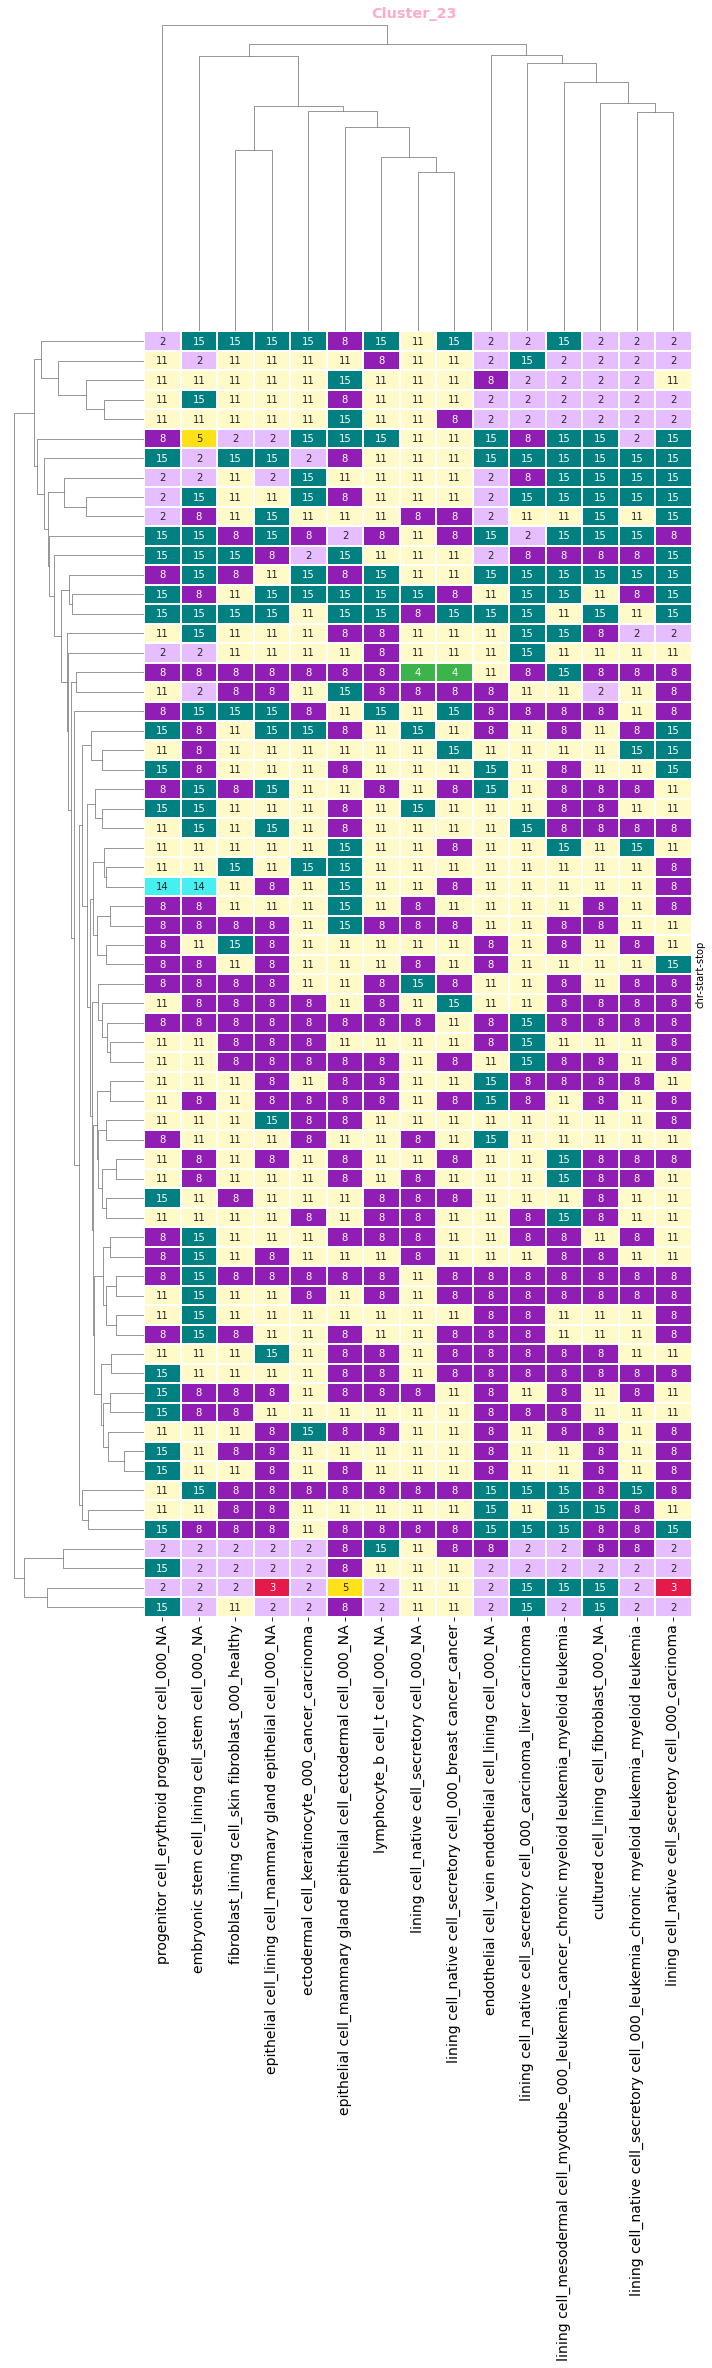

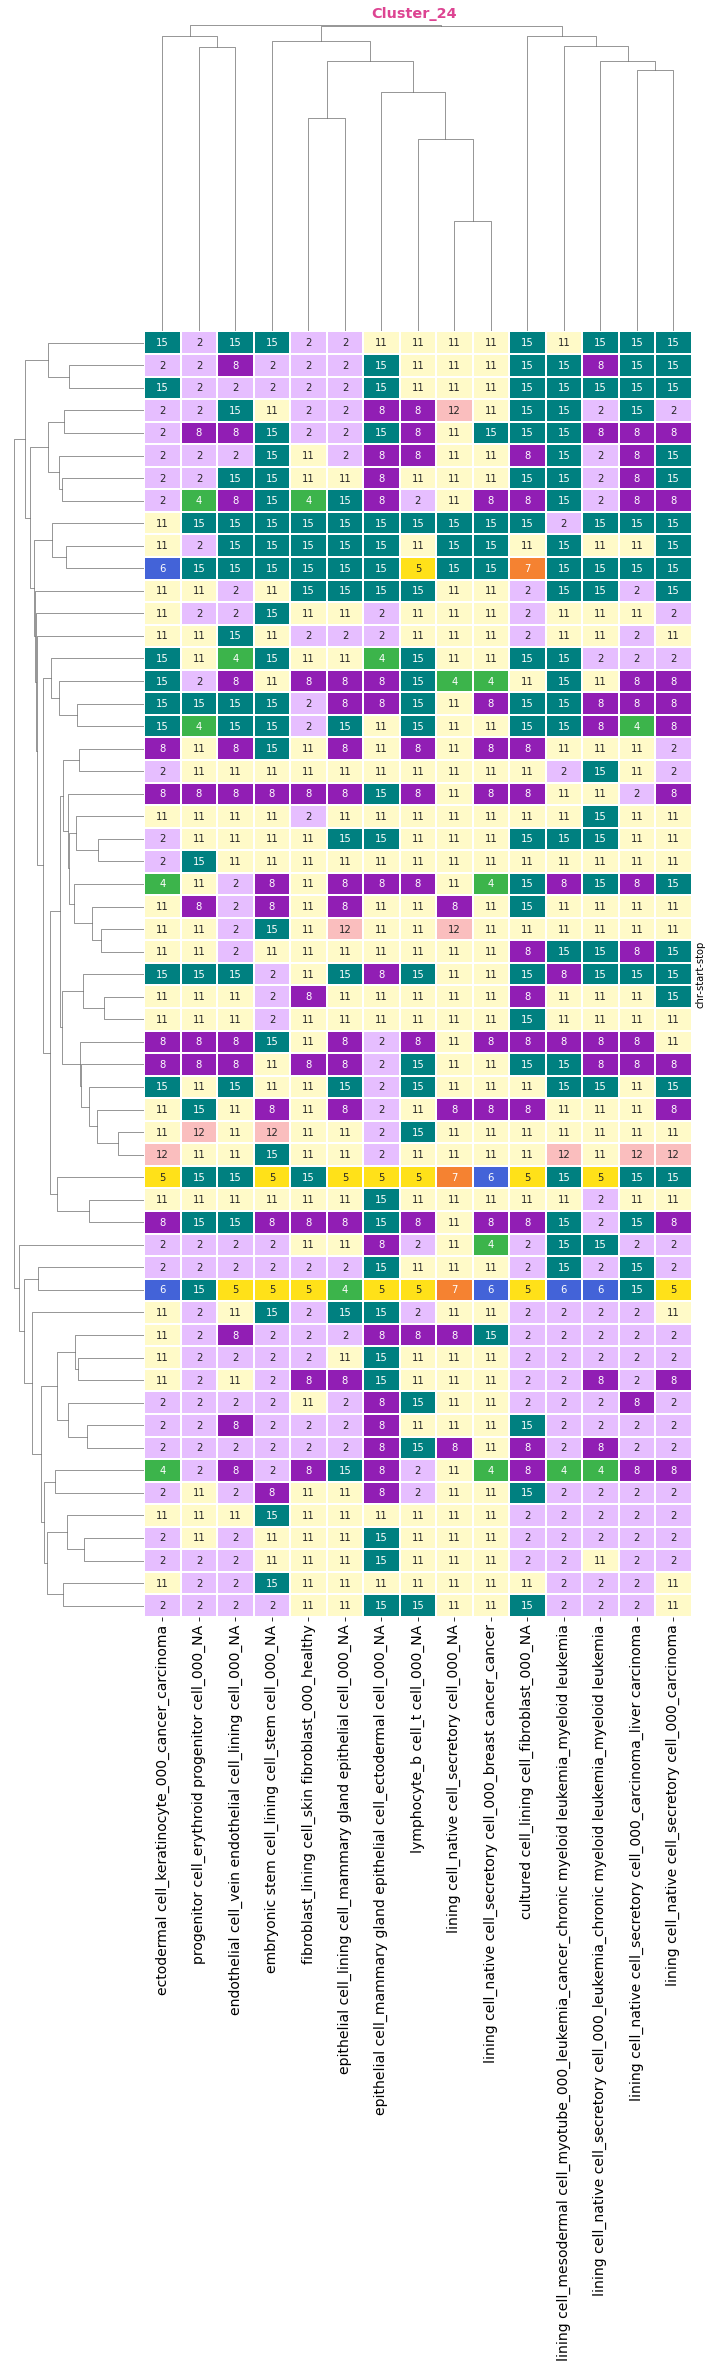

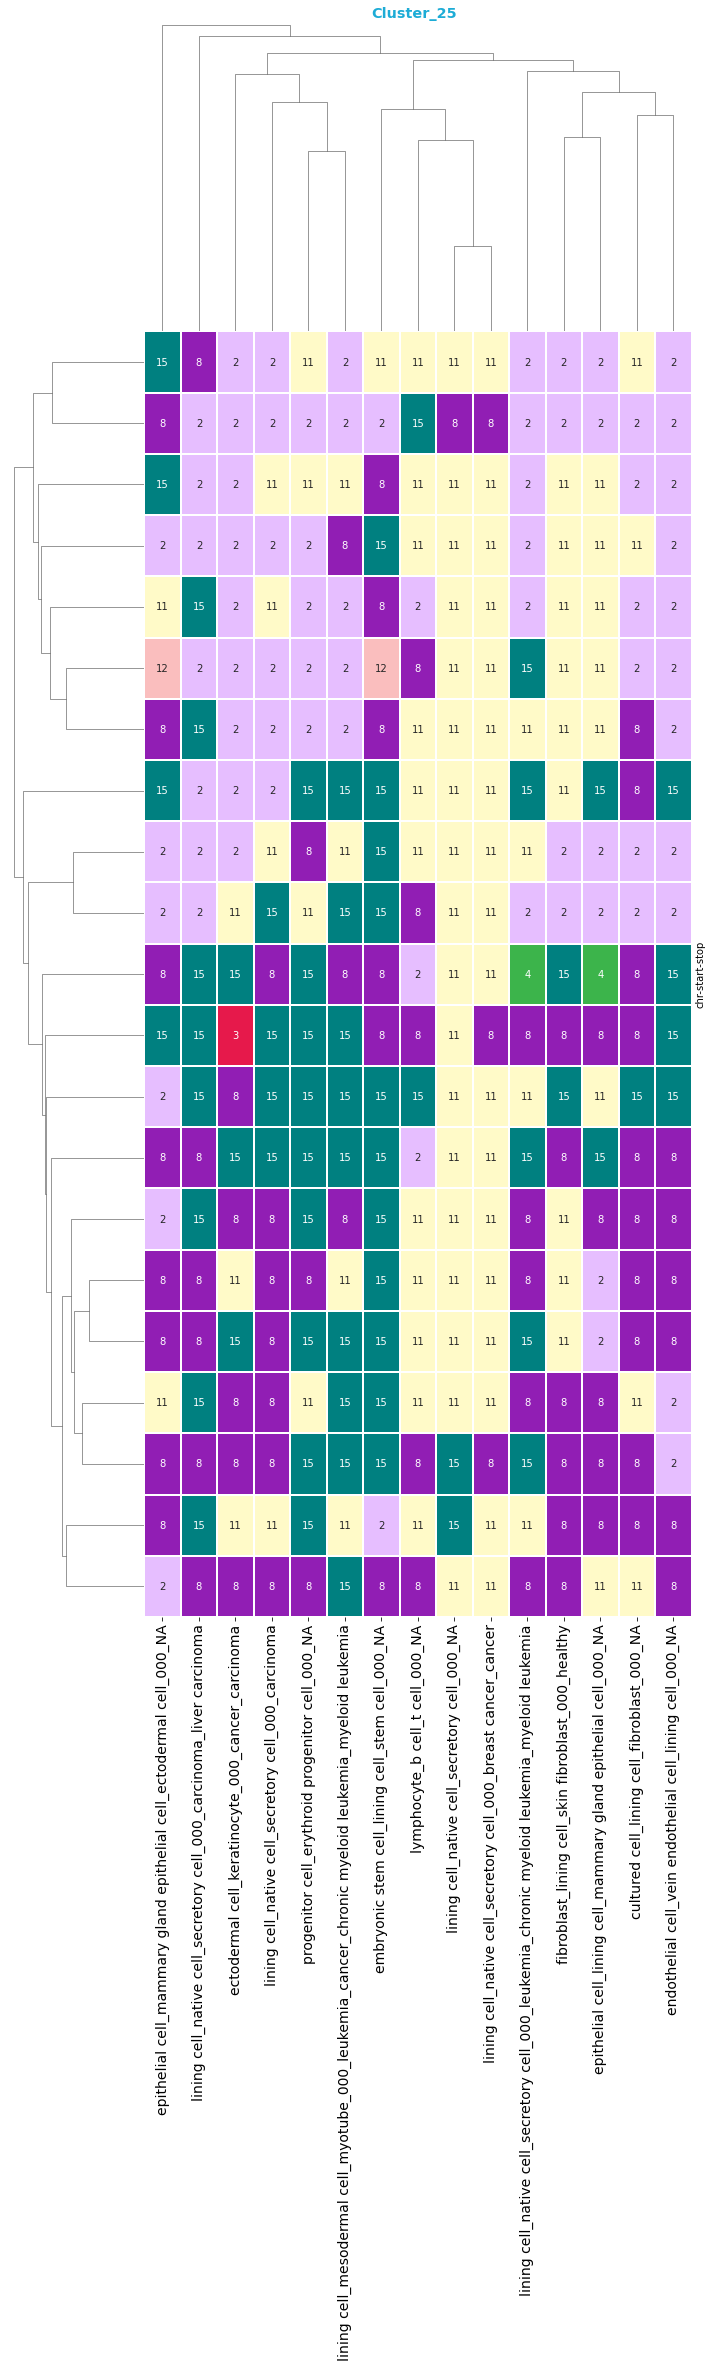

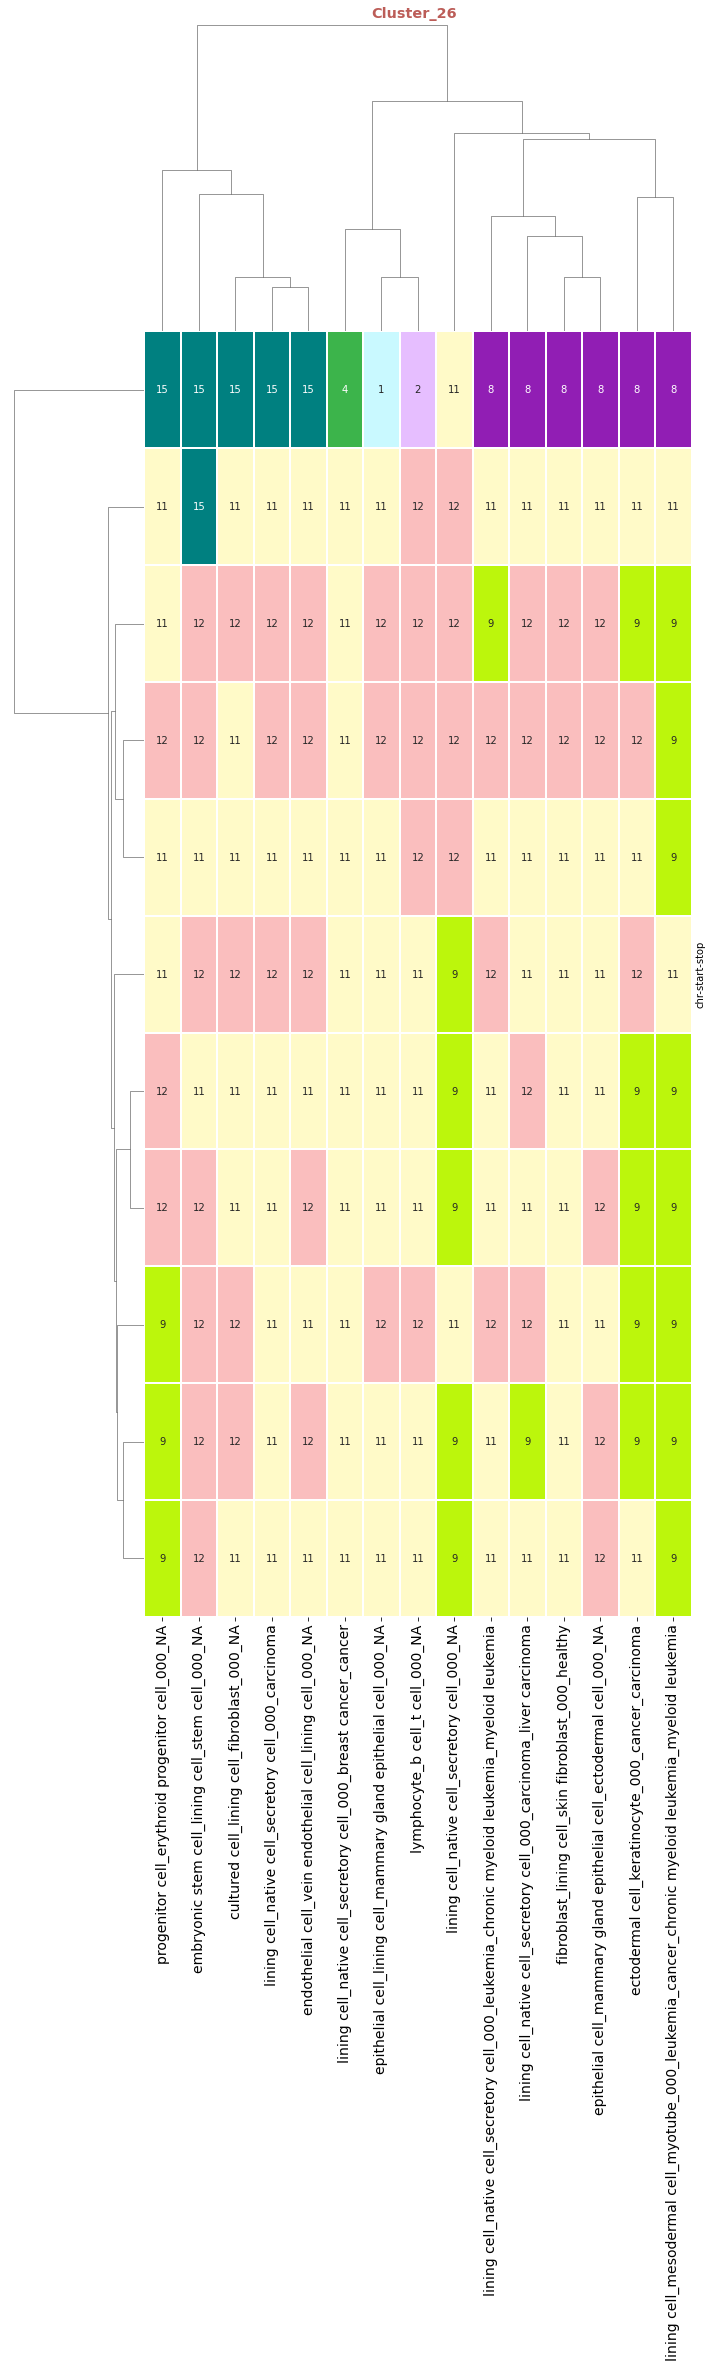

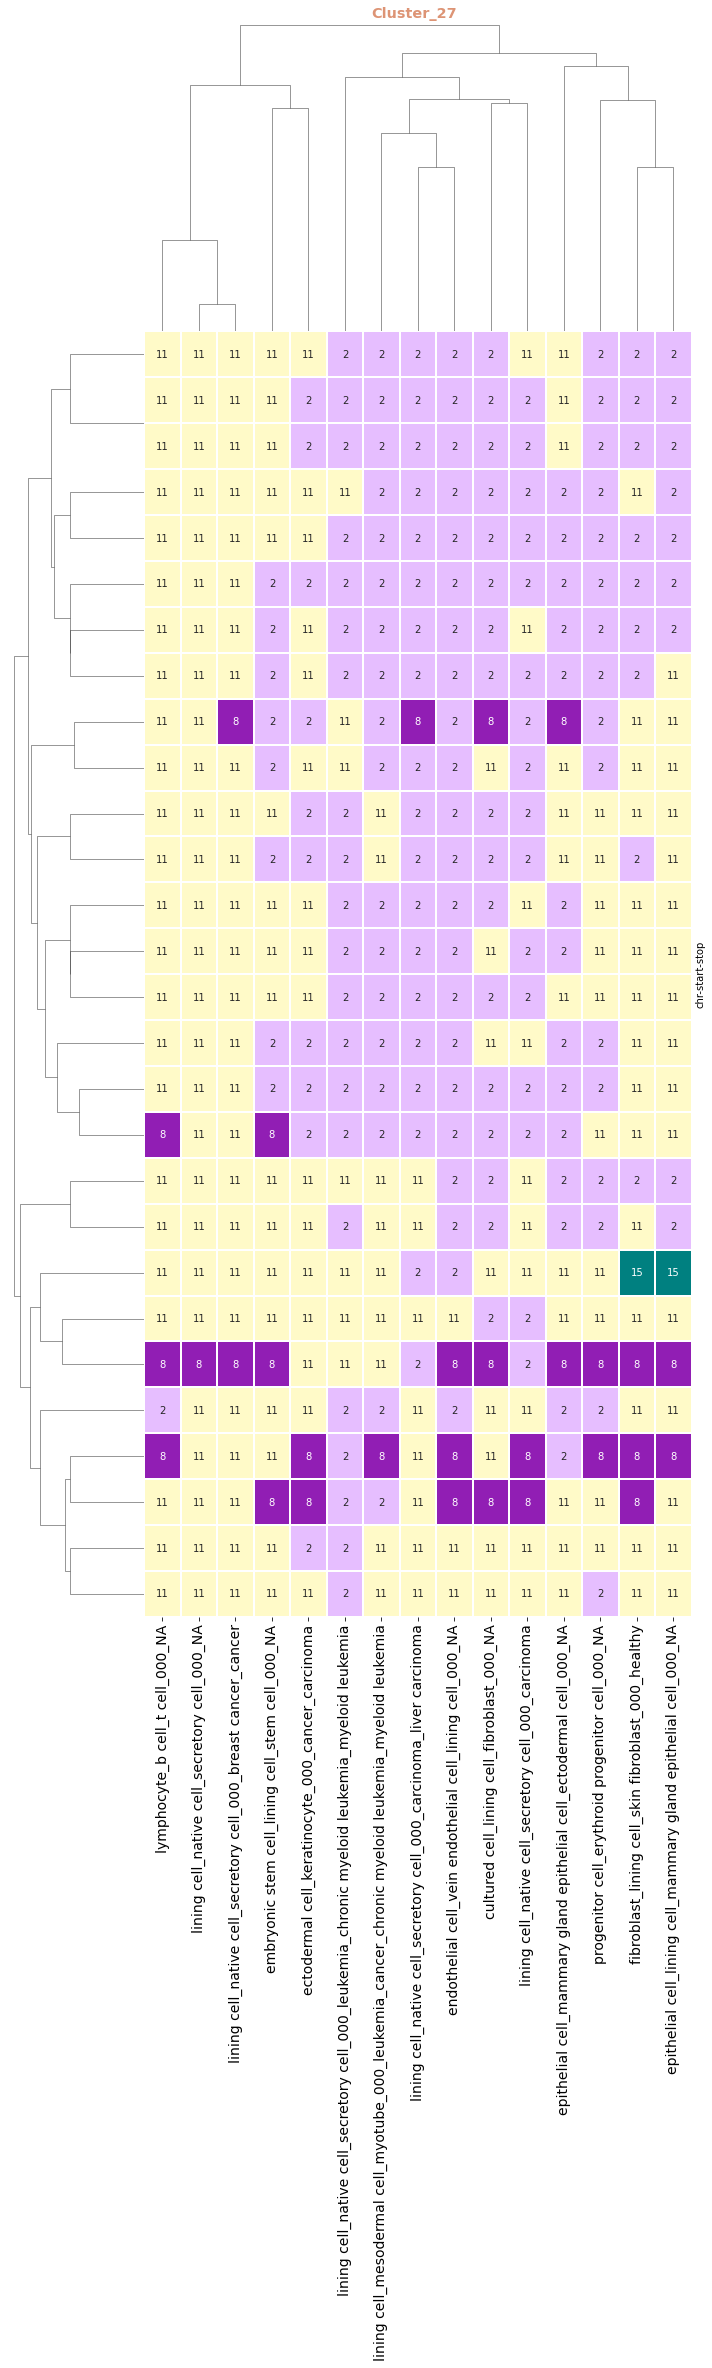

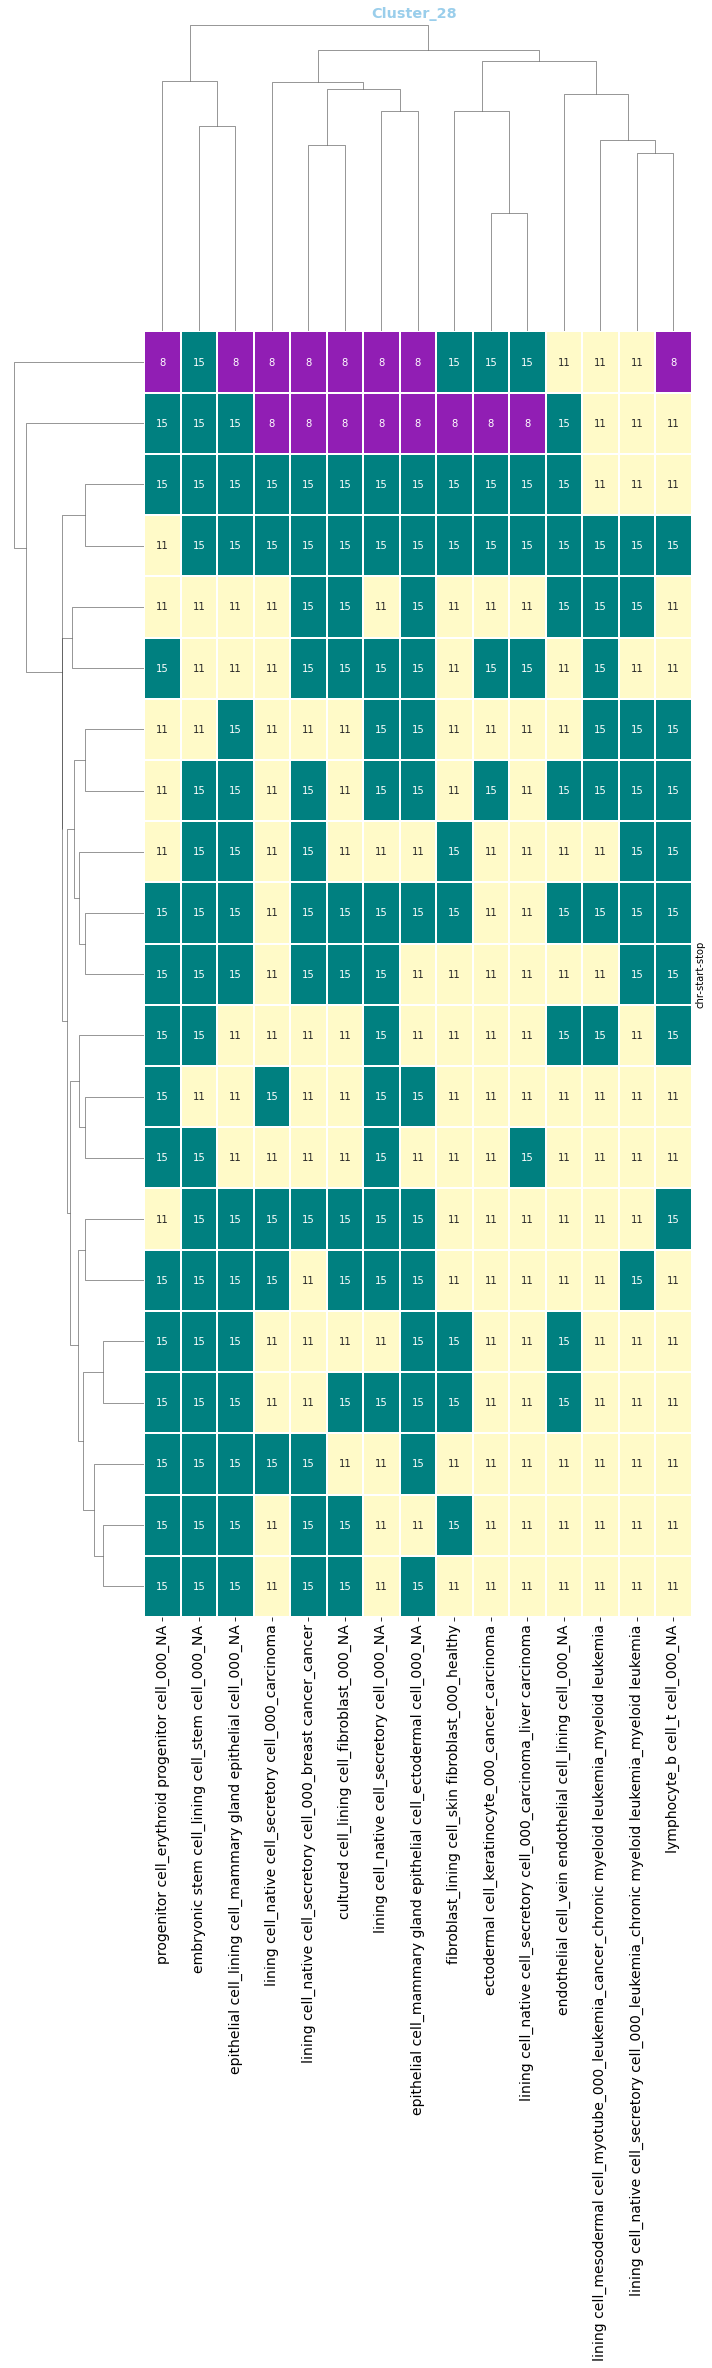

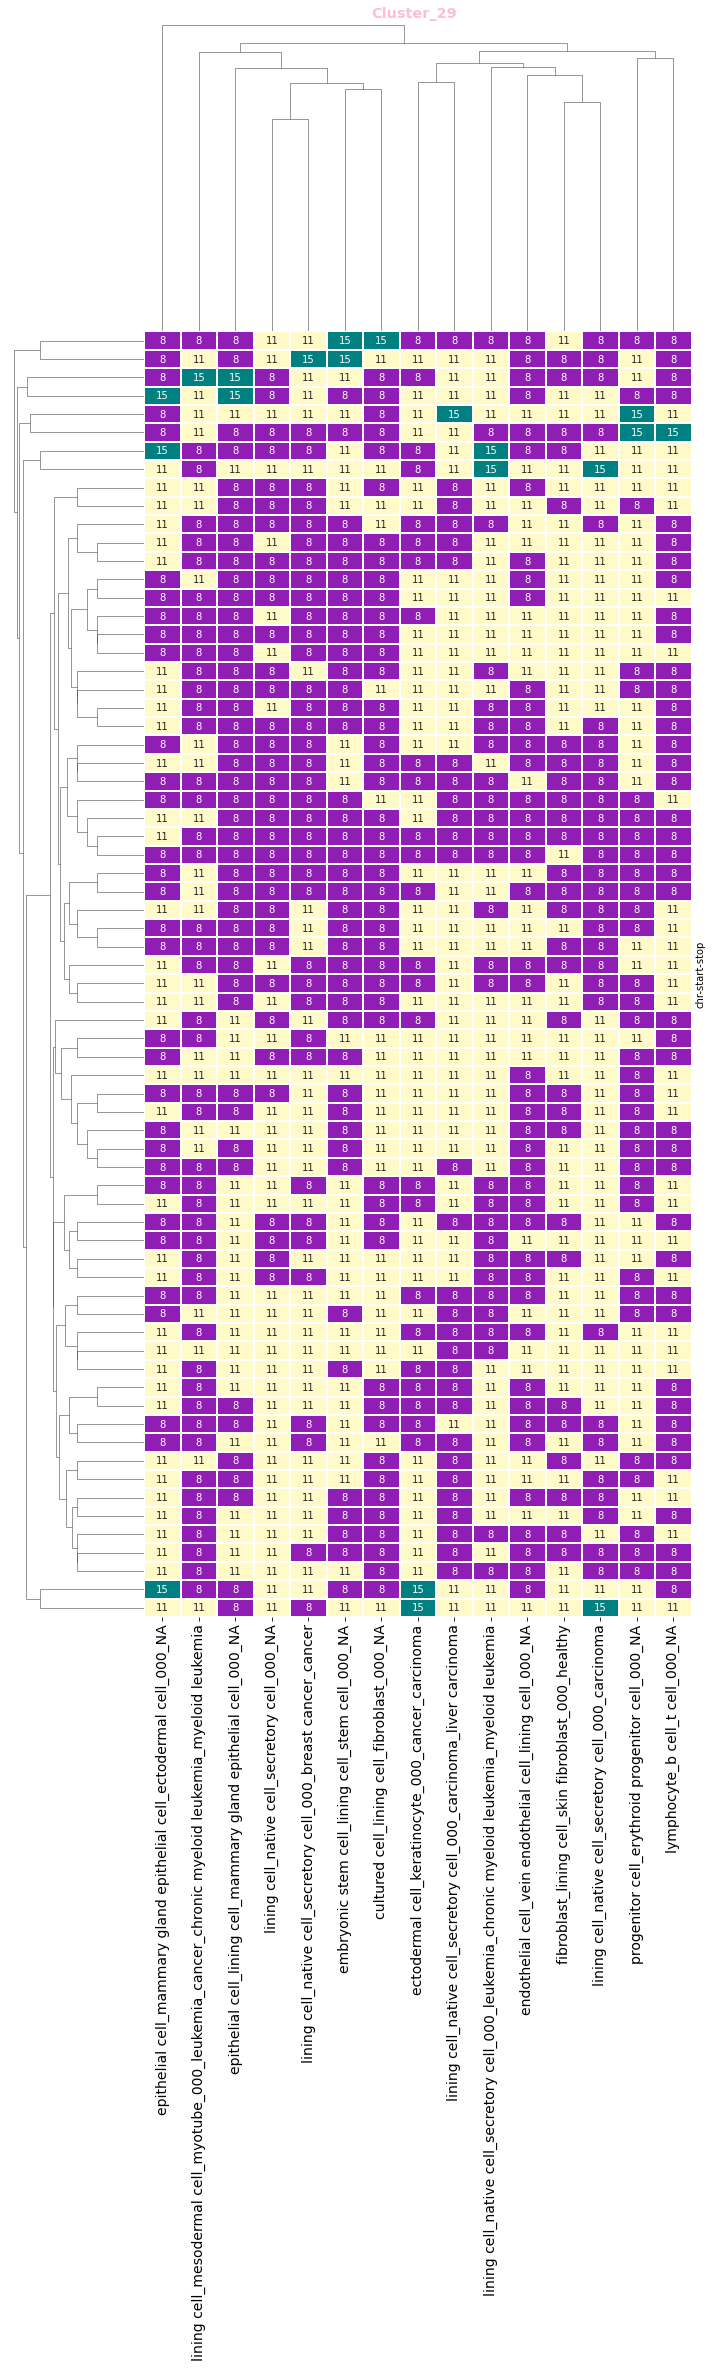

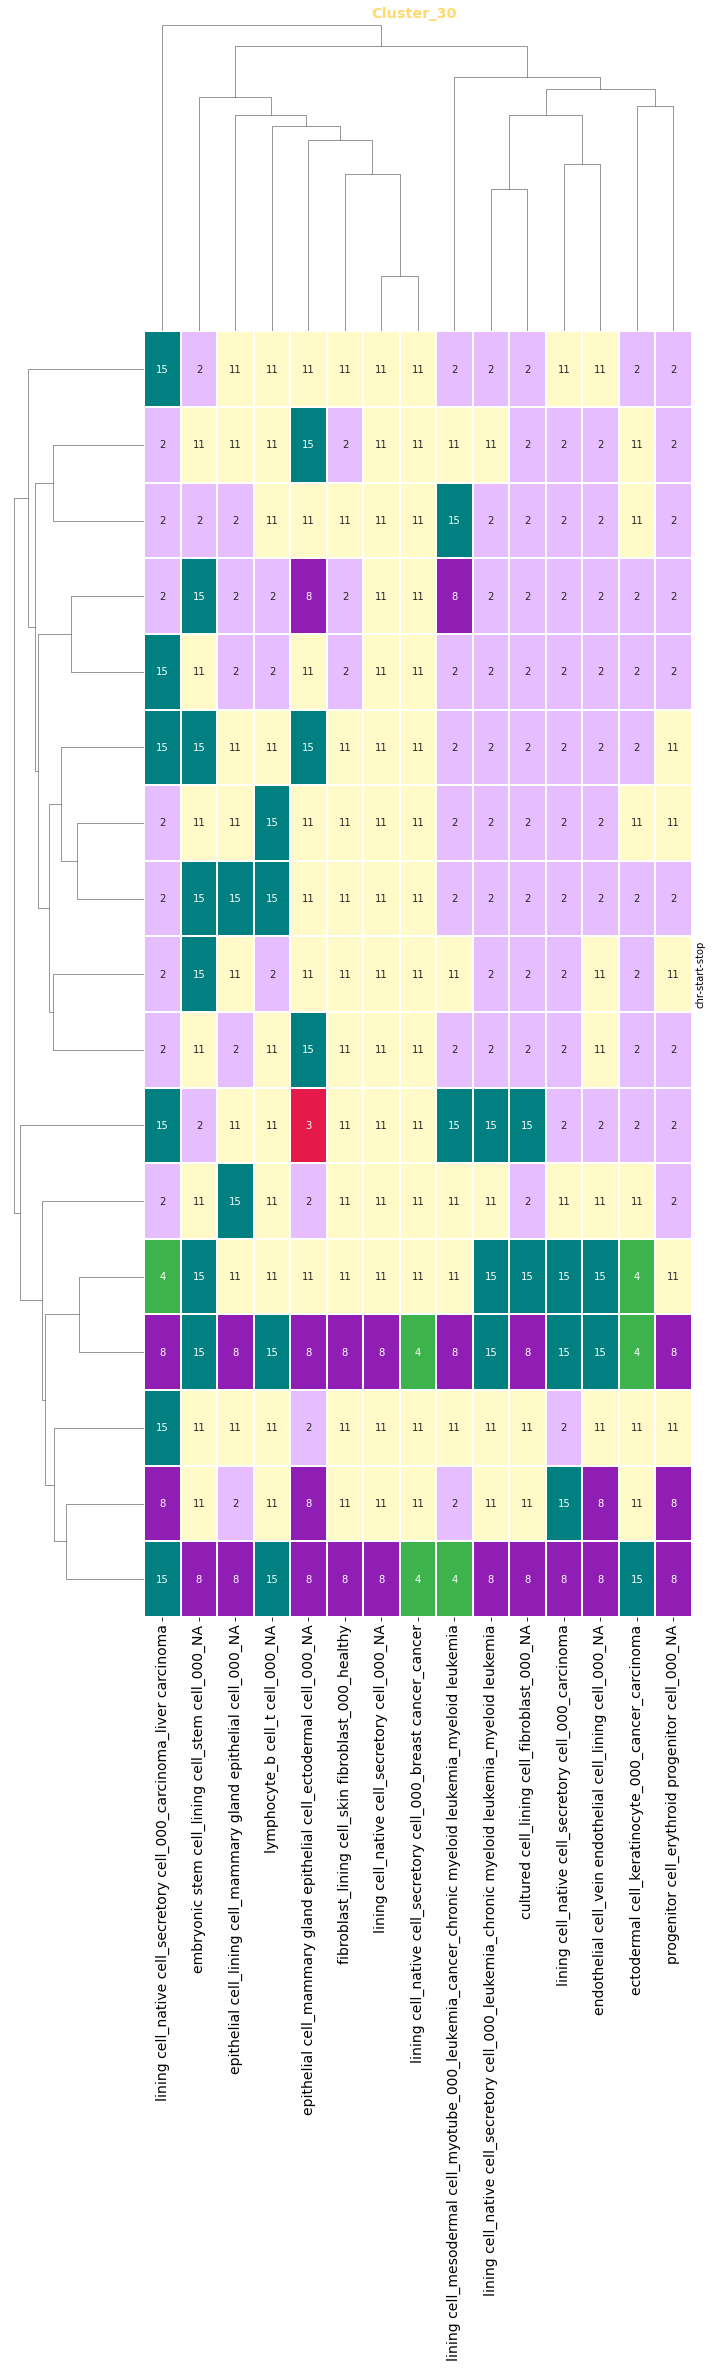

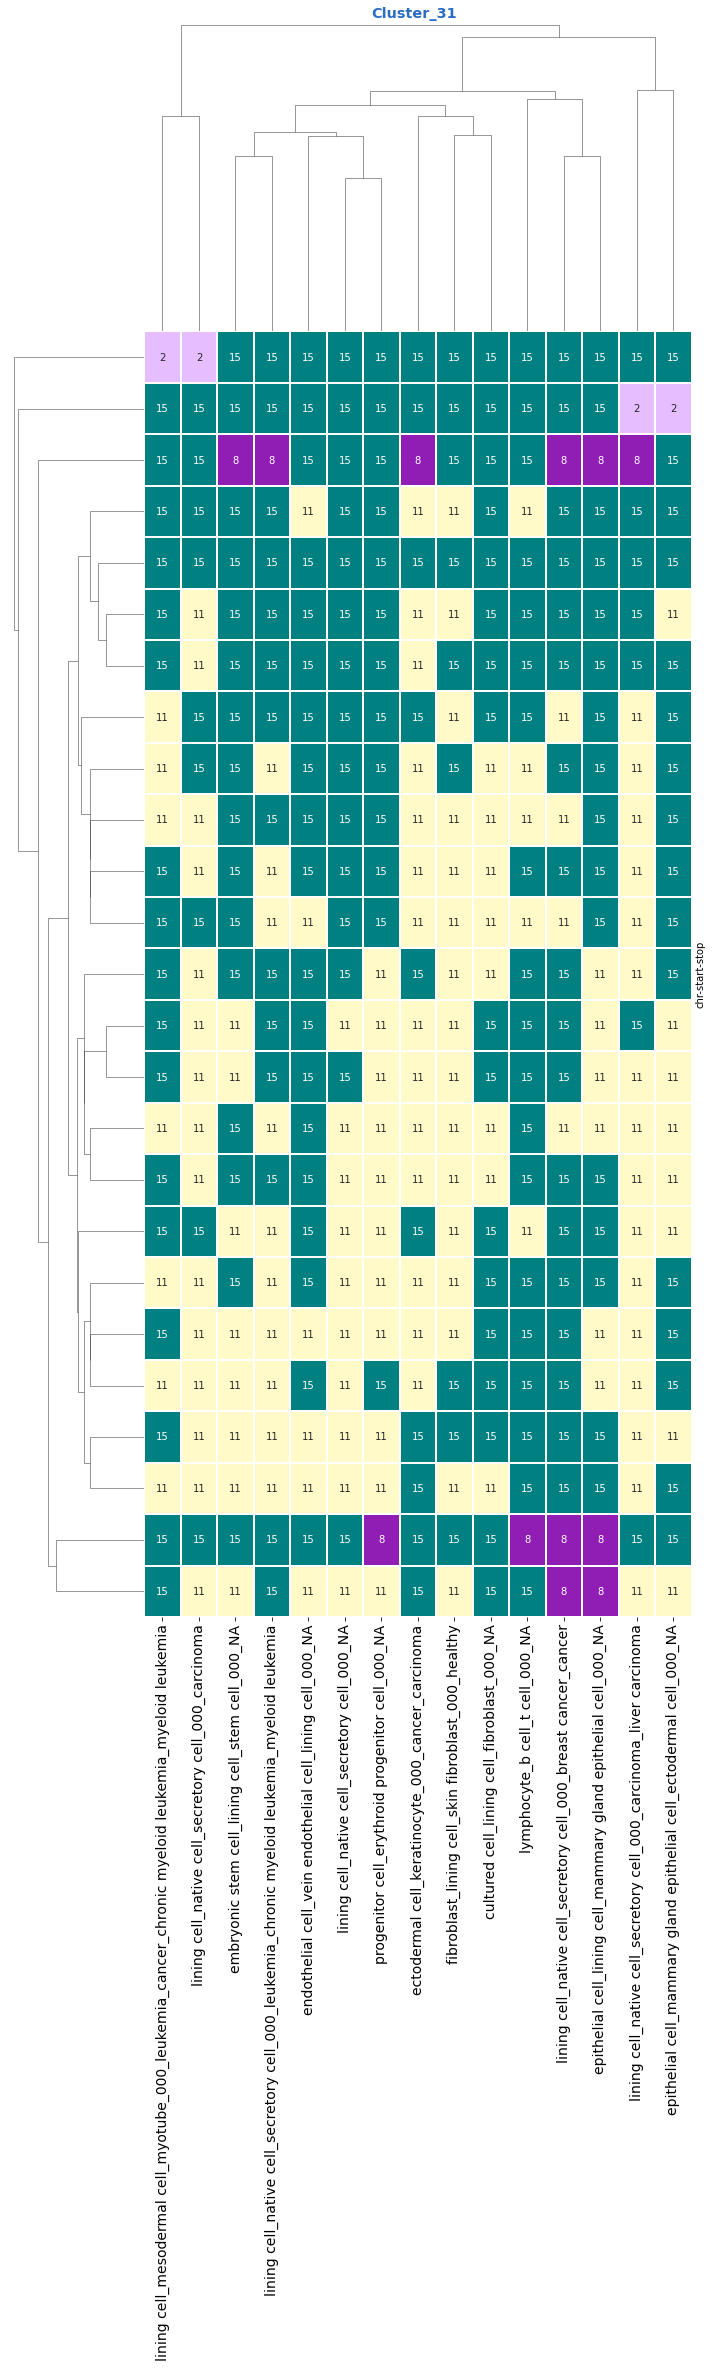

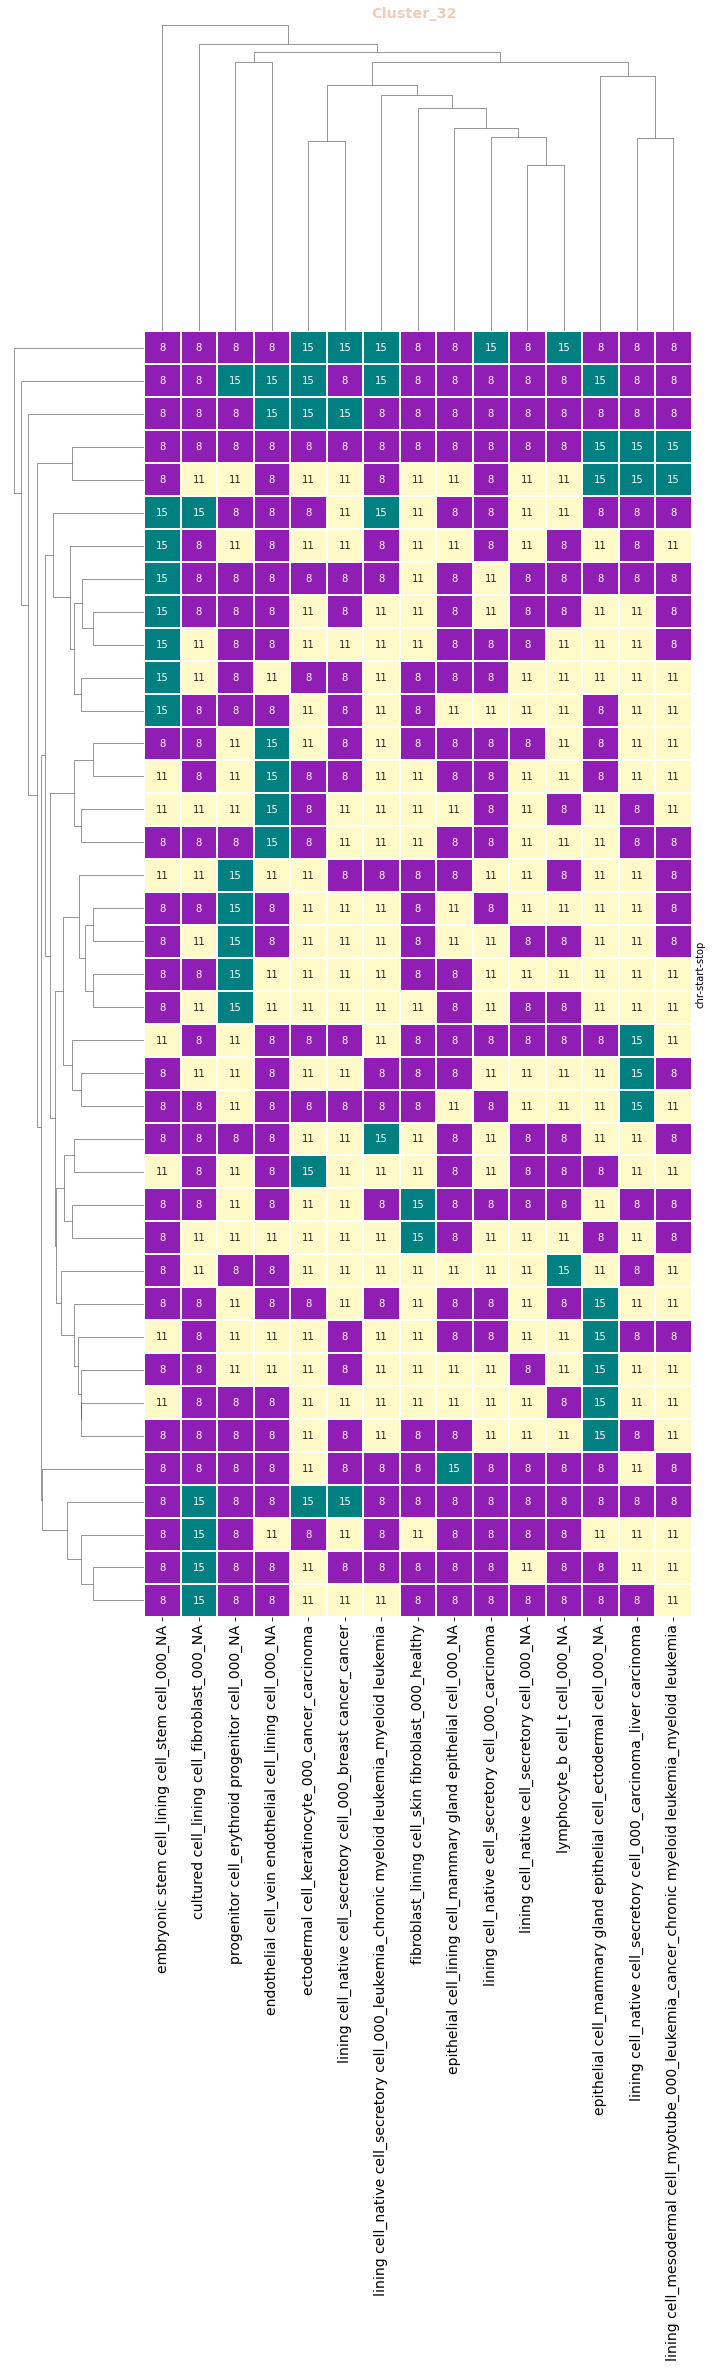

In [27]:
gene_ontology_enrichment_analysis(clustered_heatmap, goea_tool = "great", distance_metric=functional_states_distance)

In [46]:
def show_cluster(cluster_number, analysis_type):
    path = clusters_path + "/Cluster_" + f"{cluster_number:02}_" + analysis_type + "_enrichment_analysis.txt"
    clust = pd.read_csv(path, sep = "\t", index_col=0)
    return(clust)

In [108]:
show_cluster(22, "mf")

ID                                               name  \
1   GO:0097177                     mitochondrial ribosome binding   
2   GO:0015056  corticotrophin-releasing factor receptor activity   
3   GO:0043167                                        ion binding   
4   GO:0046980                                    tapasin binding   
5   GO:0005488                                            binding   
6   GO:0015433       peptide antigen-transporting ATPase activity   
7   GO:0005515                                    protein binding   
8   GO:0050662                                   coenzyme binding   
9   GO:0005094            Rho GDP-dissociation inhibitor activity   
10  GO:0030374  ligand-dependent nuclear receptor transcriptio...   
11  GO:0036393                    thiocyanate peroxidase activity   
12  GO:0017110                  nucleoside-diphosphatase activity   
13  GO:1990715                                   mRNA CDS binding   
14  GO:0004861  cyclin-dependent protein serine/threonine kina...   
15  GO:0052925  dol-P-Man:Man(5)GlcNAc(2)-PP-Dol alpha-1,3-man...   
16  GO:0046872                                  metal ion binding   
17  GO:0004581  dolichyl-phosphate beta-glucosyltransferase ac...   
18  GO:0043169                                     cation binding   
19  GO:0043168                                      anion binding   
20  GO:0047658                 alpha-amino-acid esterase activity   

    Binom_Genome_Fraction  Binom_Expected  Binom_Observed_Region_Hits  \
1                0.000162        0.020231                         2.0   
2                0.000169        0.021086                         2.0   
3                0.486231       60.778940                        79.0   
4                0.000007        0.000925                         1.0   
5                0.850433      106.304100                       118.0   
6                0.000012        0.001558                         1.0   
7                0.733015       91.626890                       106.0   
8                0.013618        1.702277                         7.0   
9                0.000017        0.002169                         1.0   
10               0.004359        0.544822                         4.0   
11               0.000019        0.002367                         1.0   
12               0.000590        0.073734                         2.0   
13               0.000022        0.002721                         1.0   
14               0.000616        0.077030                         2.0   
15               0.000023        0.002849                         1.0   
16               0.350172       43.771430                        59.0   
17               0.000027        0.003366                         1.0   
18               0.359050       44.881230                        60.0   
19               0.234604       29.325550                        43.0   
20               0.000030        0.003706                         1.0   

    Binom_Fold_Enrichment  Binom_Region_Set_Coverage  Binom_Raw_PValue  \
1               98.856510                      0.016          0.000200   
2               94.850930                      0.016          0.000217   
3                1.299792                      0.632          0.000728   
4             1081.419000                      0.008          0.000924   
5                1.110023                      0.944          0.000969   
6              641.764200                      0.008          0.001557   
7                1.156866                      0.848          0.001608   
8                4.112138                      0.056          0.001713   
9              460.965500                      0.008          0.002167   
10               7.341844                      0.032          0.002301   
11             422.459200                      0.008          0.002364   
12              27.124490                      0.016          0.002570   
13             367.513800                      0.008          0.00